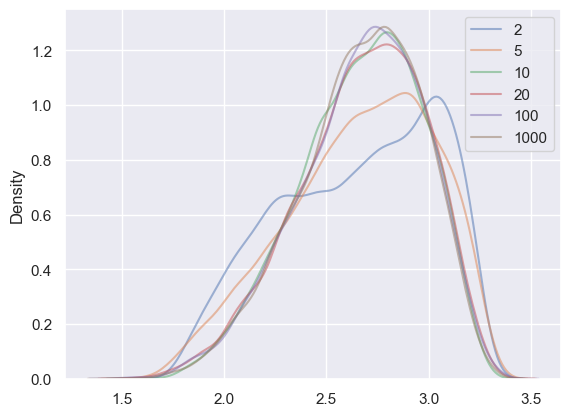

In [181]:
from scipy import stats

# N = 10000
# alpha = np.random.randn()
# beta = np.random.randn(1000)
# for p in [2,5,10,20,100,1000]:
#     X = np.random.rand(N*p).reshape((N,p))
#     eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
#     z = eta
#     sns.kdeplot(z, alpha=0.5, label=p)
# plt.legend()
# # plt.xlim(0,1)


N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = 1 + 5*gam*stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
# plt.xlim(0,1)

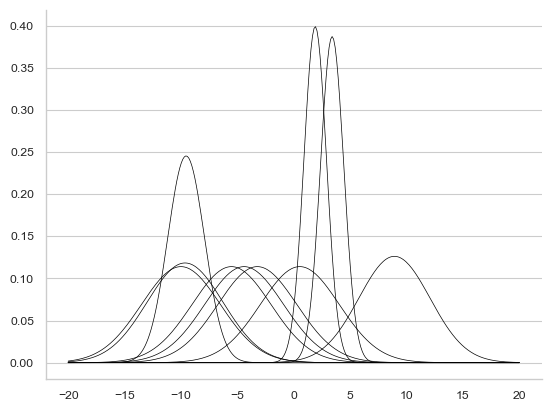

In [226]:
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("./plots/sample_wasserstein.pdf")

In [22]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 
from benchmark import bench

import numpy as np
from scipy import stats

from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

OUT_FILE = 'results/20230626-result_wasserstein_400_5-10-20.json'

def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs

    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[5, 10, 20],
    Ns=[400],
    replicas=100
)

[2023-06-26 13:12:24.179370] Progress: N=400	p=5	i=0
[2023-06-26 13:12:24.209837] Distances for cart_2means
[2023-06-26 13:12:24.209856] dt = 0
[2023-06-26 13:12:24.209859] Fitting for cart_2means
[2023-06-26 13:12:25.304064] dt = 1.0942258834838867
[2023-06-26 13:12:25.304135] MSE for cart_2means
[2023-06-26 13:12:25.328460] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:22: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:54: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will b

[2023-06-26 13:12:27.650451] dt = 2.3219728469848633
[2023-06-26 13:12:27.650557] Fitting for medoid_greedy
[2023-06-26 13:12:28.483292] dt = 0.8328530788421631
[2023-06-26 13:12:28.484087] MSE for medoid_greedy
[2023-06-26 13:12:28.495471] Progress: N=400	p=5	i=1
[2023-06-26 13:12:28.551318] Distances for cart_2means
[2023-06-26 13:12:28.551345] dt = 0
[2023-06-26 13:12:28.551354] Fitting for cart_2means
[2023-06-26 13:12:29.465245] dt = 0.9139268398284912
[2023-06-26 13:12:29.465319] MSE for cart_2means
[2023-06-26 13:12:29.476781] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:29.836336] dt = 0.3595280647277832
[2023-06-26 13:12:29.836364] Fitting for medoid_greedy
[2023-06-26 13:12:30.670297] dt = 0.8339879512786865
[2023-06-26 13:12:30.670367] MSE for medoid_greedy
[2023-06-26 13:12:30.674906] Progress: N=400	p=5	i=2
[2023-06-26 13:12:30.695268] Distances for cart_2means
[2023-06-26 13:12:30.695274] dt = 0
[2023-06-26 13:12:30.695277] Fitting for cart_2means
[2023-06-26 13:12:31.589047] dt = 0.8937780857086182
[2023-06-26 13:12:31.589127] MSE for cart_2means
[2023-06-26 13:12:31.592371] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:31.939512] dt = 0.3471338748931885
[2023-06-26 13:12:31.939537] Fitting for medoid_greedy
[2023-06-26 13:12:32.650072] dt = 0.710561990737915
[2023-06-26 13:12:32.650477] MSE for medoid_greedy
[2023-06-26 13:12:32.661159] Progress: N=400	p=5	i=3
[2023-06-26 13:12:32.689297] Distances for cart_2means
[2023-06-26 13:12:32.689304] dt = 0
[2023-06-26 13:12:32.689307] Fitting for cart_2means
[2023-06-26 13:12:33.617125] dt = 0.9278261661529541
[2023-06-26 13:12:33.617198] MSE for cart_2means
[2023-06-26 13:12:33.658231] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:12:34.187413] dt = 0.5291738510131836
[2023-06-26 13:12:34.187443] Fitting for medoid_greedy
[2023-06-26 13:12:34.955944] dt = 0.7685379981994629
[2023-06-26 13:12:34.956063] MSE for medoid_greedy
[2023-06-26 13:12:34.971648] Progress: N=400	p=5	i=4
[2023-06-26 13:12:35.005715] Distances for cart_2means
[2023-06-26 13:12:35.005724] dt = 0
[2023-06-26 13:12:35.005727] Fitting for cart_2means
[2023-06-26 13:12:35.947699] dt = 0.9419820308685303
[2023-06-26 13:12:35.947783] MSE for cart_2means
[2023-06-26 13:12:35.952724] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:12:36.304808] dt = 0.35207581520080566
[2023-06-26 13:12:36.304833] Fitting for medoid_greedy
[2023-06-26 13:12:37.003147] dt = 0.6983451843261719
[2023-06-26 13:12:37.003261] MSE for medoid_greedy
[2023-06-26 13:12:37.014053] Progress: N=400	p=5	i=5
[2023-06-26 13:12:37.034289] Distances for cart_2means
[2023-06-26 13:12:37.034295] dt = 0
[2023-06-26 13:12:37.034298] Fitting for cart_2means
[2023-06-26 13:12:37.872353] dt = 0.8380627632141113
[2023-06-26 13:12:37.872430] MSE for cart_2means
[2023-06-26 13:12:37.875977] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:38.226002] dt = 0.350017786026001
[2023-06-26 13:12:38.226029] Fitting for medoid_greedy
[2023-06-26 13:12:38.901203] dt = 0.6752073764801025
[2023-06-26 13:12:38.901806] MSE for medoid_greedy
[2023-06-26 13:12:38.924941] Progress: N=400	p=5	i=6
[2023-06-26 13:12:38.970502] Distances for cart_2means
[2023-06-26 13:12:38.970512] dt = 0
[2023-06-26 13:12:38.970516] Fitting for cart_2means
[2023-06-26 13:12:39.921713] dt = 0.9512100219726562
[2023-06-26 13:12:39.921784] MSE for cart_2means
[2023-06-26 13:12:39.993843] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:40.328849] dt = 0.3349952697753906
[2023-06-26 13:12:40.328874] Fitting for medoid_greedy
[2023-06-26 13:12:41.139627] dt = 0.8107857704162598
[2023-06-26 13:12:41.139703] MSE for medoid_greedy
[2023-06-26 13:12:41.152623] Progress: N=400	p=5	i=7
[2023-06-26 13:12:41.213218] Distances for cart_2means
[2023-06-26 13:12:41.213245] dt = 0
[2023-06-26 13:12:41.213254] Fitting for cart_2means
[2023-06-26 13:12:42.228162] dt = 1.0149400234222412
[2023-06-26 13:12:42.228268] MSE for cart_2means
[2023-06-26 13:12:42.232112] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:12:42.612696] dt = 0.38057589530944824
[2023-06-26 13:12:42.612771] Fitting for medoid_greedy
[2023-06-26 13:12:43.346240] dt = 0.7335507869720459
[2023-06-26 13:12:43.346897] MSE for medoid_greedy
[2023-06-26 13:12:43.359818] Progress: N=400	p=5	i=8
[2023-06-26 13:12:43.390402] Distances for cart_2means
[2023-06-26 13:12:43.390412] dt = 0
[2023-06-26 13:12:43.390415] Fitting for cart_2means
[2023-06-26 13:12:44.311459] dt = 0.921055793762207
[2023-06-26 13:12:44.311530] MSE for cart_2means
[2023-06-26 13:12:44.350630] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:44.688872] dt = 0.3382148742675781
[2023-06-26 13:12:44.688899] Fitting for medoid_greedy
[2023-06-26 13:12:45.462441] dt = 0.773594856262207
[2023-06-26 13:12:45.462568] MSE for medoid_greedy
[2023-06-26 13:12:45.483575] Progress: N=400	p=5	i=9
[2023-06-26 13:12:45.514697] Distances for cart_2means
[2023-06-26 13:12:45.514705] dt = 0
[2023-06-26 13:12:45.514711] Fitting for cart_2means
[2023-06-26 13:12:46.459654] dt = 0.9449551105499268
[2023-06-26 13:12:46.459736] MSE for cart_2means
[2023-06-26 13:12:46.472516] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:46.815159] dt = 0.3426339626312256
[2023-06-26 13:12:46.815184] Fitting for medoid_greedy
[2023-06-26 13:12:47.403350] dt = 0.5881979465484619
[2023-06-26 13:12:47.410958] MSE for medoid_greedy
[2023-06-26 13:12:47.437823] Progress: N=400	p=5	i=10
[2023-06-26 13:12:47.474666] Distances for cart_2means
[2023-06-26 13:12:47.474676] dt = 0
[2023-06-26 13:12:47.474680] Fitting for cart_2means
[2023-06-26 13:12:48.347021] dt = 0.8723540306091309
[2023-06-26 13:12:48.347093] MSE for cart_2means
[2023-06-26 13:12:48.365939] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:48.708017] dt = 0.3420684337615967
[2023-06-26 13:12:48.708043] Fitting for medoid_greedy
[2023-06-26 13:12:49.550235] dt = 0.8422248363494873
[2023-06-26 13:12:49.550382] MSE for medoid_greedy
[2023-06-26 13:12:49.570473] Progress: N=400	p=5	i=11
[2023-06-26 13:12:49.606493] Distances for cart_2means
[2023-06-26 13:12:49.606501] dt = 0
[2023-06-26 13:12:49.606504] Fitting for cart_2means
[2023-06-26 13:12:50.449454] dt = 0.8429601192474365
[2023-06-26 13:12:50.449536] MSE for cart_2means
[2023-06-26 13:12:50.465477] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:50.814025] dt = 0.348538875579834
[2023-06-26 13:12:50.814051] Fitting for medoid_greedy
[2023-06-26 13:12:51.576936] dt = 0.7629189491271973
[2023-06-26 13:12:51.577046] MSE for medoid_greedy
[2023-06-26 13:12:51.589313] Progress: N=400	p=5	i=12
[2023-06-26 13:12:51.609654] Distances for cart_2means
[2023-06-26 13:12:51.609661] dt = 0
[2023-06-26 13:12:51.609664] Fitting for cart_2means
[2023-06-26 13:12:52.497633] dt = 0.8879780769348145
[2023-06-26 13:12:52.497703] MSE for cart_2means
[2023-06-26 13:12:52.503378] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:52.834777] dt = 0.3313920497894287
[2023-06-26 13:12:52.834826] Fitting for medoid_greedy
[2023-06-26 13:12:53.810400] dt = 0.9756278991699219
[2023-06-26 13:12:53.810924] MSE for medoid_greedy
[2023-06-26 13:12:53.838968] Progress: N=400	p=5	i=13
[2023-06-26 13:12:53.860848] Distances for cart_2means
[2023-06-26 13:12:53.860874] dt = 0
[2023-06-26 13:12:53.860883] Fitting for cart_2means
[2023-06-26 13:12:54.971715] dt = 1.1108660697937012
[2023-06-26 13:12:54.971792] MSE for cart_2means
[2023-06-26 13:12:54.984987] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:55.328381] dt = 0.3433837890625
[2023-06-26 13:12:55.328406] Fitting for medoid_greedy
[2023-06-26 13:12:56.127619] dt = 0.7992453575134277
[2023-06-26 13:12:56.128259] MSE for medoid_greedy
[2023-06-26 13:12:56.143242] Progress: N=400	p=5	i=14
[2023-06-26 13:12:56.168710] Distances for cart_2means
[2023-06-26 13:12:56.168720] dt = 0
[2023-06-26 13:12:56.168723] Fitting for cart_2means
[2023-06-26 13:12:57.236131] dt = 1.0674200057983398
[2023-06-26 13:12:57.236204] MSE for cart_2means
[2023-06-26 13:12:57.239451] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:12:57.585021] dt = 0.3455626964569092
[2023-06-26 13:12:57.585049] Fitting for medoid_greedy
[2023-06-26 13:12:58.309263] dt = 0.7242465019226074
[2023-06-26 13:12:58.309396] MSE for medoid_greedy
[2023-06-26 13:12:58.320670] Progress: N=400	p=5	i=15
[2023-06-26 13:12:58.348807] Distances for cart_2means
[2023-06-26 13:12:58.348813] dt = 0
[2023-06-26 13:12:58.348816] Fitting for cart_2means
[2023-06-26 13:12:59.225575] dt = 0.876765251159668
[2023-06-26 13:12:59.225688] MSE for cart_2means
[2023-06-26 13:12:59.236218] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:12:59.588419] dt = 0.3521909713745117
[2023-06-26 13:12:59.588445] Fitting for medoid_greedy
[2023-06-26 13:13:00.463813] dt = 0.8754019737243652
[2023-06-26 13:13:00.464287] MSE for medoid_greedy
[2023-06-26 13:13:00.477813] Progress: N=400	p=5	i=16
[2023-06-26 13:13:00.508632] Distances for cart_2means
[2023-06-26 13:13:00.508641] dt = 0
[2023-06-26 13:13:00.508645] Fitting for cart_2means
[2023-06-26 13:13:01.350125] dt = 0.8414900302886963
[2023-06-26 13:13:01.350247] MSE for cart_2means
[2023-06-26 13:13:01.365050] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:01.707646] dt = 0.34258604049682617
[2023-06-26 13:13:01.707671] Fitting for medoid_greedy
[2023-06-26 13:13:02.890206] dt = 1.1825668811798096
[2023-06-26 13:13:02.894687] MSE for medoid_greedy
[2023-06-26 13:13:02.907668] Progress: N=400	p=5	i=17
[2023-06-26 13:13:02.936637] Distances for cart_2means
[2023-06-26 13:13:02.936647] dt = 0
[2023-06-26 13:13:02.936651] Fitting for cart_2means
[2023-06-26 13:13:03.810855] dt = 0.8742170333862305
[2023-06-26 13:13:03.810926] MSE for cart_2means
[2023-06-26 13:13:03.814749] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:04.179109] dt = 0.3643510341644287
[2023-06-26 13:13:04.179180] Fitting for medoid_greedy
[2023-06-26 13:13:04.955674] dt = 0.7765710353851318
[2023-06-26 13:13:04.956087] MSE for medoid_greedy
[2023-06-26 13:13:04.969609] Progress: N=400	p=5	i=18
[2023-06-26 13:13:04.999090] Distances for cart_2means
[2023-06-26 13:13:04.999097] dt = 0
[2023-06-26 13:13:04.999101] Fitting for cart_2means
[2023-06-26 13:13:05.888792] dt = 0.889700174331665
[2023-06-26 13:13:05.888873] MSE for cart_2means
[2023-06-26 13:13:05.899911] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:06.225331] dt = 0.3254117965698242
[2023-06-26 13:13:06.225356] Fitting for medoid_greedy
[2023-06-26 13:13:06.956367] dt = 0.7310421466827393
[2023-06-26 13:13:06.956490] MSE for medoid_greedy
[2023-06-26 13:13:06.970849] Progress: N=400	p=5	i=19
[2023-06-26 13:13:07.000330] Distances for cart_2means
[2023-06-26 13:13:07.000337] dt = 0
[2023-06-26 13:13:07.000341] Fitting for cart_2means
[2023-06-26 13:13:07.832547] dt = 0.8322150707244873
[2023-06-26 13:13:07.832625] MSE for cart_2means
[2023-06-26 13:13:07.845656] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:08.200167] dt = 0.35450196266174316
[2023-06-26 13:13:08.200208] Fitting for medoid_greedy
[2023-06-26 13:13:08.905256] dt = 0.7050929069519043
[2023-06-26 13:13:08.905405] MSE for medoid_greedy
[2023-06-26 13:13:08.916253] Progress: N=400	p=5	i=20
[2023-06-26 13:13:08.945055] Distances for cart_2means
[2023-06-26 13:13:08.945062] dt = 0
[2023-06-26 13:13:08.945068] Fitting for cart_2means
[2023-06-26 13:13:09.791991] dt = 0.8469350337982178
[2023-06-26 13:13:09.792063] MSE for cart_2means
[2023-06-26 13:13:09.822633] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:10.196000] dt = 0.37335777282714844
[2023-06-26 13:13:10.196066] Fitting for medoid_greedy
[2023-06-26 13:13:10.865903] dt = 0.6699113845825195
[2023-06-26 13:13:10.867428] MSE for medoid_greedy
[2023-06-26 13:13:10.879235] Progress: N=400	p=5	i=21
[2023-06-26 13:13:10.915266] Distances for cart_2means
[2023-06-26 13:13:10.915276] dt = 0
[2023-06-26 13:13:10.915279] Fitting for cart_2means
[2023-06-26 13:13:11.787799] dt = 0.8725318908691406
[2023-06-26 13:13:11.787877] MSE for cart_2means
[2023-06-26 13:13:11.820976] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:12.150230] dt = 0.3292269706726074
[2023-06-26 13:13:12.150257] Fitting for medoid_greedy
[2023-06-26 13:13:13.276823] dt = 1.126619815826416
[2023-06-26 13:13:13.276942] MSE for medoid_greedy
[2023-06-26 13:13:13.289623] Progress: N=400	p=5	i=22
[2023-06-26 13:13:13.313047] Distances for cart_2means
[2023-06-26 13:13:13.313055] dt = 0
[2023-06-26 13:13:13.313058] Fitting for cart_2means
[2023-06-26 13:13:14.191788] dt = 0.8787400722503662
[2023-06-26 13:13:14.191859] MSE for cart_2means
[2023-06-26 13:13:14.231194] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:14.594459] dt = 0.3632380962371826
[2023-06-26 13:13:14.594495] Fitting for medoid_greedy
[2023-06-26 13:13:15.406610] dt = 0.8121769428253174
[2023-06-26 13:13:15.406727] MSE for medoid_greedy
[2023-06-26 13:13:15.421430] Progress: N=400	p=5	i=23
[2023-06-26 13:13:15.547823] Distances for cart_2means
[2023-06-26 13:13:15.547855] dt = 0
[2023-06-26 13:13:15.547866] Fitting for cart_2means
[2023-06-26 13:13:16.428076] dt = 0.8802528381347656
[2023-06-26 13:13:16.428152] MSE for cart_2means
[2023-06-26 13:13:16.439901] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:16.838431] dt = 0.39852285385131836
[2023-06-26 13:13:16.838498] Fitting for medoid_greedy
[2023-06-26 13:13:17.596091] dt = 0.7576663494110107
[2023-06-26 13:13:17.596205] MSE for medoid_greedy
[2023-06-26 13:13:17.607980] Progress: N=400	p=5	i=24
[2023-06-26 13:13:17.637577] Distances for cart_2means
[2023-06-26 13:13:17.637603] dt = 0
[2023-06-26 13:13:17.637613] Fitting for cart_2means
[2023-06-26 13:13:18.515910] dt = 0.8783330917358398
[2023-06-26 13:13:18.515984] MSE for cart_2means
[2023-06-26 13:13:18.535282] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:18.874014] dt = 0.33872199058532715
[2023-06-26 13:13:18.874041] Fitting for medoid_greedy
[2023-06-26 13:13:19.623097] dt = 0.7490911483764648
[2023-06-26 13:13:19.623204] MSE for medoid_greedy
[2023-06-26 13:13:19.637589] Progress: N=400	p=5	i=25
[2023-06-26 13:13:19.672093] Distances for cart_2means
[2023-06-26 13:13:19.672101] dt = 0
[2023-06-26 13:13:19.672105] Fitting for cart_2means
[2023-06-26 13:13:20.523197] dt = 0.8511028289794922
[2023-06-26 13:13:20.523271] MSE for cart_2means
[2023-06-26 13:13:20.534338] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:20.866492] dt = 0.33214712142944336
[2023-06-26 13:13:20.866519] Fitting for medoid_greedy
[2023-06-26 13:13:21.987624] dt = 1.1211369037628174
[2023-06-26 13:13:21.990915] MSE for medoid_greedy
[2023-06-26 13:13:22.005932] Progress: N=400	p=5	i=26
[2023-06-26 13:13:22.044988] Distances for cart_2means
[2023-06-26 13:13:22.044999] dt = 0
[2023-06-26 13:13:22.045003] Fitting for cart_2means
[2023-06-26 13:13:23.028458] dt = 0.9834668636322021
[2023-06-26 13:13:23.028581] MSE for cart_2means
[2023-06-26 13:13:23.052916] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:23.435357] dt = 0.3824300765991211
[2023-06-26 13:13:23.435385] Fitting for medoid_greedy
[2023-06-26 13:13:24.188438] dt = 0.7530910968780518
[2023-06-26 13:13:24.188709] MSE for medoid_greedy
[2023-06-26 13:13:24.203788] Progress: N=400	p=5	i=27
[2023-06-26 13:13:24.238849] Distances for cart_2means
[2023-06-26 13:13:24.238860] dt = 0
[2023-06-26 13:13:24.238864] Fitting for cart_2means
[2023-06-26 13:13:25.146465] dt = 0.9076149463653564
[2023-06-26 13:13:25.146556] MSE for cart_2means
[2023-06-26 13:13:25.170792] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:25.521789] dt = 0.35098767280578613
[2023-06-26 13:13:25.521818] Fitting for medoid_greedy
[2023-06-26 13:13:26.325920] dt = 0.8041374683380127
[2023-06-26 13:13:26.326309] MSE for medoid_greedy
[2023-06-26 13:13:26.422300] Progress: N=400	p=5	i=28
[2023-06-26 13:13:26.454288] Distances for cart_2means
[2023-06-26 13:13:26.454301] dt = 0
[2023-06-26 13:13:26.454307] Fitting for cart_2means
[2023-06-26 13:13:27.428071] dt = 0.9737813472747803
[2023-06-26 13:13:27.428175] MSE for cart_2means
[2023-06-26 13:13:27.439019] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:27.839247] dt = 0.40021824836730957
[2023-06-26 13:13:27.839317] Fitting for medoid_greedy
[2023-06-26 13:13:28.641097] dt = 0.8018558025360107
[2023-06-26 13:13:28.641220] MSE for medoid_greedy
[2023-06-26 13:13:28.653586] Progress: N=400	p=5	i=29
[2023-06-26 13:13:28.685009] Distances for cart_2means
[2023-06-26 13:13:28.685017] dt = 0
[2023-06-26 13:13:28.685021] Fitting for cart_2means
[2023-06-26 13:13:29.589069] dt = 0.9040589332580566
[2023-06-26 13:13:29.589143] MSE for cart_2means
[2023-06-26 13:13:29.592411] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:29.967421] dt = 0.3750028610229492
[2023-06-26 13:13:29.967449] Fitting for medoid_greedy
[2023-06-26 13:13:30.788633] dt = 0.821216344833374
[2023-06-26 13:13:30.788755] MSE for medoid_greedy
[2023-06-26 13:13:30.800380] Progress: N=400	p=5	i=30
[2023-06-26 13:13:30.832710] Distances for cart_2means
[2023-06-26 13:13:30.832719] dt = 0
[2023-06-26 13:13:30.832722] Fitting for cart_2means
[2023-06-26 13:13:31.692150] dt = 0.8594381809234619
[2023-06-26 13:13:31.692230] MSE for cart_2means
[2023-06-26 13:13:31.701973] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:32.082331] dt = 0.38033199310302734
[2023-06-26 13:13:32.082394] Fitting for medoid_greedy
[2023-06-26 13:13:32.849108] dt = 0.7668008804321289
[2023-06-26 13:13:32.849293] MSE for medoid_greedy
[2023-06-26 13:13:32.862335] Progress: N=400	p=5	i=31
[2023-06-26 13:13:32.924208] Distances for cart_2means
[2023-06-26 13:13:32.924226] dt = 0
[2023-06-26 13:13:32.924231] Fitting for cart_2means
[2023-06-26 13:13:33.890922] dt = 0.9667158126831055
[2023-06-26 13:13:33.890997] MSE for cart_2means
[2023-06-26 13:13:33.906030] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:34.283452] dt = 0.3774142265319824
[2023-06-26 13:13:34.283480] Fitting for medoid_greedy
[2023-06-26 13:13:34.995120] dt = 0.7116749286651611
[2023-06-26 13:13:34.995656] MSE for medoid_greedy
[2023-06-26 13:13:35.006870] Progress: N=400	p=5	i=32
[2023-06-26 13:13:35.046750] Distances for cart_2means
[2023-06-26 13:13:35.046759] dt = 0
[2023-06-26 13:13:35.046762] Fitting for cart_2means
[2023-06-26 13:13:36.024631] dt = 0.9778800010681152
[2023-06-26 13:13:36.024705] MSE for cart_2means
[2023-06-26 13:13:36.028794] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:36.392656] dt = 0.36385512351989746
[2023-06-26 13:13:36.392684] Fitting for medoid_greedy
[2023-06-26 13:13:37.021436] dt = 0.6287839412689209
[2023-06-26 13:13:37.021561] MSE for medoid_greedy
[2023-06-26 13:13:37.033950] Progress: N=400	p=5	i=33
[2023-06-26 13:13:37.058166] Distances for cart_2means
[2023-06-26 13:13:37.058173] dt = 0
[2023-06-26 13:13:37.058177] Fitting for cart_2means
[2023-06-26 13:13:38.165798] dt = 1.107630968093872
[2023-06-26 13:13:38.165882] MSE for cart_2means
[2023-06-26 13:13:38.185223] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:38.529784] dt = 0.34455013275146484
[2023-06-26 13:13:38.529812] Fitting for medoid_greedy
[2023-06-26 13:13:39.290487] dt = 0.7607088088989258
[2023-06-26 13:13:39.290643] MSE for medoid_greedy
[2023-06-26 13:13:39.303485] Progress: N=400	p=5	i=34
[2023-06-26 13:13:39.339052] Distances for cart_2means
[2023-06-26 13:13:39.339068] dt = 0
[2023-06-26 13:13:39.339073] Fitting for cart_2means
[2023-06-26 13:13:40.443072] dt = 1.1040189266204834
[2023-06-26 13:13:40.443146] MSE for cart_2means
[2023-06-26 13:13:40.464031] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:40.838455] dt = 0.37441515922546387
[2023-06-26 13:13:40.838485] Fitting for medoid_greedy
[2023-06-26 13:13:41.506502] dt = 0.6680517196655273
[2023-06-26 13:13:41.506874] MSE for medoid_greedy
[2023-06-26 13:13:41.520077] Progress: N=400	p=5	i=35
[2023-06-26 13:13:41.558545] Distances for cart_2means
[2023-06-26 13:13:41.558572] dt = 0
[2023-06-26 13:13:41.558581] Fitting for cart_2means
[2023-06-26 13:13:42.456614] dt = 0.898068904876709
[2023-06-26 13:13:42.456689] MSE for cart_2means
[2023-06-26 13:13:42.460769] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:42.859101] dt = 0.39832401275634766
[2023-06-26 13:13:42.859170] Fitting for medoid_greedy
[2023-06-26 13:13:43.537634] dt = 0.6785390377044678
[2023-06-26 13:13:43.538070] MSE for medoid_greedy
[2023-06-26 13:13:43.551082] Progress: N=400	p=5	i=36
[2023-06-26 13:13:43.586971] Distances for cart_2means
[2023-06-26 13:13:43.586998] dt = 0
[2023-06-26 13:13:43.587007] Fitting for cart_2means
[2023-06-26 13:13:44.516696] dt = 0.929724931716919
[2023-06-26 13:13:44.516782] MSE for cart_2means
[2023-06-26 13:13:44.530149] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:44.898424] dt = 0.36826586723327637
[2023-06-26 13:13:44.898452] Fitting for medoid_greedy
[2023-06-26 13:13:45.645702] dt = 0.7472851276397705
[2023-06-26 13:13:45.645943] MSE for medoid_greedy
[2023-06-26 13:13:45.660061] Progress: N=400	p=5	i=37
[2023-06-26 13:13:45.696042] Distances for cart_2means
[2023-06-26 13:13:45.696054] dt = 0
[2023-06-26 13:13:45.696059] Fitting for cart_2means
[2023-06-26 13:13:46.732255] dt = 1.0362119674682617
[2023-06-26 13:13:46.732328] MSE for cart_2means
[2023-06-26 13:13:46.744667] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:47.143824] dt = 0.39914703369140625
[2023-06-26 13:13:47.143898] Fitting for medoid_greedy
[2023-06-26 13:13:47.773946] dt = 0.6301310062408447
[2023-06-26 13:13:47.774049] MSE for medoid_greedy
[2023-06-26 13:13:47.785853] Progress: N=400	p=5	i=38
[2023-06-26 13:13:47.818302] Distances for cart_2means
[2023-06-26 13:13:47.818311] dt = 0
[2023-06-26 13:13:47.818316] Fitting for cart_2means
[2023-06-26 13:13:48.841712] dt = 1.023409128189087
[2023-06-26 13:13:48.841791] MSE for cart_2means
[2023-06-26 13:13:48.853513] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:49.267078] dt = 0.4135560989379883
[2023-06-26 13:13:49.267140] Fitting for medoid_greedy
[2023-06-26 13:13:49.997070] dt = 0.7299988269805908
[2023-06-26 13:13:49.997182] MSE for medoid_greedy
[2023-06-26 13:13:50.008636] Progress: N=400	p=5	i=39
[2023-06-26 13:13:50.040053] Distances for cart_2means
[2023-06-26 13:13:50.040061] dt = 0
[2023-06-26 13:13:50.040065] Fitting for cart_2means
[2023-06-26 13:13:51.076814] dt = 1.0367581844329834
[2023-06-26 13:13:51.076892] MSE for cart_2means
[2023-06-26 13:13:51.080771] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:51.436236] dt = 0.355457067489624
[2023-06-26 13:13:51.436266] Fitting for medoid_greedy
[2023-06-26 13:13:52.112199] dt = 0.675969123840332
[2023-06-26 13:13:52.112350] MSE for medoid_greedy
[2023-06-26 13:13:52.127331] Progress: N=400	p=5	i=40
[2023-06-26 13:13:52.161952] Distances for cart_2means
[2023-06-26 13:13:52.161977] dt = 0
[2023-06-26 13:13:52.161986] Fitting for cart_2means
[2023-06-26 13:13:53.199561] dt = 1.0376091003417969
[2023-06-26 13:13:53.199665] MSE for cart_2means
[2023-06-26 13:13:53.213172] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:53.580279] dt = 0.3670938014984131
[2023-06-26 13:13:53.580308] Fitting for medoid_greedy
[2023-06-26 13:13:54.280005] dt = 0.6997342109680176
[2023-06-26 13:13:54.280183] MSE for medoid_greedy
[2023-06-26 13:13:54.295463] Progress: N=400	p=5	i=41
[2023-06-26 13:13:54.347779] Distances for cart_2means
[2023-06-26 13:13:54.347797] dt = 0
[2023-06-26 13:13:54.347802] Fitting for cart_2means
[2023-06-26 13:13:55.259885] dt = 0.9121048450469971
[2023-06-26 13:13:55.259967] MSE for cart_2means
[2023-06-26 13:13:55.271890] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:55.664582] dt = 0.3926811218261719
[2023-06-26 13:13:55.664611] Fitting for medoid_greedy
[2023-06-26 13:13:56.407525] dt = 0.7429499626159668
[2023-06-26 13:13:56.407667] MSE for medoid_greedy
[2023-06-26 13:13:56.419006] Progress: N=400	p=5	i=42
[2023-06-26 13:13:56.451478] Distances for cart_2means
[2023-06-26 13:13:56.451506] dt = 0
[2023-06-26 13:13:56.451516] Fitting for cart_2means
[2023-06-26 13:13:57.303728] dt = 0.852250337600708
[2023-06-26 13:13:57.303809] MSE for cart_2means
[2023-06-26 13:13:57.318960] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:13:57.660252] dt = 0.3412821292877197
[2023-06-26 13:13:57.660282] Fitting for medoid_greedy
[2023-06-26 13:13:58.487284] dt = 0.827038049697876
[2023-06-26 13:13:58.487777] MSE for medoid_greedy
[2023-06-26 13:13:58.511692] Progress: N=400	p=5	i=43
[2023-06-26 13:13:58.544815] Distances for cart_2means
[2023-06-26 13:13:58.544832] dt = 0
[2023-06-26 13:13:58.544837] Fitting for cart_2means
[2023-06-26 13:13:59.558950] dt = 1.0141329765319824
[2023-06-26 13:13:59.559039] MSE for cart_2means
[2023-06-26 13:13:59.571996] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:13:59.981704] dt = 0.4096968173980713
[2023-06-26 13:13:59.981734] Fitting for medoid_greedy
[2023-06-26 13:14:00.963908] dt = 0.9822123050689697
[2023-06-26 13:14:00.964983] MSE for medoid_greedy
[2023-06-26 13:14:00.988108] Progress: N=400	p=5	i=44
[2023-06-26 13:14:01.035331] Distances for cart_2means
[2023-06-26 13:14:01.035344] dt = 0
[2023-06-26 13:14:01.035348] Fitting for cart_2means
[2023-06-26 13:14:01.936270] dt = 0.9009368419647217
[2023-06-26 13:14:01.936343] MSE for cart_2means
[2023-06-26 13:14:01.969232] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:02.329704] dt = 0.3604598045349121
[2023-06-26 13:14:02.329734] Fitting for medoid_greedy
[2023-06-26 13:14:02.988615] dt = 0.6589243412017822
[2023-06-26 13:14:02.990137] MSE for medoid_greedy
[2023-06-26 13:14:03.035394] Progress: N=400	p=5	i=45
[2023-06-26 13:14:03.061630] Distances for cart_2means
[2023-06-26 13:14:03.061641] dt = 0
[2023-06-26 13:14:03.061645] Fitting for cart_2means
[2023-06-26 13:14:04.208785] dt = 1.147153377532959
[2023-06-26 13:14:04.208862] MSE for cart_2means
[2023-06-26 13:14:04.222533] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:04.627763] dt = 0.40520501136779785
[2023-06-26 13:14:04.627843] Fitting for medoid_greedy
[2023-06-26 13:14:05.446006] dt = 0.818267822265625
[2023-06-26 13:14:05.446132] MSE for medoid_greedy
[2023-06-26 13:14:05.460661] Progress: N=400	p=5	i=46
[2023-06-26 13:14:05.486091] Distances for cart_2means
[2023-06-26 13:14:05.486100] dt = 0
[2023-06-26 13:14:05.486104] Fitting for cart_2means
[2023-06-26 13:14:06.735746] dt = 1.2496540546417236
[2023-06-26 13:14:06.735832] MSE for cart_2means
[2023-06-26 13:14:06.759479] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:07.148538] dt = 0.3890502452850342
[2023-06-26 13:14:07.148601] Fitting for medoid_greedy
[2023-06-26 13:14:07.998428] dt = 0.8498966693878174
[2023-06-26 13:14:08.000439] MSE for medoid_greedy
[2023-06-26 13:14:08.005083] Progress: N=400	p=5	i=47
[2023-06-26 13:14:08.047774] Distances for cart_2means
[2023-06-26 13:14:08.047782] dt = 0
[2023-06-26 13:14:08.047786] Fitting for cart_2means
[2023-06-26 13:14:09.059062] dt = 1.0112860202789307
[2023-06-26 13:14:09.059138] MSE for cart_2means
[2023-06-26 13:14:09.079727] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:09.447618] dt = 0.3678619861602783
[2023-06-26 13:14:09.447646] Fitting for medoid_greedy
[2023-06-26 13:14:10.115554] dt = 0.667963981628418
[2023-06-26 13:14:10.115673] MSE for medoid_greedy
[2023-06-26 13:14:10.130494] Progress: N=400	p=5	i=48
[2023-06-26 13:14:10.187945] Distances for cart_2means
[2023-06-26 13:14:10.187955] dt = 0
[2023-06-26 13:14:10.187960] Fitting for cart_2means
[2023-06-26 13:14:11.215471] dt = 1.0275251865386963
[2023-06-26 13:14:11.215552] MSE for cart_2means
[2023-06-26 13:14:11.232527] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:11.653539] dt = 0.4210019111633301
[2023-06-26 13:14:11.653607] Fitting for medoid_greedy
[2023-06-26 13:14:12.388401] dt = 0.734868049621582
[2023-06-26 13:14:12.388527] MSE for medoid_greedy
[2023-06-26 13:14:12.401180] Progress: N=400	p=5	i=49
[2023-06-26 13:14:12.437020] Distances for cart_2means
[2023-06-26 13:14:12.437045] dt = 0
[2023-06-26 13:14:12.437054] Fitting for cart_2means
[2023-06-26 13:14:13.403618] dt = 0.9665987491607666
[2023-06-26 13:14:13.403690] MSE for cart_2means
[2023-06-26 13:14:13.407735] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:13.815919] dt = 0.408174991607666
[2023-06-26 13:14:13.815982] Fitting for medoid_greedy
[2023-06-26 13:14:14.559814] dt = 0.7439022064208984
[2023-06-26 13:14:14.560428] MSE for medoid_greedy
[2023-06-26 13:14:14.576261] Progress: N=400	p=5	i=50
[2023-06-26 13:14:14.633330] Distances for cart_2means
[2023-06-26 13:14:14.633340] dt = 0
[2023-06-26 13:14:14.633344] Fitting for cart_2means
[2023-06-26 13:14:15.564924] dt = 0.9315931797027588
[2023-06-26 13:14:15.565012] MSE for cart_2means
[2023-06-26 13:14:15.576354] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:15.963790] dt = 0.38742613792419434
[2023-06-26 13:14:15.963819] Fitting for medoid_greedy
[2023-06-26 13:14:16.713142] dt = 0.7493607997894287
[2023-06-26 13:14:16.714294] MSE for medoid_greedy
[2023-06-26 13:14:16.728499] Progress: N=400	p=5	i=51
[2023-06-26 13:14:16.766604] Distances for cart_2means
[2023-06-26 13:14:16.766631] dt = 0
[2023-06-26 13:14:16.766641] Fitting for cart_2means
[2023-06-26 13:14:17.761339] dt = 0.9947361946105957
[2023-06-26 13:14:17.761422] MSE for cart_2means
[2023-06-26 13:14:17.772311] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:18.209937] dt = 0.43761610984802246
[2023-06-26 13:14:18.210009] Fitting for medoid_greedy
[2023-06-26 13:14:18.885499] dt = 0.6755709648132324
[2023-06-26 13:14:18.885702] MSE for medoid_greedy
[2023-06-26 13:14:18.900649] Progress: N=400	p=5	i=52
[2023-06-26 13:14:18.948033] Distances for cart_2means
[2023-06-26 13:14:18.948042] dt = 0
[2023-06-26 13:14:18.948046] Fitting for cart_2means
[2023-06-26 13:14:19.997375] dt = 1.049339771270752
[2023-06-26 13:14:19.997459] MSE for cart_2means
[2023-06-26 13:14:20.002845] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:20.419877] dt = 0.4170229434967041
[2023-06-26 13:14:20.419941] Fitting for medoid_greedy
[2023-06-26 13:14:21.464654] dt = 1.0447843074798584
[2023-06-26 13:14:21.464778] MSE for medoid_greedy
[2023-06-26 13:14:21.480423] Progress: N=400	p=5	i=53
[2023-06-26 13:14:21.512324] Distances for cart_2means
[2023-06-26 13:14:21.512334] dt = 0
[2023-06-26 13:14:21.512338] Fitting for cart_2means
[2023-06-26 13:14:22.546654] dt = 1.0343260765075684
[2023-06-26 13:14:22.546777] MSE for cart_2means
[2023-06-26 13:14:22.557699] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:22.933606] dt = 0.37589597702026367
[2023-06-26 13:14:22.933636] Fitting for medoid_greedy
[2023-06-26 13:14:23.687502] dt = 0.7539029121398926
[2023-06-26 13:14:23.687707] MSE for medoid_greedy
[2023-06-26 13:14:23.704299] Progress: N=400	p=5	i=54
[2023-06-26 13:14:23.744871] Distances for cart_2means
[2023-06-26 13:14:23.744901] dt = 0
[2023-06-26 13:14:23.744912] Fitting for cart_2means
[2023-06-26 13:14:24.700842] dt = 0.9559719562530518
[2023-06-26 13:14:24.700929] MSE for cart_2means
[2023-06-26 13:14:24.711537] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:25.082361] dt = 0.37079715728759766
[2023-06-26 13:14:25.082395] Fitting for medoid_greedy
[2023-06-26 13:14:26.196450] dt = 1.1141135692596436
[2023-06-26 13:14:26.197352] MSE for medoid_greedy
[2023-06-26 13:14:26.207395] Progress: N=400	p=5	i=55
[2023-06-26 13:14:26.255919] Distances for cart_2means
[2023-06-26 13:14:26.255936] dt = 0
[2023-06-26 13:14:26.255940] Fitting for cart_2means
[2023-06-26 13:14:27.210040] dt = 0.9541199207305908
[2023-06-26 13:14:27.210125] MSE for cart_2means
[2023-06-26 13:14:27.220534] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:27.609147] dt = 0.388599157333374
[2023-06-26 13:14:27.609185] Fitting for medoid_greedy
[2023-06-26 13:14:28.655574] dt = 1.0464367866516113
[2023-06-26 13:14:28.655832] MSE for medoid_greedy
[2023-06-26 13:14:28.674106] Progress: N=400	p=5	i=56
[2023-06-26 13:14:28.712913] Distances for cart_2means
[2023-06-26 13:14:28.712928] dt = 0
[2023-06-26 13:14:28.712933] Fitting for cart_2means
[2023-06-26 13:14:29.779641] dt = 1.0667271614074707
[2023-06-26 13:14:29.779718] MSE for cart_2means
[2023-06-26 13:14:29.795632] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:30.217092] dt = 0.4214472770690918
[2023-06-26 13:14:30.217163] Fitting for medoid_greedy
[2023-06-26 13:14:31.069079] dt = 0.8519976139068604
[2023-06-26 13:14:31.069254] MSE for medoid_greedy
[2023-06-26 13:14:31.081199] Progress: N=400	p=5	i=57
[2023-06-26 13:14:31.137297] Distances for cart_2means
[2023-06-26 13:14:31.137308] dt = 0
[2023-06-26 13:14:31.137312] Fitting for cart_2means
[2023-06-26 13:14:32.276687] dt = 1.139389991760254
[2023-06-26 13:14:32.276771] MSE for cart_2means
[2023-06-26 13:14:32.301565] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:32.693739] dt = 0.39216089248657227
[2023-06-26 13:14:32.693803] Fitting for medoid_greedy
[2023-06-26 13:14:33.382769] dt = 0.6890413761138916
[2023-06-26 13:14:33.382893] MSE for medoid_greedy
[2023-06-26 13:14:33.393823] Progress: N=400	p=5	i=58
[2023-06-26 13:14:33.429786] Distances for cart_2means
[2023-06-26 13:14:33.429813] dt = 0
[2023-06-26 13:14:33.429822] Fitting for cart_2means
[2023-06-26 13:14:34.579015] dt = 1.1492300033569336
[2023-06-26 13:14:34.579104] MSE for cart_2means
[2023-06-26 13:14:34.588898] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:34.962079] dt = 0.3731558322906494
[2023-06-26 13:14:34.962111] Fitting for medoid_greedy
[2023-06-26 13:14:35.652225] dt = 0.6901700496673584
[2023-06-26 13:14:35.652354] MSE for medoid_greedy
[2023-06-26 13:14:35.663252] Progress: N=400	p=5	i=59
[2023-06-26 13:14:35.700546] Distances for cart_2means
[2023-06-26 13:14:35.700573] dt = 0
[2023-06-26 13:14:35.700585] Fitting for cart_2means
[2023-06-26 13:14:36.752000] dt = 1.0514569282531738
[2023-06-26 13:14:36.752082] MSE for cart_2means
[2023-06-26 13:14:36.763752] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:14:37.111562] dt = 0.34778499603271484
[2023-06-26 13:14:37.111590] Fitting for medoid_greedy
[2023-06-26 13:14:37.681685] dt = 0.5701477527618408
[2023-06-26 13:14:37.681791] MSE for medoid_greedy
[2023-06-26 13:14:37.693005] Progress: N=400	p=5	i=60
[2023-06-26 13:14:37.727646] Distances for cart_2means
[2023-06-26 13:14:37.727672] dt = 0
[2023-06-26 13:14:37.727681] Fitting for cart_2means
[2023-06-26 13:14:38.735859] dt = 1.0082132816314697
[2023-06-26 13:14:38.735941] MSE for cart_2means
[2023-06-26 13:14:38.746129] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:39.115721] dt = 0.3695671558380127
[2023-06-26 13:14:39.115756] Fitting for medoid_greedy
[2023-06-26 13:14:39.748822] dt = 0.633122444152832
[2023-06-26 13:14:39.749243] MSE for medoid_greedy
[2023-06-26 13:14:39.760499] Progress: N=400	p=5	i=61
[2023-06-26 13:14:39.796617] Distances for cart_2means
[2023-06-26 13:14:39.796642] dt = 0
[2023-06-26 13:14:39.796651] Fitting for cart_2means
[2023-06-26 13:14:40.844557] dt = 1.0479400157928467
[2023-06-26 13:14:40.844644] MSE for cart_2means
[2023-06-26 13:14:40.848544] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:41.215108] dt = 0.36655402183532715
[2023-06-26 13:14:41.215138] Fitting for medoid_greedy
[2023-06-26 13:14:41.867026] dt = 0.6519250869750977
[2023-06-26 13:14:41.867168] MSE for medoid_greedy
[2023-06-26 13:14:41.878234] Progress: N=400	p=5	i=62
[2023-06-26 13:14:41.910181] Distances for cart_2means
[2023-06-26 13:14:41.910190] dt = 0
[2023-06-26 13:14:41.910194] Fitting for cart_2means
[2023-06-26 13:14:43.040351] dt = 1.1301689147949219
[2023-06-26 13:14:43.040431] MSE for cart_2means
[2023-06-26 13:14:43.050445] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:43.446410] dt = 0.3959388732910156
[2023-06-26 13:14:43.446472] Fitting for medoid_greedy
[2023-06-26 13:14:44.016853] dt = 0.5704681873321533
[2023-06-26 13:14:44.016958] MSE for medoid_greedy
[2023-06-26 13:14:44.028201] Progress: N=400	p=5	i=63
[2023-06-26 13:14:44.067328] Distances for cart_2means
[2023-06-26 13:14:44.067357] dt = 0
[2023-06-26 13:14:44.067367] Fitting for cart_2means
[2023-06-26 13:14:45.072344] dt = 1.0050158500671387
[2023-06-26 13:14:45.072436] MSE for cart_2means
[2023-06-26 13:14:45.076943] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:45.466366] dt = 0.38941383361816406
[2023-06-26 13:14:45.466431] Fitting for medoid_greedy
[2023-06-26 13:14:46.194232] dt = 0.7278730869293213
[2023-06-26 13:14:46.196737] MSE for medoid_greedy
[2023-06-26 13:14:46.223362] Progress: N=400	p=5	i=64
[2023-06-26 13:14:46.260521] Distances for cart_2means
[2023-06-26 13:14:46.260546] dt = 0
[2023-06-26 13:14:46.260555] Fitting for cart_2means
[2023-06-26 13:14:47.366970] dt = 1.1064491271972656
[2023-06-26 13:14:47.367063] MSE for cart_2means
[2023-06-26 13:14:47.379961] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:47.790299] dt = 0.41032910346984863
[2023-06-26 13:14:47.790343] Fitting for medoid_greedy
[2023-06-26 13:14:48.354180] dt = 0.5638887882232666
[2023-06-26 13:14:48.354299] MSE for medoid_greedy
[2023-06-26 13:14:48.365507] Progress: N=400	p=5	i=65
[2023-06-26 13:14:48.391496] Distances for cart_2means
[2023-06-26 13:14:48.391505] dt = 0
[2023-06-26 13:14:48.391509] Fitting for cart_2means
[2023-06-26 13:14:49.555565] dt = 1.164067029953003
[2023-06-26 13:14:49.555651] MSE for cart_2means
[2023-06-26 13:14:49.559778] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:49.963811] dt = 0.4040241241455078
[2023-06-26 13:14:49.963872] Fitting for medoid_greedy
[2023-06-26 13:14:50.630460] dt = 0.6666560173034668
[2023-06-26 13:14:50.630571] MSE for medoid_greedy
[2023-06-26 13:14:50.637987] Progress: N=400	p=5	i=66
[2023-06-26 13:14:50.673083] Distances for cart_2means
[2023-06-26 13:14:50.673093] dt = 0
[2023-06-26 13:14:50.673097] Fitting for cart_2means
[2023-06-26 13:14:51.760953] dt = 1.0878682136535645
[2023-06-26 13:14:51.761030] MSE for cart_2means
[2023-06-26 13:14:51.775076] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:52.149836] dt = 0.37474775314331055
[2023-06-26 13:14:52.149869] Fitting for medoid_greedy
[2023-06-26 13:14:52.738632] dt = 0.5888042449951172
[2023-06-26 13:14:52.738751] MSE for medoid_greedy
[2023-06-26 13:14:52.752956] Progress: N=400	p=5	i=67
[2023-06-26 13:14:52.787720] Distances for cart_2means
[2023-06-26 13:14:52.787748] dt = 0
[2023-06-26 13:14:52.787761] Fitting for cart_2means
[2023-06-26 13:14:53.922870] dt = 1.1351540088653564
[2023-06-26 13:14:53.922953] MSE for cart_2means
[2023-06-26 13:14:53.942586] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:14:54.294103] dt = 0.35149216651916504
[2023-06-26 13:14:54.294135] Fitting for medoid_greedy
[2023-06-26 13:14:54.909388] dt = 0.6153087615966797
[2023-06-26 13:14:54.923691] MSE for medoid_greedy
[2023-06-26 13:14:54.938251] Progress: N=400	p=5	i=68
[2023-06-26 13:14:54.972436] Distances for cart_2means
[2023-06-26 13:14:54.972447] dt = 0
[2023-06-26 13:14:54.972452] Fitting for cart_2means
[2023-06-26 13:14:55.980622] dt = 1.0081830024719238
[2023-06-26 13:14:55.980706] MSE for cart_2means
[2023-06-26 13:14:56.000662] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:56.383305] dt = 0.3826310634613037
[2023-06-26 13:14:56.383339] Fitting for medoid_greedy
[2023-06-26 13:14:57.024457] dt = 0.6411619186401367
[2023-06-26 13:14:57.024560] MSE for medoid_greedy
[2023-06-26 13:14:57.036398] Progress: N=400	p=5	i=69
[2023-06-26 13:14:57.072425] Distances for cart_2means
[2023-06-26 13:14:57.072433] dt = 0
[2023-06-26 13:14:57.072439] Fitting for cart_2means
[2023-06-26 13:14:58.191897] dt = 1.1194701194763184
[2023-06-26 13:14:58.191973] MSE for cart_2means
[2023-06-26 13:14:58.203635] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:14:58.611362] dt = 0.4077162742614746
[2023-06-26 13:14:58.611430] Fitting for medoid_greedy
[2023-06-26 13:14:59.193525] dt = 0.5821726322174072
[2023-06-26 13:14:59.193633] MSE for medoid_greedy
[2023-06-26 13:14:59.206475] Progress: N=400	p=5	i=70
[2023-06-26 13:14:59.238432] Distances for cart_2means
[2023-06-26 13:14:59.238444] dt = 0
[2023-06-26 13:14:59.238449] Fitting for cart_2means
[2023-06-26 13:15:00.320584] dt = 1.0821502208709717
[2023-06-26 13:15:00.320659] MSE for cart_2means
[2023-06-26 13:15:00.331731] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:00.740930] dt = 0.4091908931732178
[2023-06-26 13:15:00.740997] Fitting for medoid_greedy
[2023-06-26 13:15:01.343538] dt = 0.6026144027709961
[2023-06-26 13:15:01.345095] MSE for medoid_greedy
[2023-06-26 13:15:01.388447] Progress: N=400	p=5	i=71
[2023-06-26 13:15:01.427935] Distances for cart_2means
[2023-06-26 13:15:01.427943] dt = 0
[2023-06-26 13:15:01.427946] Fitting for cart_2means
[2023-06-26 13:15:02.499877] dt = 1.0719401836395264
[2023-06-26 13:15:02.499956] MSE for cart_2means
[2023-06-26 13:15:02.514070] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:02.881916] dt = 0.36783623695373535
[2023-06-26 13:15:02.881946] Fitting for medoid_greedy
[2023-06-26 13:15:03.518986] dt = 0.6370766162872314
[2023-06-26 13:15:03.519131] MSE for medoid_greedy
[2023-06-26 13:15:03.533900] Progress: N=400	p=5	i=72
[2023-06-26 13:15:03.570507] Distances for cart_2means
[2023-06-26 13:15:03.570525] dt = 0
[2023-06-26 13:15:03.570530] Fitting for cart_2means
[2023-06-26 13:15:04.492820] dt = 0.922313928604126
[2023-06-26 13:15:04.492904] MSE for cart_2means
[2023-06-26 13:15:04.502816] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:04.879061] dt = 0.3762178421020508
[2023-06-26 13:15:04.879093] Fitting for medoid_greedy
[2023-06-26 13:15:05.506117] dt = 0.6270802021026611
[2023-06-26 13:15:05.506267] MSE for medoid_greedy
[2023-06-26 13:15:05.519213] Progress: N=400	p=5	i=73
[2023-06-26 13:15:05.554308] Distances for cart_2means
[2023-06-26 13:15:05.554339] dt = 0
[2023-06-26 13:15:05.554349] Fitting for cart_2means
[2023-06-26 13:15:06.631065] dt = 1.0767590999603271
[2023-06-26 13:15:06.631143] MSE for cart_2means
[2023-06-26 13:15:06.640997] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:07.027346] dt = 0.3863241672515869
[2023-06-26 13:15:07.027380] Fitting for medoid_greedy
[2023-06-26 13:15:07.818570] dt = 0.7912487983703613
[2023-06-26 13:15:07.818709] MSE for medoid_greedy
[2023-06-26 13:15:07.830899] Progress: N=400	p=5	i=74
[2023-06-26 13:15:07.870622] Distances for cart_2means
[2023-06-26 13:15:07.870648] dt = 0
[2023-06-26 13:15:07.870658] Fitting for cart_2means
[2023-06-26 13:15:09.021470] dt = 1.1508479118347168
[2023-06-26 13:15:09.021548] MSE for cart_2means
[2023-06-26 13:15:09.032232] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:09.404683] dt = 0.3724400997161865
[2023-06-26 13:15:09.404715] Fitting for medoid_greedy
[2023-06-26 13:15:09.986085] dt = 0.5814108848571777
[2023-06-26 13:15:09.986194] MSE for medoid_greedy
[2023-06-26 13:15:09.997554] Progress: N=400	p=5	i=75
[2023-06-26 13:15:10.023700] Distances for cart_2means
[2023-06-26 13:15:10.023709] dt = 0
[2023-06-26 13:15:10.023713] Fitting for cart_2means
[2023-06-26 13:15:11.063284] dt = 1.039581060409546
[2023-06-26 13:15:11.063384] MSE for cart_2means
[2023-06-26 13:15:11.127933] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:15:11.470466] dt = 0.34252214431762695
[2023-06-26 13:15:11.470493] Fitting for medoid_greedy
[2023-06-26 13:15:12.150583] dt = 0.6801269054412842
[2023-06-26 13:15:12.151281] MSE for medoid_greedy
[2023-06-26 13:15:12.191237] Progress: N=400	p=5	i=76
[2023-06-26 13:15:12.224387] Distances for cart_2means
[2023-06-26 13:15:12.224399] dt = 0
[2023-06-26 13:15:12.224403] Fitting for cart_2means
[2023-06-26 13:15:13.178802] dt = 0.9544131755828857
[2023-06-26 13:15:13.178879] MSE for cart_2means
[2023-06-26 13:15:13.188770] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:13.567282] dt = 0.37848615646362305
[2023-06-26 13:15:13.567314] Fitting for medoid_greedy
[2023-06-26 13:15:14.143346] dt = 0.5760879516601562
[2023-06-26 13:15:14.143468] MSE for medoid_greedy
[2023-06-26 13:15:14.155387] Progress: N=400	p=5	i=77
[2023-06-26 13:15:14.193370] Distances for cart_2means
[2023-06-26 13:15:14.193395] dt = 0
[2023-06-26 13:15:14.193405] Fitting for cart_2means
[2023-06-26 13:15:15.308454] dt = 1.1150832176208496
[2023-06-26 13:15:15.308534] MSE for cart_2means
[2023-06-26 13:15:15.319063] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:15.700563] dt = 0.3814725875854492
[2023-06-26 13:15:15.700598] Fitting for medoid_greedy
[2023-06-26 13:15:16.313731] dt = 0.613194465637207
[2023-06-26 13:15:16.313841] MSE for medoid_greedy
[2023-06-26 13:15:16.325642] Progress: N=400	p=5	i=78
[2023-06-26 13:15:16.364452] Distances for cart_2means
[2023-06-26 13:15:16.364478] dt = 0
[2023-06-26 13:15:16.364488] Fitting for cart_2means
[2023-06-26 13:15:17.456027] dt = 1.0915741920471191
[2023-06-26 13:15:17.456121] MSE for cart_2means
[2023-06-26 13:15:17.501127] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  54 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 387 out of 400 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:17.861730] dt = 0.36059021949768066
[2023-06-26 13:15:17.861789] Fitting for medoid_greedy
[2023-06-26 13:15:18.467579] dt = 0.6058599948883057
[2023-06-26 13:15:18.467698] MSE for medoid_greedy
[2023-06-26 13:15:18.479248] Progress: N=400	p=5	i=79
[2023-06-26 13:15:18.520593] Distances for cart_2means
[2023-06-26 13:15:18.520622] dt = 0
[2023-06-26 13:15:18.520632] Fitting for cart_2means
[2023-06-26 13:15:19.701052] dt = 1.180462121963501
[2023-06-26 13:15:19.701163] MSE for cart_2means
[2023-06-26 13:15:19.714209] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:20.137066] dt = 0.42284488677978516
[2023-06-26 13:15:20.137128] Fitting for medoid_greedy
[2023-06-26 13:15:20.952532] dt = 0.8154761791229248
[2023-06-26 13:15:20.952654] MSE for medoid_greedy
[2023-06-26 13:15:20.967732] Progress: N=400	p=5	i=80
[2023-06-26 13:15:21.008522] Distances for cart_2means
[2023-06-26 13:15:21.008531] dt = 0
[2023-06-26 13:15:21.008535] Fitting for cart_2means
[2023-06-26 13:15:22.271666] dt = 1.2631433010101318
[2023-06-26 13:15:22.271769] MSE for cart_2means
[2023-06-26 13:15:22.291754] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:22.677806] dt = 0.38602495193481445
[2023-06-26 13:15:22.677842] Fitting for medoid_greedy
[2023-06-26 13:15:23.357705] dt = 0.6799259185791016
[2023-06-26 13:15:23.357945] MSE for medoid_greedy
[2023-06-26 13:15:23.372091] Progress: N=400	p=5	i=81
[2023-06-26 13:15:23.415382] Distances for cart_2means
[2023-06-26 13:15:23.415392] dt = 0
[2023-06-26 13:15:23.415396] Fitting for cart_2means
[2023-06-26 13:15:24.484949] dt = 1.0695641040802002
[2023-06-26 13:15:24.485036] MSE for cart_2means
[2023-06-26 13:15:24.508850] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:24.897846] dt = 0.38898611068725586
[2023-06-26 13:15:24.897877] Fitting for medoid_greedy
[2023-06-26 13:15:25.563157] dt = 0.6653199195861816
[2023-06-26 13:15:25.563263] MSE for medoid_greedy
[2023-06-26 13:15:25.574647] Progress: N=400	p=5	i=82
[2023-06-26 13:15:25.601908] Distances for cart_2means
[2023-06-26 13:15:25.601918] dt = 0
[2023-06-26 13:15:25.601922] Fitting for cart_2means
[2023-06-26 13:15:26.624984] dt = 1.0230739116668701
[2023-06-26 13:15:26.625071] MSE for cart_2means
[2023-06-26 13:15:26.635661] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:27.044958] dt = 0.4092700481414795
[2023-06-26 13:15:27.045023] Fitting for medoid_greedy
[2023-06-26 13:15:27.841578] dt = 0.7966458797454834
[2023-06-26 13:15:27.841716] MSE for medoid_greedy
[2023-06-26 13:15:27.853635] Progress: N=400	p=5	i=83
[2023-06-26 13:15:27.887343] Distances for cart_2means
[2023-06-26 13:15:27.887352] dt = 0
[2023-06-26 13:15:27.887355] Fitting for cart_2means
[2023-06-26 13:15:28.948738] dt = 1.061391830444336
[2023-06-26 13:15:28.948824] MSE for cart_2means
[2023-06-26 13:15:28.959463] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:29.340211] dt = 0.3807368278503418
[2023-06-26 13:15:29.340241] Fitting for medoid_greedy
[2023-06-26 13:15:29.943381] dt = 0.6031801700592041
[2023-06-26 13:15:29.943497] MSE for medoid_greedy
[2023-06-26 13:15:29.957692] Progress: N=400	p=5	i=84
[2023-06-26 13:15:29.997584] Distances for cart_2means
[2023-06-26 13:15:29.997593] dt = 0
[2023-06-26 13:15:29.997597] Fitting for cart_2means
[2023-06-26 13:15:31.072736] dt = 1.0751500129699707
[2023-06-26 13:15:31.072820] MSE for cart_2means
[2023-06-26 13:15:31.092662] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:31.467085] dt = 0.37441205978393555
[2023-06-26 13:15:31.467113] Fitting for medoid_greedy
[2023-06-26 13:15:32.134643] dt = 0.6675679683685303
[2023-06-26 13:15:32.134797] MSE for medoid_greedy
[2023-06-26 13:15:32.147471] Progress: N=400	p=5	i=85
[2023-06-26 13:15:32.183166] Distances for cart_2means
[2023-06-26 13:15:32.183193] dt = 0
[2023-06-26 13:15:32.183202] Fitting for cart_2means
[2023-06-26 13:15:33.291264] dt = 1.1080999374389648
[2023-06-26 13:15:33.291345] MSE for cart_2means
[2023-06-26 13:15:33.301672] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:33.697364] dt = 0.39566493034362793
[2023-06-26 13:15:33.697427] Fitting for medoid_greedy
[2023-06-26 13:15:34.452728] dt = 0.7553913593292236
[2023-06-26 13:15:34.454084] MSE for medoid_greedy
[2023-06-26 13:15:34.505339] Progress: N=400	p=5	i=86
[2023-06-26 13:15:34.561302] Distances for cart_2means
[2023-06-26 13:15:34.561333] dt = 0
[2023-06-26 13:15:34.561344] Fitting for cart_2means
[2023-06-26 13:15:35.625719] dt = 1.0644171237945557
[2023-06-26 13:15:35.625801] MSE for cart_2means
[2023-06-26 13:15:35.636023] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:35.998207] dt = 0.36217284202575684
[2023-06-26 13:15:35.998238] Fitting for medoid_greedy
[2023-06-26 13:15:36.632309] dt = 0.6341109275817871
[2023-06-26 13:15:36.632477] MSE for medoid_greedy
[2023-06-26 13:15:36.670514] Progress: N=400	p=5	i=87
[2023-06-26 13:15:36.723073] Distances for cart_2means
[2023-06-26 13:15:36.723103] dt = 0
[2023-06-26 13:15:36.723113] Fitting for cart_2means
[2023-06-26 13:15:37.806368] dt = 1.083294153213501
[2023-06-26 13:15:37.806460] MSE for cart_2means
[2023-06-26 13:15:37.810686] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:38.213315] dt = 0.4026179313659668
[2023-06-26 13:15:38.213380] Fitting for medoid_greedy
[2023-06-26 13:15:38.786461] dt = 0.5731523036956787
[2023-06-26 13:15:38.786592] MSE for medoid_greedy
[2023-06-26 13:15:38.798136] Progress: N=400	p=5	i=88
[2023-06-26 13:15:38.838830] Distances for cart_2means
[2023-06-26 13:15:38.838857] dt = 0
[2023-06-26 13:15:38.838866] Fitting for cart_2means
[2023-06-26 13:15:39.816380] dt = 0.9775490760803223
[2023-06-26 13:15:39.816456] MSE for cart_2means
[2023-06-26 13:15:39.855322] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:40.263856] dt = 0.4085071086883545
[2023-06-26 13:15:40.263884] Fitting for medoid_greedy
[2023-06-26 13:15:40.889395] dt = 0.625565767288208
[2023-06-26 13:15:40.889494] MSE for medoid_greedy
[2023-06-26 13:15:40.901712] Progress: N=400	p=5	i=89
[2023-06-26 13:15:40.939864] Distances for cart_2means
[2023-06-26 13:15:40.939874] dt = 0
[2023-06-26 13:15:40.939878] Fitting for cart_2means
[2023-06-26 13:15:41.990229] dt = 1.0503640174865723
[2023-06-26 13:15:41.990312] MSE for cart_2means
[2023-06-26 13:15:42.000499] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:42.375975] dt = 0.37544894218444824
[2023-06-26 13:15:42.376008] Fitting for medoid_greedy
[2023-06-26 13:15:42.960989] dt = 0.5850410461425781
[2023-06-26 13:15:42.965966] MSE for medoid_greedy
[2023-06-26 13:15:43.002232] Progress: N=400	p=5	i=90
[2023-06-26 13:15:43.040110] Distances for cart_2means
[2023-06-26 13:15:43.040122] dt = 0
[2023-06-26 13:15:43.040127] Fitting for cart_2means
[2023-06-26 13:15:44.040317] dt = 1.0002057552337646
[2023-06-26 13:15:44.040400] MSE for cart_2means
[2023-06-26 13:15:44.063687] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:44.454233] dt = 0.3905360698699951
[2023-06-26 13:15:44.454305] Fitting for medoid_greedy
[2023-06-26 13:15:45.044207] dt = 0.5899829864501953
[2023-06-26 13:15:45.044318] MSE for medoid_greedy
[2023-06-26 13:15:45.056492] Progress: N=400	p=5	i=91
[2023-06-26 13:15:45.090587] Distances for cart_2means
[2023-06-26 13:15:45.090595] dt = 0
[2023-06-26 13:15:45.090599] Fitting for cart_2means
[2023-06-26 13:15:46.044843] dt = 0.9542548656463623
[2023-06-26 13:15:46.044925] MSE for cart_2means
[2023-06-26 13:15:46.049037] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:46.454256] dt = 0.4052102565765381
[2023-06-26 13:15:46.454324] Fitting for medoid_greedy
[2023-06-26 13:15:47.243056] dt = 0.788806676864624
[2023-06-26 13:15:47.243143] MSE for medoid_greedy
[2023-06-26 13:15:47.259417] Progress: N=400	p=5	i=92
[2023-06-26 13:15:47.291188] Distances for cart_2means
[2023-06-26 13:15:47.291196] dt = 0
[2023-06-26 13:15:47.291203] Fitting for cart_2means
[2023-06-26 13:15:48.336453] dt = 1.0452640056610107
[2023-06-26 13:15:48.336532] MSE for cart_2means
[2023-06-26 13:15:48.340817] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:48.730644] dt = 0.3898148536682129
[2023-06-26 13:15:48.730677] Fitting for medoid_greedy
[2023-06-26 13:15:49.432766] dt = 0.7021310329437256
[2023-06-26 13:15:49.432882] MSE for medoid_greedy
[2023-06-26 13:15:49.446174] Progress: N=400	p=5	i=93
[2023-06-26 13:15:49.497287] Distances for cart_2means
[2023-06-26 13:15:49.497296] dt = 0
[2023-06-26 13:15:49.497302] Fitting for cart_2means
[2023-06-26 13:15:50.594249] dt = 1.0969610214233398
[2023-06-26 13:15:50.594329] MSE for cart_2means
[2023-06-26 13:15:50.604355] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:50.991006] dt = 0.3866257667541504
[2023-06-26 13:15:50.991040] Fitting for medoid_greedy
[2023-06-26 13:15:51.662285] dt = 0.6713032722473145
[2023-06-26 13:15:51.662396] MSE for medoid_greedy
[2023-06-26 13:15:51.675159] Progress: N=400	p=5	i=94
[2023-06-26 13:15:51.712640] Distances for cart_2means
[2023-06-26 13:15:51.712651] dt = 0
[2023-06-26 13:15:51.712655] Fitting for cart_2means
[2023-06-26 13:15:52.744918] dt = 1.0322790145874023
[2023-06-26 13:15:52.745004] MSE for cart_2means
[2023-06-26 13:15:52.755098] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:53.134925] dt = 0.3797788619995117
[2023-06-26 13:15:53.134955] Fitting for medoid_greedy
[2023-06-26 13:15:53.965035] dt = 0.8301558494567871
[2023-06-26 13:15:53.965115] MSE for medoid_greedy
[2023-06-26 13:15:53.970169] Progress: N=400	p=5	i=95
[2023-06-26 13:15:54.024071] Distances for cart_2means
[2023-06-26 13:15:54.024097] dt = 0
[2023-06-26 13:15:54.024106] Fitting for cart_2means
[2023-06-26 13:15:55.127470] dt = 1.1033999919891357
[2023-06-26 13:15:55.127552] MSE for cart_2means
[2023-06-26 13:15:55.141250] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:55.523610] dt = 0.38234901428222656
[2023-06-26 13:15:55.523641] Fitting for medoid_greedy
[2023-06-26 13:15:56.191780] dt = 0.6681771278381348
[2023-06-26 13:15:56.192226] MSE for medoid_greedy
[2023-06-26 13:15:56.203677] Progress: N=400	p=5	i=96
[2023-06-26 13:15:56.243446] Distances for cart_2means
[2023-06-26 13:15:56.243458] dt = 0
[2023-06-26 13:15:56.243463] Fitting for cart_2means
[2023-06-26 13:15:57.331694] dt = 1.0882470607757568
[2023-06-26 13:15:57.331784] MSE for cart_2means
[2023-06-26 13:15:57.364542] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:57.747466] dt = 0.38289690017700195
[2023-06-26 13:15:57.747497] Fitting for medoid_greedy
[2023-06-26 13:15:58.432422] dt = 0.6849822998046875
[2023-06-26 13:15:58.432600] MSE for medoid_greedy
[2023-06-26 13:15:58.444780] Progress: N=400	p=5	i=97
[2023-06-26 13:15:58.483245] Distances for cart_2means
[2023-06-26 13:15:58.483270] dt = 0
[2023-06-26 13:15:58.483280] Fitting for cart_2means
[2023-06-26 13:15:59.464766] dt = 0.9815208911895752
[2023-06-26 13:15:59.464847] MSE for cart_2means
[2023-06-26 13:15:59.474504] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:15:59.910183] dt = 0.4356520175933838
[2023-06-26 13:15:59.910212] Fitting for medoid_greedy
[2023-06-26 13:16:00.602226] dt = 0.6920692920684814
[2023-06-26 13:16:00.602336] MSE for medoid_greedy
[2023-06-26 13:16:00.618101] Progress: N=400	p=5	i=98
[2023-06-26 13:16:00.657559] Distances for cart_2means
[2023-06-26 13:16:00.657567] dt = 0
[2023-06-26 13:16:00.657571] Fitting for cart_2means
[2023-06-26 13:16:01.689984] dt = 1.032423973083496
[2023-06-26 13:16:01.690064] MSE for cart_2means
[2023-06-26 13:16:01.699966] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:02.115479] dt = 0.41548609733581543
[2023-06-26 13:16:02.115545] Fitting for medoid_greedy
[2023-06-26 13:16:02.803318] dt = 0.6878628730773926
[2023-06-26 13:16:02.803434] MSE for medoid_greedy
[2023-06-26 13:16:02.815307] Progress: N=400	p=5	i=99
[2023-06-26 13:16:02.847957] Distances for cart_2means
[2023-06-26 13:16:02.847966] dt = 0
[2023-06-26 13:16:02.847969] Fitting for cart_2means
[2023-06-26 13:16:03.916351] dt = 1.068392038345337
[2023-06-26 13:16:03.916440] MSE for cart_2means
[2023-06-26 13:16:03.920678] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:04.296988] dt = 0.3763000965118408
[2023-06-26 13:16:04.297025] Fitting for medoid_greedy
[2023-06-26 13:16:04.901793] dt = 0.6048107147216797
[2023-06-26 13:16:04.901926] MSE for medoid_greedy
[2023-06-26 13:16:04.913949] Progress: N=400	p=10	i=0
[2023-06-26 13:16:04.954591] Distances for cart_2means
[2023-06-26 13:16:04.954601] dt = 0
[2023-06-26 13:16:04.954605] Fitting for cart_2means
[2023-06-26 13:16:06.972379] dt = 2.0177862644195557
[2023-06-26 13:16:06.972466] MSE for cart_2means
[2023-06-26 13:16:06.992738] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:07.398047] dt = 0.40529775619506836
[2023-06-26 13:16:07.398112] Fitting for medoid_greedy
[2023-06-26 13:16:08.658889] dt = 1.2608511447906494
[2023-06-26 13:16:08.658975] MSE for medoid_greedy
[2023-06-26 13:16:08.670655] Progress: N=400	p=10	i=1
[2023-06-26 13:16:08.703405] Distances for cart_2means
[2023-06-26 13:16:08.703413] dt = 0
[2023-06-26 13:16:08.703417] Fitting for cart_2means
[2023-06-26 13:16:10.486676] dt = 1.783268690109253
[2023-06-26 13:16:10.486757] MSE for cart_2means
[2023-06-26 13:16:10.524815] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:10.908280] dt = 0.3834381103515625
[2023-06-26 13:16:10.908310] Fitting for medoid_greedy
[2023-06-26 13:16:12.224437] dt = 1.3161826133728027
[2023-06-26 13:16:12.224518] MSE for medoid_greedy
[2023-06-26 13:16:12.236329] Progress: N=400	p=10	i=2
[2023-06-26 13:16:12.268037] Distances for cart_2means
[2023-06-26 13:16:12.268047] dt = 0
[2023-06-26 13:16:12.268051] Fitting for cart_2means
[2023-06-26 13:16:14.218361] dt = 1.9503228664398193
[2023-06-26 13:16:14.218451] MSE for cart_2means
[2023-06-26 13:16:14.228530] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:14.636313] dt = 0.4077591896057129
[2023-06-26 13:16:14.636382] Fitting for medoid_greedy
[2023-06-26 13:16:15.955650] dt = 1.3193576335906982
[2023-06-26 13:16:15.955788] MSE for medoid_greedy
[2023-06-26 13:16:15.970428] Progress: N=400	p=10	i=3
[2023-06-26 13:16:16.009441] Distances for cart_2means
[2023-06-26 13:16:16.009449] dt = 0
[2023-06-26 13:16:16.009453] Fitting for cart_2means
[2023-06-26 13:16:17.801345] dt = 1.791903018951416
[2023-06-26 13:16:17.801440] MSE for cart_2means
[2023-06-26 13:16:17.812587] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:16:18.274926] dt = 0.4623129367828369
[2023-06-26 13:16:18.274953] Fitting for medoid_greedy
[2023-06-26 13:16:19.765994] dt = 1.4910931587219238
[2023-06-26 13:16:19.766085] MSE for medoid_greedy
[2023-06-26 13:16:19.777478] Progress: N=400	p=10	i=4
[2023-06-26 13:16:19.809647] Distances for cart_2means
[2023-06-26 13:16:19.809677] dt = 0
[2023-06-26 13:16:19.809687] Fitting for cart_2means
[2023-06-26 13:16:21.727282] dt = 1.9176380634307861
[2023-06-26 13:16:21.727372] MSE for cart_2means
[2023-06-26 13:16:21.751254] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:22.164982] dt = 0.41371583938598633
[2023-06-26 13:16:22.165073] Fitting for medoid_greedy
[2023-06-26 13:16:23.580513] dt = 1.4155399799346924
[2023-06-26 13:16:23.580590] MSE for medoid_greedy
[2023-06-26 13:16:23.593614] Progress: N=400	p=10	i=5
[2023-06-26 13:16:23.623984] Distances for cart_2means
[2023-06-26 13:16:23.623999] dt = 0
[2023-06-26 13:16:23.624007] Fitting for cart_2means
[2023-06-26 13:16:25.433857] dt = 1.8098716735839844
[2023-06-26 13:16:25.433947] MSE for cart_2means
[2023-06-26 13:16:25.510952] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:25.868270] dt = 0.35730719566345215
[2023-06-26 13:16:25.868300] Fitting for medoid_greedy
[2023-06-26 13:16:27.062844] dt = 1.1945831775665283
[2023-06-26 13:16:27.062982] MSE for medoid_greedy
[2023-06-26 13:16:27.074225] Progress: N=400	p=10	i=6
[2023-06-26 13:16:27.126794] Distances for cart_2means
[2023-06-26 13:16:27.126815] dt = 0
[2023-06-26 13:16:27.126821] Fitting for cart_2means
[2023-06-26 13:16:29.050488] dt = 1.9236929416656494
[2023-06-26 13:16:29.050608] MSE for cart_2means
[2023-06-26 13:16:29.074565] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:29.459867] dt = 0.38529109954833984
[2023-06-26 13:16:29.459897] Fitting for medoid_greedy
[2023-06-26 13:16:30.789217] dt = 1.3293588161468506
[2023-06-26 13:16:30.789323] MSE for medoid_greedy
[2023-06-26 13:16:30.821622] Progress: N=400	p=10	i=7
[2023-06-26 13:16:30.847395] Distances for cart_2means
[2023-06-26 13:16:30.847404] dt = 0
[2023-06-26 13:16:30.847408] Fitting for cart_2means
[2023-06-26 13:16:32.746295] dt = 1.8988966941833496
[2023-06-26 13:16:32.746385] MSE for cart_2means
[2023-06-26 13:16:32.765507] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:33.182507] dt = 0.41698694229125977
[2023-06-26 13:16:33.182576] Fitting for medoid_greedy
[2023-06-26 13:16:34.577235] dt = 1.3947389125823975
[2023-06-26 13:16:34.577358] MSE for medoid_greedy
[2023-06-26 13:16:34.592399] Progress: N=400	p=10	i=8
[2023-06-26 13:16:34.636645] Distances for cart_2means
[2023-06-26 13:16:34.636656] dt = 0
[2023-06-26 13:16:34.636663] Fitting for cart_2means
[2023-06-26 13:16:36.440484] dt = 1.8038380146026611
[2023-06-26 13:16:36.440573] MSE for cart_2means
[2023-06-26 13:16:36.451438] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:36.830197] dt = 0.37873315811157227
[2023-06-26 13:16:36.830226] Fitting for medoid_greedy
[2023-06-26 13:16:38.255058] dt = 1.4248876571655273
[2023-06-26 13:16:38.255185] MSE for medoid_greedy
[2023-06-26 13:16:38.267183] Progress: N=400	p=10	i=9
[2023-06-26 13:16:38.306967] Distances for cart_2means
[2023-06-26 13:16:38.306978] dt = 0
[2023-06-26 13:16:38.306983] Fitting for cart_2means
[2023-06-26 13:16:40.160327] dt = 1.8533589839935303
[2023-06-26 13:16:40.160410] MSE for cart_2means
[2023-06-26 13:16:40.170859] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:40.578368] dt = 0.4074828624725342
[2023-06-26 13:16:40.578441] Fitting for medoid_greedy
[2023-06-26 13:16:42.125477] dt = 1.5471312999725342
[2023-06-26 13:16:42.125765] MSE for medoid_greedy
[2023-06-26 13:16:42.139292] Progress: N=400	p=10	i=10
[2023-06-26 13:16:42.174493] Distances for cart_2means
[2023-06-26 13:16:42.174513] dt = 0
[2023-06-26 13:16:42.174518] Fitting for cart_2means
[2023-06-26 13:16:44.036727] dt = 1.8622331619262695
[2023-06-26 13:16:44.036814] MSE for cart_2means
[2023-06-26 13:16:44.040890] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:44.448970] dt = 0.40807080268859863
[2023-06-26 13:16:44.449040] Fitting for medoid_greedy
[2023-06-26 13:16:45.752133] dt = 1.3031702041625977
[2023-06-26 13:16:45.752241] MSE for medoid_greedy
[2023-06-26 13:16:45.763861] Progress: N=400	p=10	i=11
[2023-06-26 13:16:45.828349] Distances for cart_2means
[2023-06-26 13:16:45.828360] dt = 0
[2023-06-26 13:16:45.828365] Fitting for cart_2means
[2023-06-26 13:16:47.779406] dt = 1.9510540962219238
[2023-06-26 13:16:47.779541] MSE for cart_2means
[2023-06-26 13:16:47.825822] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:48.217829] dt = 0.3919942378997803
[2023-06-26 13:16:48.217865] Fitting for medoid_greedy
[2023-06-26 13:16:50.009865] dt = 1.792046070098877
[2023-06-26 13:16:50.010025] MSE for medoid_greedy
[2023-06-26 13:16:50.023689] Progress: N=400	p=10	i=12
[2023-06-26 13:16:50.060493] Distances for cart_2means
[2023-06-26 13:16:50.060511] dt = 0
[2023-06-26 13:16:50.060515] Fitting for cart_2means
[2023-06-26 13:16:52.803166] dt = 2.742670774459839
[2023-06-26 13:16:52.803300] MSE for cart_2means
[2023-06-26 13:16:52.807596] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:53.215817] dt = 0.40820980072021484
[2023-06-26 13:16:53.215886] Fitting for medoid_greedy
[2023-06-26 13:16:54.524937] dt = 1.309128999710083
[2023-06-26 13:16:54.525067] MSE for medoid_greedy
[2023-06-26 13:16:54.537348] Progress: N=400	p=10	i=13
[2023-06-26 13:16:54.569968] Distances for cart_2means
[2023-06-26 13:16:54.569976] dt = 0
[2023-06-26 13:16:54.569980] Fitting for cart_2means
[2023-06-26 13:16:56.398300] dt = 1.8283288478851318
[2023-06-26 13:16:56.398385] MSE for cart_2means
[2023-06-26 13:16:56.408355] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:16:56.823559] dt = 0.4151773452758789
[2023-06-26 13:16:56.823621] Fitting for medoid_greedy
[2023-06-26 13:16:58.153439] dt = 1.329904556274414
[2023-06-26 13:16:58.153556] MSE for medoid_greedy
[2023-06-26 13:16:58.165535] Progress: N=400	p=10	i=14
[2023-06-26 13:16:58.200581] Distances for cart_2means
[2023-06-26 13:16:58.200590] dt = 0
[2023-06-26 13:16:58.200594] Fitting for cart_2means
[2023-06-26 13:16:59.945537] dt = 1.7449538707733154
[2023-06-26 13:16:59.945624] MSE for cart_2means
[2023-06-26 13:16:59.958480] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:00.360730] dt = 0.4022388458251953
[2023-06-26 13:17:00.360794] Fitting for medoid_greedy
[2023-06-26 13:17:02.144275] dt = 1.7835538387298584
[2023-06-26 13:17:02.144488] MSE for medoid_greedy
[2023-06-26 13:17:02.159916] Progress: N=400	p=10	i=15
[2023-06-26 13:17:02.219801] Distances for cart_2means
[2023-06-26 13:17:02.219809] dt = 0
[2023-06-26 13:17:02.219813] Fitting for cart_2means
[2023-06-26 13:17:05.073828] dt = 2.85402512550354
[2023-06-26 13:17:05.073913] MSE for cart_2means
[2023-06-26 13:17:05.089025] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:05.502121] dt = 0.4130837917327881
[2023-06-26 13:17:05.502185] Fitting for medoid_greedy
[2023-06-26 13:17:07.075453] dt = 1.5733411312103271
[2023-06-26 13:17:07.075597] MSE for medoid_greedy
[2023-06-26 13:17:07.087539] Progress: N=400	p=10	i=16
[2023-06-26 13:17:07.126253] Distances for cart_2means
[2023-06-26 13:17:07.126281] dt = 0
[2023-06-26 13:17:07.126291] Fitting for cart_2means
[2023-06-26 13:17:09.028081] dt = 1.9018311500549316
[2023-06-26 13:17:09.028163] MSE for cart_2means
[2023-06-26 13:17:09.067350] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:09.429745] dt = 0.36238622665405273
[2023-06-26 13:17:09.429775] Fitting for medoid_greedy
[2023-06-26 13:17:10.694405] dt = 1.2646667957305908
[2023-06-26 13:17:10.694608] MSE for medoid_greedy
[2023-06-26 13:17:10.702401] Progress: N=400	p=10	i=17
[2023-06-26 13:17:10.736985] Distances for cart_2means
[2023-06-26 13:17:10.737013] dt = 0
[2023-06-26 13:17:10.737022] Fitting for cart_2means
[2023-06-26 13:17:12.497792] dt = 1.7608108520507812
[2023-06-26 13:17:12.497875] MSE for cart_2means
[2023-06-26 13:17:12.508894] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:12.907925] dt = 0.3990199565887451
[2023-06-26 13:17:12.907956] Fitting for medoid_greedy
[2023-06-26 13:17:14.201017] dt = 1.2931010723114014
[2023-06-26 13:17:14.201098] MSE for medoid_greedy
[2023-06-26 13:17:14.214352] Progress: N=400	p=10	i=18
[2023-06-26 13:17:14.261120] Distances for cart_2means
[2023-06-26 13:17:14.261132] dt = 0
[2023-06-26 13:17:14.261137] Fitting for cart_2means
[2023-06-26 13:17:16.115374] dt = 1.854255199432373
[2023-06-26 13:17:16.115450] MSE for cart_2means
[2023-06-26 13:17:16.119350] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:16.527796] dt = 0.40843701362609863
[2023-06-26 13:17:16.527867] Fitting for medoid_greedy
[2023-06-26 13:17:17.801955] dt = 1.2741658687591553
[2023-06-26 13:17:17.804903] MSE for medoid_greedy
[2023-06-26 13:17:17.820354] Progress: N=400	p=10	i=19
[2023-06-26 13:17:17.860401] Distances for cart_2means
[2023-06-26 13:17:17.860415] dt = 0
[2023-06-26 13:17:17.860419] Fitting for cart_2means
[2023-06-26 13:17:19.728494] dt = 1.8680918216705322
[2023-06-26 13:17:19.728584] MSE for cart_2means
[2023-06-26 13:17:19.752401] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:20.147161] dt = 0.3947489261627197
[2023-06-26 13:17:20.147231] Fitting for medoid_greedy
[2023-06-26 13:17:21.806569] dt = 1.6594171524047852
[2023-06-26 13:17:21.807008] MSE for medoid_greedy
[2023-06-26 13:17:21.818923] Progress: N=400	p=10	i=20
[2023-06-26 13:17:21.846699] Distances for cart_2means
[2023-06-26 13:17:21.846708] dt = 0
[2023-06-26 13:17:21.846713] Fitting for cart_2means
[2023-06-26 13:17:23.804587] dt = 1.957885980606079
[2023-06-26 13:17:23.804669] MSE for cart_2means
[2023-06-26 13:17:23.814387] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:24.198161] dt = 0.38374829292297363
[2023-06-26 13:17:24.198191] Fitting for medoid_greedy
[2023-06-26 13:17:25.481530] dt = 1.2833948135375977
[2023-06-26 13:17:25.481660] MSE for medoid_greedy
[2023-06-26 13:17:25.498010] Progress: N=400	p=10	i=21
[2023-06-26 13:17:25.535560] Distances for cart_2means
[2023-06-26 13:17:25.535589] dt = 0
[2023-06-26 13:17:25.535602] Fitting for cart_2means
[2023-06-26 13:17:27.415718] dt = 1.8801581859588623
[2023-06-26 13:17:27.415798] MSE for cart_2means
[2023-06-26 13:17:27.476194] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:27.838608] dt = 0.36238527297973633
[2023-06-26 13:17:27.838637] Fitting for medoid_greedy
[2023-06-26 13:17:29.222304] dt = 1.3837287425994873
[2023-06-26 13:17:29.224333] MSE for medoid_greedy
[2023-06-26 13:17:29.245574] Progress: N=400	p=10	i=22
[2023-06-26 13:17:29.286288] Distances for cart_2means
[2023-06-26 13:17:29.286299] dt = 0
[2023-06-26 13:17:29.286303] Fitting for cart_2means
[2023-06-26 13:17:31.097551] dt = 1.8112618923187256
[2023-06-26 13:17:31.097634] MSE for cart_2means
[2023-06-26 13:17:31.107445] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:31.494063] dt = 0.38659191131591797
[2023-06-26 13:17:31.494097] Fitting for medoid_greedy
[2023-06-26 13:17:32.838904] dt = 1.3448662757873535
[2023-06-26 13:17:32.839043] MSE for medoid_greedy
[2023-06-26 13:17:32.850686] Progress: N=400	p=10	i=23
[2023-06-26 13:17:32.884044] Distances for cart_2means
[2023-06-26 13:17:32.884052] dt = 0
[2023-06-26 13:17:32.884056] Fitting for cart_2means
[2023-06-26 13:17:34.907924] dt = 2.023879051208496
[2023-06-26 13:17:34.908005] MSE for cart_2means
[2023-06-26 13:17:34.911550] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:35.309273] dt = 0.39771389961242676
[2023-06-26 13:17:35.309338] Fitting for medoid_greedy
[2023-06-26 13:17:36.841522] dt = 1.532257318496704
[2023-06-26 13:17:36.841648] MSE for medoid_greedy
[2023-06-26 13:17:36.853752] Progress: N=400	p=10	i=24
[2023-06-26 13:17:36.900087] Distances for cart_2means
[2023-06-26 13:17:36.900095] dt = 0
[2023-06-26 13:17:36.900098] Fitting for cart_2means
[2023-06-26 13:17:38.839967] dt = 1.939877986907959
[2023-06-26 13:17:38.840052] MSE for cart_2means
[2023-06-26 13:17:38.850242] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:39.239677] dt = 0.38940978050231934
[2023-06-26 13:17:39.239712] Fitting for medoid_greedy
[2023-06-26 13:17:40.680676] dt = 1.441021203994751
[2023-06-26 13:17:40.680804] MSE for medoid_greedy
[2023-06-26 13:17:40.692585] Progress: N=400	p=10	i=25
[2023-06-26 13:17:40.731269] Distances for cart_2means
[2023-06-26 13:17:40.731294] dt = 0
[2023-06-26 13:17:40.731304] Fitting for cart_2means
[2023-06-26 13:17:42.506376] dt = 1.7751078605651855
[2023-06-26 13:17:42.506469] MSE for cart_2means
[2023-06-26 13:17:42.516119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:42.925942] dt = 0.40979790687561035
[2023-06-26 13:17:42.926011] Fitting for medoid_greedy
[2023-06-26 13:17:44.241061] dt = 1.31514310836792
[2023-06-26 13:17:44.241188] MSE for medoid_greedy
[2023-06-26 13:17:44.253677] Progress: N=400	p=10	i=26
[2023-06-26 13:17:44.288793] Distances for cart_2means
[2023-06-26 13:17:44.288818] dt = 0
[2023-06-26 13:17:44.288827] Fitting for cart_2means
[2023-06-26 13:17:46.298362] dt = 2.0095691680908203
[2023-06-26 13:17:46.298451] MSE for cart_2means
[2023-06-26 13:17:46.314223] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:46.710579] dt = 0.3963310718536377
[2023-06-26 13:17:46.710612] Fitting for medoid_greedy
[2023-06-26 13:17:48.011681] dt = 1.3011267185211182
[2023-06-26 13:17:48.011762] MSE for medoid_greedy
[2023-06-26 13:17:48.023545] Progress: N=400	p=10	i=27
[2023-06-26 13:17:48.063355] Distances for cart_2means
[2023-06-26 13:17:48.063381] dt = 0
[2023-06-26 13:17:48.063390] Fitting for cart_2means
[2023-06-26 13:17:49.984758] dt = 1.9214038848876953
[2023-06-26 13:17:49.984846] MSE for cart_2means
[2023-06-26 13:17:49.994932] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:50.382088] dt = 0.3871297836303711
[2023-06-26 13:17:50.382119] Fitting for medoid_greedy
[2023-06-26 13:17:51.853849] dt = 1.4717872142791748
[2023-06-26 13:17:51.853959] MSE for medoid_greedy
[2023-06-26 13:17:51.866490] Progress: N=400	p=10	i=28
[2023-06-26 13:17:51.904939] Distances for cart_2means
[2023-06-26 13:17:51.904947] dt = 0
[2023-06-26 13:17:51.904951] Fitting for cart_2means
[2023-06-26 13:17:53.834804] dt = 1.9298629760742188
[2023-06-26 13:17:53.834891] MSE for cart_2means
[2023-06-26 13:17:53.838837] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:54.232908] dt = 0.3940610885620117
[2023-06-26 13:17:54.232941] Fitting for medoid_greedy
[2023-06-26 13:17:55.539963] dt = 1.3070621490478516
[2023-06-26 13:17:55.540091] MSE for medoid_greedy
[2023-06-26 13:17:55.552092] Progress: N=400	p=10	i=29
[2023-06-26 13:17:55.577989] Distances for cart_2means
[2023-06-26 13:17:55.578002] dt = 0
[2023-06-26 13:17:55.578006] Fitting for cart_2means
[2023-06-26 13:17:57.503767] dt = 1.9257779121398926
[2023-06-26 13:17:57.503846] MSE for cart_2means
[2023-06-26 13:17:57.513916] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:17:57.891399] dt = 0.377453088760376
[2023-06-26 13:17:57.891427] Fitting for medoid_greedy
[2023-06-26 13:17:59.470076] dt = 1.5787088871002197
[2023-06-26 13:17:59.470159] MSE for medoid_greedy
[2023-06-26 13:17:59.483443] Progress: N=400	p=10	i=30
[2023-06-26 13:17:59.521128] Distances for cart_2means
[2023-06-26 13:17:59.521138] dt = 0
[2023-06-26 13:17:59.521143] Fitting for cart_2means
[2023-06-26 13:18:01.432224] dt = 1.9110949039459229
[2023-06-26 13:18:01.432302] MSE for cart_2means
[2023-06-26 13:18:01.442056] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:01.850372] dt = 0.40828990936279297
[2023-06-26 13:18:01.850440] Fitting for medoid_greedy
[2023-06-26 13:18:03.345407] dt = 1.4950611591339111
[2023-06-26 13:18:03.356188] MSE for medoid_greedy
[2023-06-26 13:18:03.403651] Progress: N=400	p=10	i=31
[2023-06-26 13:18:03.439260] Distances for cart_2means
[2023-06-26 13:18:03.439288] dt = 0
[2023-06-26 13:18:03.439299] Fitting for cart_2means
[2023-06-26 13:18:05.406769] dt = 1.9675090312957764
[2023-06-26 13:18:05.406857] MSE for cart_2means
[2023-06-26 13:18:05.411061] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:05.782650] dt = 0.3715791702270508
[2023-06-26 13:18:05.782679] Fitting for medoid_greedy
[2023-06-26 13:18:07.126521] dt = 1.3438799381256104
[2023-06-26 13:18:07.126625] MSE for medoid_greedy
[2023-06-26 13:18:07.140294] Progress: N=400	p=10	i=32
[2023-06-26 13:18:07.178900] Distances for cart_2means
[2023-06-26 13:18:07.178929] dt = 0
[2023-06-26 13:18:07.178943] Fitting for cart_2means
[2023-06-26 13:18:09.047590] dt = 1.8686902523040771
[2023-06-26 13:18:09.047683] MSE for cart_2means
[2023-06-26 13:18:09.057548] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  76 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:09.424557] dt = 0.36698293685913086
[2023-06-26 13:18:09.424591] Fitting for medoid_greedy
[2023-06-26 13:18:11.281587] dt = 1.8570551872253418
[2023-06-26 13:18:11.282051] MSE for medoid_greedy
[2023-06-26 13:18:11.293855] Progress: N=400	p=10	i=33
[2023-06-26 13:18:11.320078] Distances for cart_2means
[2023-06-26 13:18:11.320088] dt = 0
[2023-06-26 13:18:11.320092] Fitting for cart_2means
[2023-06-26 13:18:13.165506] dt = 1.8454258441925049
[2023-06-26 13:18:13.165593] MSE for cart_2means
[2023-06-26 13:18:13.169765] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:13.566307] dt = 0.3965318202972412
[2023-06-26 13:18:13.566336] Fitting for medoid_greedy
[2023-06-26 13:18:15.140973] dt = 1.5746707916259766
[2023-06-26 13:18:15.141098] MSE for medoid_greedy
[2023-06-26 13:18:15.155355] Progress: N=400	p=10	i=34
[2023-06-26 13:18:15.195135] Distances for cart_2means
[2023-06-26 13:18:15.195168] dt = 0
[2023-06-26 13:18:15.195177] Fitting for cart_2means
[2023-06-26 13:18:17.110747] dt = 1.915611982345581
[2023-06-26 13:18:17.110827] MSE for cart_2means
[2023-06-26 13:18:17.123340] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:17.538831] dt = 0.4154820442199707
[2023-06-26 13:18:17.538859] Fitting for medoid_greedy
[2023-06-26 13:18:18.933352] dt = 1.3945281505584717
[2023-06-26 13:18:18.933476] MSE for medoid_greedy
[2023-06-26 13:18:18.940256] Progress: N=400	p=10	i=35
[2023-06-26 13:18:18.974321] Distances for cart_2means
[2023-06-26 13:18:18.974330] dt = 0
[2023-06-26 13:18:18.974338] Fitting for cart_2means
[2023-06-26 13:18:21.173362] dt = 2.1990389823913574
[2023-06-26 13:18:21.173450] MSE for cart_2means
[2023-06-26 13:18:21.197411] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:21.578110] dt = 0.3806877136230469
[2023-06-26 13:18:21.578140] Fitting for medoid_greedy
[2023-06-26 13:18:22.882150] dt = 1.3040482997894287
[2023-06-26 13:18:22.882288] MSE for medoid_greedy
[2023-06-26 13:18:22.983574] Progress: N=400	p=10	i=36
[2023-06-26 13:18:23.021830] Distances for cart_2means
[2023-06-26 13:18:23.021850] dt = 0
[2023-06-26 13:18:23.021855] Fitting for cart_2means
[2023-06-26 13:18:24.833152] dt = 1.8113229274749756
[2023-06-26 13:18:24.833232] MSE for cart_2means
[2023-06-26 13:18:24.857365] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:25.273364] dt = 0.4159870147705078
[2023-06-26 13:18:25.273437] Fitting for medoid_greedy
[2023-06-26 13:18:26.614256] dt = 1.3409020900726318
[2023-06-26 13:18:26.614338] MSE for medoid_greedy
[2023-06-26 13:18:26.632931] Progress: N=400	p=10	i=37
[2023-06-26 13:18:26.671804] Distances for cart_2means
[2023-06-26 13:18:26.671811] dt = 0
[2023-06-26 13:18:26.671815] Fitting for cart_2means
[2023-06-26 13:18:28.512166] dt = 1.8403592109680176
[2023-06-26 13:18:28.512250] MSE for cart_2means
[2023-06-26 13:18:28.516623] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:28.935052] dt = 0.41841888427734375
[2023-06-26 13:18:28.935122] Fitting for medoid_greedy
[2023-06-26 13:18:30.348806] dt = 1.4137611389160156
[2023-06-26 13:18:30.348926] MSE for medoid_greedy
[2023-06-26 13:18:30.361123] Progress: N=400	p=10	i=38
[2023-06-26 13:18:30.394651] Distances for cart_2means
[2023-06-26 13:18:30.394659] dt = 0
[2023-06-26 13:18:30.394663] Fitting for cart_2means
[2023-06-26 13:18:32.254589] dt = 1.8599367141723633
[2023-06-26 13:18:32.254677] MSE for cart_2means
[2023-06-26 13:18:32.258651] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:32.677227] dt = 0.4185647964477539
[2023-06-26 13:18:32.677290] Fitting for medoid_greedy
[2023-06-26 13:18:34.151422] dt = 1.4742040634155273
[2023-06-26 13:18:34.151553] MSE for medoid_greedy
[2023-06-26 13:18:34.164874] Progress: N=400	p=10	i=39
[2023-06-26 13:18:34.200285] Distances for cart_2means
[2023-06-26 13:18:34.200295] dt = 0
[2023-06-26 13:18:34.200299] Fitting for cart_2means
[2023-06-26 13:18:36.083658] dt = 1.8833718299865723
[2023-06-26 13:18:36.083748] MSE for cart_2means
[2023-06-26 13:18:36.107359] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:36.492669] dt = 0.3852989673614502
[2023-06-26 13:18:36.492701] Fitting for medoid_greedy
[2023-06-26 13:18:37.858320] dt = 1.3656601905822754
[2023-06-26 13:18:37.858538] MSE for medoid_greedy
[2023-06-26 13:18:37.878584] Progress: N=400	p=10	i=40
[2023-06-26 13:18:37.927717] Distances for cart_2means
[2023-06-26 13:18:37.927728] dt = 0
[2023-06-26 13:18:37.927736] Fitting for cart_2means
[2023-06-26 13:18:39.685171] dt = 1.7574529647827148
[2023-06-26 13:18:39.685265] MSE for cart_2means
[2023-06-26 13:18:39.695171] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:40.093307] dt = 0.39810919761657715
[2023-06-26 13:18:40.093377] Fitting for medoid_greedy
[2023-06-26 13:18:41.591524] dt = 1.4982407093048096
[2023-06-26 13:18:41.591663] MSE for medoid_greedy
[2023-06-26 13:18:41.603544] Progress: N=400	p=10	i=41
[2023-06-26 13:18:41.642716] Distances for cart_2means
[2023-06-26 13:18:41.642746] dt = 0
[2023-06-26 13:18:41.642758] Fitting for cart_2means
[2023-06-26 13:18:43.290747] dt = 1.6480309963226318
[2023-06-26 13:18:43.290830] MSE for cart_2means
[2023-06-26 13:18:43.300448] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:43.704020] dt = 0.40354490280151367
[2023-06-26 13:18:43.704091] Fitting for medoid_greedy
[2023-06-26 13:18:45.159504] dt = 1.455510139465332
[2023-06-26 13:18:45.159622] MSE for medoid_greedy
[2023-06-26 13:18:45.172043] Progress: N=400	p=10	i=42
[2023-06-26 13:18:45.203167] Distances for cart_2means
[2023-06-26 13:18:45.203177] dt = 0
[2023-06-26 13:18:45.203183] Fitting for cart_2means
[2023-06-26 13:18:47.153084] dt = 1.949916124343872
[2023-06-26 13:18:47.153176] MSE for cart_2means
[2023-06-26 13:18:47.157933] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:47.585104] dt = 0.42716097831726074
[2023-06-26 13:18:47.585176] Fitting for medoid_greedy
[2023-06-26 13:18:48.824336] dt = 1.2392399311065674
[2023-06-26 13:18:48.824425] MSE for medoid_greedy
[2023-06-26 13:18:48.846905] Progress: N=400	p=10	i=43
[2023-06-26 13:18:48.887444] Distances for cart_2means
[2023-06-26 13:18:48.887469] dt = 0
[2023-06-26 13:18:48.887478] Fitting for cart_2means
[2023-06-26 13:18:50.716868] dt = 1.8294260501861572
[2023-06-26 13:18:50.716954] MSE for cart_2means
[2023-06-26 13:18:50.727313] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:51.111682] dt = 0.3843419551849365
[2023-06-26 13:18:51.111711] Fitting for medoid_greedy
[2023-06-26 13:18:52.409143] dt = 1.2974867820739746
[2023-06-26 13:18:52.409333] MSE for medoid_greedy
[2023-06-26 13:18:52.422472] Progress: N=400	p=10	i=44
[2023-06-26 13:18:52.455449] Distances for cart_2means
[2023-06-26 13:18:52.455457] dt = 0
[2023-06-26 13:18:52.455461] Fitting for cart_2means
[2023-06-26 13:18:54.462423] dt = 2.0069727897644043
[2023-06-26 13:18:54.462519] MSE for cart_2means
[2023-06-26 13:18:54.476840] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:54.872774] dt = 0.3959231376647949
[2023-06-26 13:18:54.872809] Fitting for medoid_greedy
[2023-06-26 13:18:56.184268] dt = 1.3115010261535645
[2023-06-26 13:18:56.184398] MSE for medoid_greedy
[2023-06-26 13:18:56.196231] Progress: N=400	p=10	i=45
[2023-06-26 13:18:56.235851] Distances for cart_2means
[2023-06-26 13:18:56.235878] dt = 0
[2023-06-26 13:18:56.235887] Fitting for cart_2means
[2023-06-26 13:18:58.195700] dt = 1.9598479270935059
[2023-06-26 13:18:58.195786] MSE for cart_2means
[2023-06-26 13:18:58.212963] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:18:58.622365] dt = 0.4093897342681885
[2023-06-26 13:18:58.622391] Fitting for medoid_greedy
[2023-06-26 13:19:00.131688] dt = 1.5093331336975098
[2023-06-26 13:19:00.131829] MSE for medoid_greedy
[2023-06-26 13:19:00.146399] Progress: N=400	p=10	i=46
[2023-06-26 13:19:00.195796] Distances for cart_2means
[2023-06-26 13:19:00.195807] dt = 0
[2023-06-26 13:19:00.195812] Fitting for cart_2means
[2023-06-26 13:19:01.999025] dt = 1.8032259941101074
[2023-06-26 13:19:01.999143] MSE for cart_2means
[2023-06-26 13:19:02.019379] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:02.406117] dt = 0.38671398162841797
[2023-06-26 13:19:02.406149] Fitting for medoid_greedy
[2023-06-26 13:19:03.727565] dt = 1.3214709758758545
[2023-06-26 13:19:03.730982] MSE for medoid_greedy
[2023-06-26 13:19:03.808291] Progress: N=400	p=10	i=47
[2023-06-26 13:19:03.843022] Distances for cart_2means
[2023-06-26 13:19:03.843048] dt = 0
[2023-06-26 13:19:03.843057] Fitting for cart_2means
[2023-06-26 13:19:05.696866] dt = 1.8538429737091064
[2023-06-26 13:19:05.696971] MSE for cart_2means
[2023-06-26 13:19:05.710887] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:06.134116] dt = 0.4232170581817627
[2023-06-26 13:19:06.134186] Fitting for medoid_greedy
[2023-06-26 13:19:07.477774] dt = 1.3436670303344727
[2023-06-26 13:19:07.477868] MSE for medoid_greedy
[2023-06-26 13:19:07.496598] Progress: N=400	p=10	i=48
[2023-06-26 13:19:07.534251] Distances for cart_2means
[2023-06-26 13:19:07.534263] dt = 0
[2023-06-26 13:19:07.534268] Fitting for cart_2means
[2023-06-26 13:19:09.541058] dt = 2.0068039894104004
[2023-06-26 13:19:09.541137] MSE for cart_2means
[2023-06-26 13:19:09.551085] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:09.929950] dt = 0.37884092330932617
[2023-06-26 13:19:09.929980] Fitting for medoid_greedy
[2023-06-26 13:19:11.213074] dt = 1.283146858215332
[2023-06-26 13:19:11.213934] MSE for medoid_greedy
[2023-06-26 13:19:11.250383] Progress: N=400	p=10	i=49
[2023-06-26 13:19:11.284549] Distances for cart_2means
[2023-06-26 13:19:11.284561] dt = 0
[2023-06-26 13:19:11.284565] Fitting for cart_2means
[2023-06-26 13:19:13.210457] dt = 1.9259068965911865
[2023-06-26 13:19:13.210546] MSE for cart_2means
[2023-06-26 13:19:13.268030] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:13.656539] dt = 0.38848304748535156
[2023-06-26 13:19:13.656573] Fitting for medoid_greedy
[2023-06-26 13:19:15.063061] dt = 1.406548023223877
[2023-06-26 13:19:15.063199] MSE for medoid_greedy
[2023-06-26 13:19:15.075469] Progress: N=400	p=10	i=50
[2023-06-26 13:19:15.121534] Distances for cart_2means
[2023-06-26 13:19:15.121560] dt = 0
[2023-06-26 13:19:15.121569] Fitting for cart_2means
[2023-06-26 13:19:16.984890] dt = 1.8633551597595215
[2023-06-26 13:19:16.984976] MSE for cart_2means
[2023-06-26 13:19:16.995119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:17.406720] dt = 0.4115760326385498
[2023-06-26 13:19:17.406750] Fitting for medoid_greedy
[2023-06-26 13:19:18.732705] dt = 1.3260090351104736
[2023-06-26 13:19:18.732786] MSE for medoid_greedy
[2023-06-26 13:19:18.746819] Progress: N=400	p=10	i=51
[2023-06-26 13:19:18.784432] Distances for cart_2means
[2023-06-26 13:19:18.784458] dt = 0
[2023-06-26 13:19:18.784467] Fitting for cart_2means
[2023-06-26 13:19:20.728725] dt = 1.9442918300628662
[2023-06-26 13:19:20.728817] MSE for cart_2means
[2023-06-26 13:19:20.738750] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:19:21.220155] dt = 0.48137903213500977
[2023-06-26 13:19:21.220188] Fitting for medoid_greedy
[2023-06-26 13:19:22.577863] dt = 1.3577332496643066
[2023-06-26 13:19:22.577945] MSE for medoid_greedy
[2023-06-26 13:19:22.591831] Progress: N=400	p=10	i=52
[2023-06-26 13:19:22.628529] Distances for cart_2means
[2023-06-26 13:19:22.628537] dt = 0
[2023-06-26 13:19:22.628541] Fitting for cart_2means
[2023-06-26 13:19:24.565916] dt = 1.9373860359191895
[2023-06-26 13:19:24.566003] MSE for cart_2means
[2023-06-26 13:19:24.595251] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:25.017747] dt = 0.4224686622619629
[2023-06-26 13:19:25.017819] Fitting for medoid_greedy
[2023-06-26 13:19:26.806518] dt = 1.788797378540039
[2023-06-26 13:19:26.807077] MSE for medoid_greedy
[2023-06-26 13:19:26.820082] Progress: N=400	p=10	i=53
[2023-06-26 13:19:26.869287] Distances for cart_2means
[2023-06-26 13:19:26.869313] dt = 0
[2023-06-26 13:19:26.869322] Fitting for cart_2means
[2023-06-26 13:19:28.666128] dt = 1.7968418598175049
[2023-06-26 13:19:28.666214] MSE for cart_2means
[2023-06-26 13:19:28.689953] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:29.083256] dt = 0.39329099655151367
[2023-06-26 13:19:29.083291] Fitting for medoid_greedy
[2023-06-26 13:19:30.728038] dt = 1.644792079925537
[2023-06-26 13:19:30.728121] MSE for medoid_greedy
[2023-06-26 13:19:30.746467] Progress: N=400	p=10	i=54
[2023-06-26 13:19:30.796965] Distances for cart_2means
[2023-06-26 13:19:30.796976] dt = 0
[2023-06-26 13:19:30.796983] Fitting for cart_2means
[2023-06-26 13:19:32.695387] dt = 1.898420810699463
[2023-06-26 13:19:32.695467] MSE for cart_2means
[2023-06-26 13:19:32.707546] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:33.130061] dt = 0.4225029945373535
[2023-06-26 13:19:33.130098] Fitting for medoid_greedy
[2023-06-26 13:19:34.366710] dt = 1.2366588115692139
[2023-06-26 13:19:34.366959] MSE for medoid_greedy
[2023-06-26 13:19:34.380439] Progress: N=400	p=10	i=55
[2023-06-26 13:19:34.415112] Distances for cart_2means
[2023-06-26 13:19:34.415121] dt = 0
[2023-06-26 13:19:34.415128] Fitting for cart_2means
[2023-06-26 13:19:36.342254] dt = 1.9271411895751953
[2023-06-26 13:19:36.342346] MSE for cart_2means
[2023-06-26 13:19:36.380992] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:36.802181] dt = 0.4211609363555908
[2023-06-26 13:19:36.802253] Fitting for medoid_greedy
[2023-06-26 13:19:38.055286] dt = 1.2531318664550781
[2023-06-26 13:19:38.055373] MSE for medoid_greedy
[2023-06-26 13:19:38.069050] Progress: N=400	p=10	i=56
[2023-06-26 13:19:38.109674] Distances for cart_2means
[2023-06-26 13:19:38.109684] dt = 0
[2023-06-26 13:19:38.109688] Fitting for cart_2means
[2023-06-26 13:19:40.081292] dt = 1.9716160297393799
[2023-06-26 13:19:40.081400] MSE for cart_2means
[2023-06-26 13:19:40.092055] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:40.478658] dt = 0.3865931034088135
[2023-06-26 13:19:40.478692] Fitting for medoid_greedy
[2023-06-26 13:19:41.763727] dt = 1.2850737571716309
[2023-06-26 13:19:41.763867] MSE for medoid_greedy
[2023-06-26 13:19:41.772967] Progress: N=400	p=10	i=57
[2023-06-26 13:19:41.799382] Distances for cart_2means
[2023-06-26 13:19:41.799393] dt = 0
[2023-06-26 13:19:41.799397] Fitting for cart_2means
[2023-06-26 13:19:43.710670] dt = 1.9112870693206787
[2023-06-26 13:19:43.710754] MSE for cart_2means
[2023-06-26 13:19:43.720377] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:44.107295] dt = 0.38689303398132324
[2023-06-26 13:19:44.107324] Fitting for medoid_greedy
[2023-06-26 13:19:45.556040] dt = 1.4487690925598145
[2023-06-26 13:19:45.556122] MSE for medoid_greedy
[2023-06-26 13:19:45.568339] Progress: N=400	p=10	i=58
[2023-06-26 13:19:45.601058] Distances for cart_2means
[2023-06-26 13:19:45.601066] dt = 0
[2023-06-26 13:19:45.601070] Fitting for cart_2means
[2023-06-26 13:19:47.714302] dt = 2.1132428646087646
[2023-06-26 13:19:47.714388] MSE for cart_2means
[2023-06-26 13:19:47.724282] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:48.122510] dt = 0.39820313453674316
[2023-06-26 13:19:48.122545] Fitting for medoid_greedy
[2023-06-26 13:19:49.581791] dt = 1.459305763244629
[2023-06-26 13:19:49.581866] MSE for medoid_greedy
[2023-06-26 13:19:49.593875] Progress: N=400	p=10	i=59
[2023-06-26 13:19:49.628114] Distances for cart_2means
[2023-06-26 13:19:49.628139] dt = 0
[2023-06-26 13:19:49.628149] Fitting for cart_2means
[2023-06-26 13:19:51.488785] dt = 1.8606719970703125
[2023-06-26 13:19:51.488873] MSE for cart_2means
[2023-06-26 13:19:51.498911] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:51.889783] dt = 0.39084482192993164
[2023-06-26 13:19:51.889814] Fitting for medoid_greedy
[2023-06-26 13:19:53.285193] dt = 1.3954353332519531
[2023-06-26 13:19:53.285282] MSE for medoid_greedy
[2023-06-26 13:19:53.299816] Progress: N=400	p=10	i=60
[2023-06-26 13:19:53.375276] Distances for cart_2means
[2023-06-26 13:19:53.375287] dt = 0
[2023-06-26 13:19:53.375291] Fitting for cart_2means
[2023-06-26 13:19:55.392191] dt = 2.0169129371643066
[2023-06-26 13:19:55.392277] MSE for cart_2means
[2023-06-26 13:19:55.402601] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:55.824677] dt = 0.42204999923706055
[2023-06-26 13:19:55.824743] Fitting for medoid_greedy
[2023-06-26 13:19:57.164664] dt = 1.3400120735168457
[2023-06-26 13:19:57.164747] MSE for medoid_greedy
[2023-06-26 13:19:57.179501] Progress: N=400	p=10	i=61
[2023-06-26 13:19:57.258100] Distances for cart_2means
[2023-06-26 13:19:57.258110] dt = 0
[2023-06-26 13:19:57.258117] Fitting for cart_2means
[2023-06-26 13:19:59.197441] dt = 1.939342737197876
[2023-06-26 13:19:59.197523] MSE for cart_2means
[2023-06-26 13:19:59.207713] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:19:59.607621] dt = 0.3998830318450928
[2023-06-26 13:19:59.607694] Fitting for medoid_greedy
[2023-06-26 13:20:01.034525] dt = 1.4269261360168457
[2023-06-26 13:20:01.034742] MSE for medoid_greedy
[2023-06-26 13:20:01.050352] Progress: N=400	p=10	i=62
[2023-06-26 13:20:01.105521] Distances for cart_2means
[2023-06-26 13:20:01.105539] dt = 0
[2023-06-26 13:20:01.105543] Fitting for cart_2means
[2023-06-26 13:20:02.993239] dt = 1.8877160549163818
[2023-06-26 13:20:02.993331] MSE for cart_2means
[2023-06-26 13:20:03.003710] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:03.446451] dt = 0.4427146911621094
[2023-06-26 13:20:03.446485] Fitting for medoid_greedy
[2023-06-26 13:20:04.683945] dt = 1.2375202178955078
[2023-06-26 13:20:04.684107] MSE for medoid_greedy
[2023-06-26 13:20:04.696647] Progress: N=400	p=10	i=63
[2023-06-26 13:20:04.738781] Distances for cart_2means
[2023-06-26 13:20:04.738794] dt = 0
[2023-06-26 13:20:04.738798] Fitting for cart_2means
[2023-06-26 13:20:06.738460] dt = 1.999678134918213
[2023-06-26 13:20:06.738553] MSE for cart_2means
[2023-06-26 13:20:06.748407] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:07.162258] dt = 0.41382789611816406
[2023-06-26 13:20:07.162302] Fitting for medoid_greedy
[2023-06-26 13:20:08.401129] dt = 1.2388901710510254
[2023-06-26 13:20:08.413220] MSE for medoid_greedy
[2023-06-26 13:20:08.526863] Progress: N=400	p=10	i=64
[2023-06-26 13:20:08.553917] Distances for cart_2means
[2023-06-26 13:20:08.553926] dt = 0
[2023-06-26 13:20:08.553931] Fitting for cart_2means
[2023-06-26 13:20:10.495718] dt = 1.9418001174926758
[2023-06-26 13:20:10.495808] MSE for cart_2means
[2023-06-26 13:20:10.516236] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:10.894715] dt = 0.3784670829772949
[2023-06-26 13:20:10.894747] Fitting for medoid_greedy
[2023-06-26 13:20:12.233785] dt = 1.3390777111053467
[2023-06-26 13:20:12.233958] MSE for medoid_greedy
[2023-06-26 13:20:12.253041] Progress: N=400	p=10	i=65
[2023-06-26 13:20:12.293835] Distances for cart_2means
[2023-06-26 13:20:12.293866] dt = 0
[2023-06-26 13:20:12.293878] Fitting for cart_2means
[2023-06-26 13:20:14.230160] dt = 1.9363272190093994
[2023-06-26 13:20:14.230251] MSE for cart_2means
[2023-06-26 13:20:14.244655] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:14.680761] dt = 0.4360928535461426
[2023-06-26 13:20:14.680833] Fitting for medoid_greedy
[2023-06-26 13:20:16.158661] dt = 1.4779109954833984
[2023-06-26 13:20:16.158797] MSE for medoid_greedy
[2023-06-26 13:20:16.172743] Progress: N=400	p=10	i=66
[2023-06-26 13:20:16.202073] Distances for cart_2means
[2023-06-26 13:20:16.202083] dt = 0
[2023-06-26 13:20:16.202087] Fitting for cart_2means
[2023-06-26 13:20:18.024947] dt = 1.822873830795288
[2023-06-26 13:20:18.025032] MSE for cart_2means
[2023-06-26 13:20:18.063679] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:18.448375] dt = 0.38466906547546387
[2023-06-26 13:20:18.448405] Fitting for medoid_greedy
[2023-06-26 13:20:19.884467] dt = 1.4361178874969482
[2023-06-26 13:20:19.884558] MSE for medoid_greedy
[2023-06-26 13:20:19.899129] Progress: N=400	p=10	i=67
[2023-06-26 13:20:19.935472] Distances for cart_2means
[2023-06-26 13:20:19.935484] dt = 0
[2023-06-26 13:20:19.935490] Fitting for cart_2means
[2023-06-26 13:20:21.876928] dt = 1.9414567947387695
[2023-06-26 13:20:21.877021] MSE for cart_2means
[2023-06-26 13:20:21.915658] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:22.304462] dt = 0.3887770175933838
[2023-06-26 13:20:22.304495] Fitting for medoid_greedy
[2023-06-26 13:20:23.844746] dt = 1.5403082370758057
[2023-06-26 13:20:23.845145] MSE for medoid_greedy
[2023-06-26 13:20:23.860520] Progress: N=400	p=10	i=68
[2023-06-26 13:20:23.935922] Distances for cart_2means
[2023-06-26 13:20:23.935958] dt = 0
[2023-06-26 13:20:23.935968] Fitting for cart_2means
[2023-06-26 13:20:26.031438] dt = 2.0955159664154053
[2023-06-26 13:20:26.031524] MSE for cart_2means
[2023-06-26 13:20:26.041191] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:26.438063] dt = 0.39684605598449707
[2023-06-26 13:20:26.438095] Fitting for medoid_greedy
[2023-06-26 13:20:27.804492] dt = 1.366454839706421
[2023-06-26 13:20:27.804580] MSE for medoid_greedy
[2023-06-26 13:20:27.816900] Progress: N=400	p=10	i=69
[2023-06-26 13:20:27.853952] Distances for cart_2means
[2023-06-26 13:20:27.853979] dt = 0
[2023-06-26 13:20:27.853988] Fitting for cart_2means
[2023-06-26 13:20:29.827381] dt = 1.9734301567077637
[2023-06-26 13:20:29.827516] MSE for cart_2means
[2023-06-26 13:20:29.874683] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:30.252528] dt = 0.3778269290924072
[2023-06-26 13:20:30.252563] Fitting for medoid_greedy
[2023-06-26 13:20:31.645670] dt = 1.393160104751587
[2023-06-26 13:20:31.645744] MSE for medoid_greedy
[2023-06-26 13:20:31.658213] Progress: N=400	p=10	i=70
[2023-06-26 13:20:31.689770] Distances for cart_2means
[2023-06-26 13:20:31.689796] dt = 0
[2023-06-26 13:20:31.689805] Fitting for cart_2means
[2023-06-26 13:20:33.435662] dt = 1.7458922863006592
[2023-06-26 13:20:33.435749] MSE for cart_2means
[2023-06-26 13:20:33.440035] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:33.835942] dt = 0.39589619636535645
[2023-06-26 13:20:33.835971] Fitting for medoid_greedy
[2023-06-26 13:20:35.203857] dt = 1.3679227828979492
[2023-06-26 13:20:35.203976] MSE for medoid_greedy
[2023-06-26 13:20:35.246929] Progress: N=400	p=10	i=71
[2023-06-26 13:20:35.304070] Distances for cart_2means
[2023-06-26 13:20:35.304096] dt = 0
[2023-06-26 13:20:35.304106] Fitting for cart_2means
[2023-06-26 13:20:37.335868] dt = 2.031799077987671
[2023-06-26 13:20:37.335957] MSE for cart_2means
[2023-06-26 13:20:37.346275] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:37.727497] dt = 0.381195068359375
[2023-06-26 13:20:37.727528] Fitting for medoid_greedy
[2023-06-26 13:20:39.078556] dt = 1.3510851860046387
[2023-06-26 13:20:39.078712] MSE for medoid_greedy
[2023-06-26 13:20:39.092116] Progress: N=400	p=10	i=72
[2023-06-26 13:20:39.132434] Distances for cart_2means
[2023-06-26 13:20:39.132443] dt = 0
[2023-06-26 13:20:39.132448] Fitting for cart_2means
[2023-06-26 13:20:40.970663] dt = 1.838226318359375
[2023-06-26 13:20:40.970779] MSE for cart_2means
[2023-06-26 13:20:40.984900] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:41.370180] dt = 0.3852558135986328
[2023-06-26 13:20:41.370215] Fitting for medoid_greedy
[2023-06-26 13:20:42.828748] dt = 1.4585909843444824
[2023-06-26 13:20:42.828887] MSE for medoid_greedy
[2023-06-26 13:20:42.844645] Progress: N=400	p=10	i=73
[2023-06-26 13:20:42.872445] Distances for cart_2means
[2023-06-26 13:20:42.872470] dt = 0
[2023-06-26 13:20:42.872479] Fitting for cart_2means
[2023-06-26 13:20:44.752404] dt = 1.8799569606781006
[2023-06-26 13:20:44.752478] MSE for cart_2means
[2023-06-26 13:20:44.773214] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:45.180469] dt = 0.4072248935699463
[2023-06-26 13:20:45.180512] Fitting for medoid_greedy
[2023-06-26 13:20:47.628270] dt = 2.447829246520996
[2023-06-26 13:20:47.628422] MSE for medoid_greedy
[2023-06-26 13:20:47.640713] Progress: N=400	p=10	i=74
[2023-06-26 13:20:47.681573] Distances for cart_2means
[2023-06-26 13:20:47.681584] dt = 0
[2023-06-26 13:20:47.681588] Fitting for cart_2means
[2023-06-26 13:20:49.513266] dt = 1.8316919803619385
[2023-06-26 13:20:49.513360] MSE for cart_2means
[2023-06-26 13:20:49.570787] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:49.925369] dt = 0.3545541763305664
[2023-06-26 13:20:49.925402] Fitting for medoid_greedy
[2023-06-26 13:20:51.662170] dt = 1.7368288040161133
[2023-06-26 13:20:51.662292] MSE for medoid_greedy
[2023-06-26 13:20:51.668729] Progress: N=400	p=10	i=75
[2023-06-26 13:20:51.708259] Distances for cart_2means
[2023-06-26 13:20:51.708267] dt = 0
[2023-06-26 13:20:51.708271] Fitting for cart_2means
[2023-06-26 13:20:53.569999] dt = 1.8617401123046875
[2023-06-26 13:20:53.570086] MSE for cart_2means
[2023-06-26 13:20:53.593668] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:53.992672] dt = 0.39899301528930664
[2023-06-26 13:20:53.992745] Fitting for medoid_greedy
[2023-06-26 13:20:55.277828] dt = 1.2851588726043701
[2023-06-26 13:20:55.278136] MSE for medoid_greedy
[2023-06-26 13:20:55.287893] Progress: N=400	p=10	i=76
[2023-06-26 13:20:55.349292] Distances for cart_2means
[2023-06-26 13:20:55.349303] dt = 0
[2023-06-26 13:20:55.349307] Fitting for cart_2means
[2023-06-26 13:20:57.348493] dt = 1.9991989135742188
[2023-06-26 13:20:57.348574] MSE for cart_2means
[2023-06-26 13:20:57.372767] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:20:57.823965] dt = 0.451185941696167
[2023-06-26 13:20:57.824002] Fitting for medoid_greedy
[2023-06-26 13:20:59.220994] dt = 1.3970401287078857
[2023-06-26 13:20:59.221074] MSE for medoid_greedy
[2023-06-26 13:20:59.233571] Progress: N=400	p=10	i=77
[2023-06-26 13:20:59.272593] Distances for cart_2means
[2023-06-26 13:20:59.272619] dt = 0
[2023-06-26 13:20:59.272631] Fitting for cart_2means
[2023-06-26 13:21:01.265102] dt = 1.992508888244629
[2023-06-26 13:21:01.265193] MSE for cart_2means
[2023-06-26 13:21:01.289167] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:01.712260] dt = 0.4230809211730957
[2023-06-26 13:21:01.712328] Fitting for medoid_greedy
[2023-06-26 13:21:03.028014] dt = 1.315762996673584
[2023-06-26 13:21:03.028912] MSE for medoid_greedy
[2023-06-26 13:21:03.130155] Progress: N=400	p=10	i=78
[2023-06-26 13:21:03.167971] Distances for cart_2means
[2023-06-26 13:21:03.167997] dt = 0
[2023-06-26 13:21:03.168006] Fitting for cart_2means
[2023-06-26 13:21:05.034567] dt = 1.8665962219238281
[2023-06-26 13:21:05.034654] MSE for cart_2means
[2023-06-26 13:21:05.058837] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:05.426591] dt = 0.36774206161499023
[2023-06-26 13:21:05.426622] Fitting for medoid_greedy
[2023-06-26 13:21:06.875893] dt = 1.4493129253387451
[2023-06-26 13:21:06.875973] MSE for medoid_greedy
[2023-06-26 13:21:06.888075] Progress: N=400	p=10	i=79
[2023-06-26 13:21:06.925594] Distances for cart_2means
[2023-06-26 13:21:06.925621] dt = 0
[2023-06-26 13:21:06.925630] Fitting for cart_2means
[2023-06-26 13:21:08.878237] dt = 1.9526457786560059
[2023-06-26 13:21:08.878321] MSE for cart_2means
[2023-06-26 13:21:08.902254] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:09.293319] dt = 0.3910536766052246
[2023-06-26 13:21:09.293352] Fitting for medoid_greedy
[2023-06-26 13:21:10.732202] dt = 1.4388902187347412
[2023-06-26 13:21:10.732335] MSE for medoid_greedy
[2023-06-26 13:21:10.744242] Progress: N=400	p=10	i=80
[2023-06-26 13:21:10.797544] Distances for cart_2means
[2023-06-26 13:21:10.797572] dt = 0
[2023-06-26 13:21:10.797582] Fitting for cart_2means
[2023-06-26 13:21:12.792314] dt = 1.9947731494903564
[2023-06-26 13:21:12.792398] MSE for cart_2means
[2023-06-26 13:21:12.816211] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:13.193669] dt = 0.37744617462158203
[2023-06-26 13:21:13.193699] Fitting for medoid_greedy
[2023-06-26 13:21:14.474612] dt = 1.2809507846832275
[2023-06-26 13:21:14.474868] MSE for medoid_greedy
[2023-06-26 13:21:14.529794] Progress: N=400	p=10	i=81
[2023-06-26 13:21:14.571063] Distances for cart_2means
[2023-06-26 13:21:14.571073] dt = 0
[2023-06-26 13:21:14.571077] Fitting for cart_2means
[2023-06-26 13:21:16.517033] dt = 1.9459679126739502
[2023-06-26 13:21:16.517117] MSE for cart_2means
[2023-06-26 13:21:16.535466] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:16.933351] dt = 0.3978731632232666
[2023-06-26 13:21:16.933387] Fitting for medoid_greedy
[2023-06-26 13:21:18.247470] dt = 1.3141288757324219
[2023-06-26 13:21:18.247586] MSE for medoid_greedy
[2023-06-26 13:21:18.259517] Progress: N=400	p=10	i=82
[2023-06-26 13:21:18.291261] Distances for cart_2means
[2023-06-26 13:21:18.291269] dt = 0
[2023-06-26 13:21:18.291273] Fitting for cart_2means
[2023-06-26 13:21:20.287897] dt = 1.9966349601745605
[2023-06-26 13:21:20.287979] MSE for cart_2means
[2023-06-26 13:21:20.298032] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:20.692693] dt = 0.3946349620819092
[2023-06-26 13:21:20.692725] Fitting for medoid_greedy
[2023-06-26 13:21:22.186852] dt = 1.4941818714141846
[2023-06-26 13:21:22.187102] MSE for medoid_greedy
[2023-06-26 13:21:22.205613] Progress: N=400	p=10	i=83
[2023-06-26 13:21:22.240534] Distances for cart_2means
[2023-06-26 13:21:22.240543] dt = 0
[2023-06-26 13:21:22.240547] Fitting for cart_2means
[2023-06-26 13:21:24.293323] dt = 2.052788019180298
[2023-06-26 13:21:24.293406] MSE for cart_2means
[2023-06-26 13:21:24.304567] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:24.697697] dt = 0.39310312271118164
[2023-06-26 13:21:24.697729] Fitting for medoid_greedy
[2023-06-26 13:21:25.987649] dt = 1.2899768352508545
[2023-06-26 13:21:25.987790] MSE for medoid_greedy
[2023-06-26 13:21:25.994925] Progress: N=400	p=10	i=84
[2023-06-26 13:21:26.023140] Distances for cart_2means
[2023-06-26 13:21:26.023167] dt = 0
[2023-06-26 13:21:26.023176] Fitting for cart_2means
[2023-06-26 13:21:27.887769] dt = 1.864631175994873
[2023-06-26 13:21:27.887859] MSE for cart_2means
[2023-06-26 13:21:27.898997] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:28.303935] dt = 0.40491175651550293
[2023-06-26 13:21:28.304001] Fitting for medoid_greedy
[2023-06-26 13:21:29.766499] dt = 1.4625892639160156
[2023-06-26 13:21:29.766631] MSE for medoid_greedy
[2023-06-26 13:21:29.778876] Progress: N=400	p=10	i=85
[2023-06-26 13:21:29.816576] Distances for cart_2means
[2023-06-26 13:21:29.816602] dt = 0
[2023-06-26 13:21:29.816611] Fitting for cart_2means
[2023-06-26 13:21:31.667682] dt = 1.8511061668395996
[2023-06-26 13:21:31.667767] MSE for cart_2means
[2023-06-26 13:21:31.671763] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:32.072166] dt = 0.4003932476043701
[2023-06-26 13:21:32.072232] Fitting for medoid_greedy
[2023-06-26 13:21:33.686761] dt = 1.61460280418396
[2023-06-26 13:21:33.686841] MSE for medoid_greedy
[2023-06-26 13:21:33.701208] Progress: N=400	p=10	i=86
[2023-06-26 13:21:33.735419] Distances for cart_2means
[2023-06-26 13:21:33.735429] dt = 0
[2023-06-26 13:21:33.735433] Fitting for cart_2means
[2023-06-26 13:21:35.651008] dt = 1.9155879020690918
[2023-06-26 13:21:35.651090] MSE for cart_2means
[2023-06-26 13:21:35.660846] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:36.085759] dt = 0.42488598823547363
[2023-06-26 13:21:36.085834] Fitting for medoid_greedy
[2023-06-26 13:21:37.386374] dt = 1.3006410598754883
[2023-06-26 13:21:37.386538] MSE for medoid_greedy
[2023-06-26 13:21:37.400517] Progress: N=400	p=10	i=87
[2023-06-26 13:21:37.434802] Distances for cart_2means
[2023-06-26 13:21:37.434812] dt = 0
[2023-06-26 13:21:37.434816] Fitting for cart_2means
[2023-06-26 13:21:39.392230] dt = 1.9574272632598877
[2023-06-26 13:21:39.392318] MSE for cart_2means
[2023-06-26 13:21:39.402469] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:39.828494] dt = 0.4260108470916748
[2023-06-26 13:21:39.828559] Fitting for medoid_greedy
[2023-06-26 13:21:41.651729] dt = 1.823246955871582
[2023-06-26 13:21:41.651849] MSE for medoid_greedy
[2023-06-26 13:21:41.665087] Progress: N=400	p=10	i=88
[2023-06-26 13:21:41.698621] Distances for cart_2means
[2023-06-26 13:21:41.698629] dt = 0
[2023-06-26 13:21:41.698633] Fitting for cart_2means
[2023-06-26 13:21:43.496250] dt = 1.7976272106170654
[2023-06-26 13:21:43.496339] MSE for cart_2means
[2023-06-26 13:21:43.506109] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:43.913316] dt = 0.4071810245513916
[2023-06-26 13:21:43.913372] Fitting for medoid_greedy
[2023-06-26 13:21:45.339501] dt = 1.4262101650238037
[2023-06-26 13:21:45.339596] MSE for medoid_greedy
[2023-06-26 13:21:45.352368] Progress: N=400	p=10	i=89
[2023-06-26 13:21:45.392872] Distances for cart_2means
[2023-06-26 13:21:45.392880] dt = 0
[2023-06-26 13:21:45.392888] Fitting for cart_2means
[2023-06-26 13:21:47.313811] dt = 1.9209380149841309
[2023-06-26 13:21:47.313900] MSE for cart_2means
[2023-06-26 13:21:47.318254] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:47.728914] dt = 0.41065096855163574
[2023-06-26 13:21:47.728986] Fitting for medoid_greedy
[2023-06-26 13:21:49.667293] dt = 1.9383831024169922
[2023-06-26 13:21:49.667416] MSE for medoid_greedy
[2023-06-26 13:21:49.680273] Progress: N=400	p=10	i=90
[2023-06-26 13:21:49.718996] Distances for cart_2means
[2023-06-26 13:21:49.719005] dt = 0
[2023-06-26 13:21:49.719009] Fitting for cart_2means
[2023-06-26 13:21:51.472253] dt = 1.7532570362091064
[2023-06-26 13:21:51.472333] MSE for cart_2means
[2023-06-26 13:21:51.489676] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:51.878831] dt = 0.3891429901123047
[2023-06-26 13:21:51.878862] Fitting for medoid_greedy
[2023-06-26 13:21:53.160254] dt = 1.2814338207244873
[2023-06-26 13:21:53.160335] MSE for medoid_greedy
[2023-06-26 13:21:53.172427] Progress: N=400	p=10	i=91
[2023-06-26 13:21:53.227820] Distances for cart_2means
[2023-06-26 13:21:53.227834] dt = 0
[2023-06-26 13:21:53.227839] Fitting for cart_2means
[2023-06-26 13:21:55.135799] dt = 1.9079780578613281
[2023-06-26 13:21:55.135882] MSE for cart_2means
[2023-06-26 13:21:55.145611] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:55.540005] dt = 0.39436912536621094
[2023-06-26 13:21:55.540043] Fitting for medoid_greedy
[2023-06-26 13:21:56.965345] dt = 1.4253640174865723
[2023-06-26 13:21:56.965429] MSE for medoid_greedy
[2023-06-26 13:21:56.993352] Progress: N=400	p=10	i=92
[2023-06-26 13:21:57.027035] Distances for cart_2means
[2023-06-26 13:21:57.027043] dt = 0
[2023-06-26 13:21:57.027047] Fitting for cart_2means
[2023-06-26 13:21:58.819696] dt = 1.792659044265747
[2023-06-26 13:21:58.819782] MSE for cart_2means
[2023-06-26 13:21:58.829682] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:21:59.256420] dt = 0.4267120361328125
[2023-06-26 13:21:59.256488] Fitting for medoid_greedy
[2023-06-26 13:22:00.769377] dt = 1.512981653213501
[2023-06-26 13:22:00.769463] MSE for medoid_greedy
[2023-06-26 13:22:00.784305] Progress: N=400	p=10	i=93
[2023-06-26 13:22:00.820035] Distances for cart_2means
[2023-06-26 13:22:00.820045] dt = 0
[2023-06-26 13:22:00.820050] Fitting for cart_2means
[2023-06-26 13:22:02.821952] dt = 2.0019168853759766
[2023-06-26 13:22:02.822037] MSE for cart_2means
[2023-06-26 13:22:02.841894] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  70 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 387 out of 400 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:03.234727] dt = 0.3928072452545166
[2023-06-26 13:22:03.234785] Fitting for medoid_greedy
[2023-06-26 13:22:04.592464] dt = 1.3577606678009033
[2023-06-26 13:22:04.592597] MSE for medoid_greedy
[2023-06-26 13:22:04.605288] Progress: N=400	p=10	i=94
[2023-06-26 13:22:04.645510] Distances for cart_2means
[2023-06-26 13:22:04.645518] dt = 0
[2023-06-26 13:22:04.645522] Fitting for cart_2means
[2023-06-26 13:22:06.563040] dt = 1.9175288677215576
[2023-06-26 13:22:06.563122] MSE for cart_2means
[2023-06-26 13:22:06.614704] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:06.978498] dt = 0.3637840747833252
[2023-06-26 13:22:06.978528] Fitting for medoid_greedy
[2023-06-26 13:22:08.323006] dt = 1.3445146083831787
[2023-06-26 13:22:08.323120] MSE for medoid_greedy
[2023-06-26 13:22:08.335530] Progress: N=400	p=10	i=95
[2023-06-26 13:22:08.362766] Distances for cart_2means
[2023-06-26 13:22:08.362777] dt = 0
[2023-06-26 13:22:08.362781] Fitting for cart_2means
[2023-06-26 13:22:10.105044] dt = 1.742276906967163
[2023-06-26 13:22:10.105125] MSE for cart_2means
[2023-06-26 13:22:10.115613] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:10.514564] dt = 0.3989250659942627
[2023-06-26 13:22:10.514632] Fitting for medoid_greedy
[2023-06-26 13:22:12.154385] dt = 1.6398441791534424
[2023-06-26 13:22:12.154529] MSE for medoid_greedy
[2023-06-26 13:22:12.167339] Progress: N=400	p=10	i=96
[2023-06-26 13:22:12.208159] Distances for cart_2means
[2023-06-26 13:22:12.208170] dt = 0
[2023-06-26 13:22:12.208177] Fitting for cart_2means
[2023-06-26 13:22:14.138187] dt = 1.9300258159637451
[2023-06-26 13:22:14.138274] MSE for cart_2means
[2023-06-26 13:22:14.154842] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:14.551326] dt = 0.3964729309082031
[2023-06-26 13:22:14.551362] Fitting for medoid_greedy
[2023-06-26 13:22:15.877232] dt = 1.3259129524230957
[2023-06-26 13:22:15.878186] MSE for medoid_greedy
[2023-06-26 13:22:15.939252] Progress: N=400	p=10	i=97
[2023-06-26 13:22:15.981127] Distances for cart_2means
[2023-06-26 13:22:15.981140] dt = 0
[2023-06-26 13:22:15.981147] Fitting for cart_2means
[2023-06-26 13:22:17.900419] dt = 1.9192888736724854
[2023-06-26 13:22:17.900501] MSE for cart_2means
[2023-06-26 13:22:17.910307] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:18.319325] dt = 0.4089932441711426
[2023-06-26 13:22:18.319357] Fitting for medoid_greedy
[2023-06-26 13:22:19.760466] dt = 1.4411656856536865
[2023-06-26 13:22:19.760552] MSE for medoid_greedy
[2023-06-26 13:22:19.772635] Progress: N=400	p=10	i=98
[2023-06-26 13:22:19.807596] Distances for cart_2means
[2023-06-26 13:22:19.807623] dt = 0
[2023-06-26 13:22:19.807633] Fitting for cart_2means
[2023-06-26 13:22:21.732862] dt = 1.9252679347991943
[2023-06-26 13:22:21.732955] MSE for cart_2means
[2023-06-26 13:22:21.737883] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:22.141107] dt = 0.4032127857208252
[2023-06-26 13:22:22.141180] Fitting for medoid_greedy
[2023-06-26 13:22:23.489995] dt = 1.3488972187042236
[2023-06-26 13:22:23.490126] MSE for medoid_greedy
[2023-06-26 13:22:23.502861] Progress: N=400	p=10	i=99
[2023-06-26 13:22:23.537163] Distances for cart_2means
[2023-06-26 13:22:23.537172] dt = 0
[2023-06-26 13:22:23.537176] Fitting for cart_2means
[2023-06-26 13:22:25.332683] dt = 1.7955219745635986
[2023-06-26 13:22:25.332793] MSE for cart_2means
[2023-06-26 13:22:25.342818] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:25.726727] dt = 0.383882999420166
[2023-06-26 13:22:25.726760] Fitting for medoid_greedy
[2023-06-26 13:22:27.202861] dt = 1.4761579036712646
[2023-06-26 13:22:27.202945] MSE for medoid_greedy
[2023-06-26 13:22:27.215232] Progress: N=400	p=20	i=0
[2023-06-26 13:22:27.253011] Distances for cart_2means
[2023-06-26 13:22:27.253037] dt = 0
[2023-06-26 13:22:27.253047] Fitting for cart_2means
[2023-06-26 13:22:30.887156] dt = 3.6341440677642822
[2023-06-26 13:22:30.887239] MSE for cart_2means
[2023-06-26 13:22:30.897416] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:31.270334] dt = 0.3728909492492676
[2023-06-26 13:22:31.270369] Fitting for medoid_greedy
[2023-06-26 13:22:34.360643] dt = 3.0903351306915283
[2023-06-26 13:22:34.360728] MSE for medoid_greedy
[2023-06-26 13:22:34.372884] Progress: N=400	p=20	i=1
[2023-06-26 13:22:34.406260] Distances for cart_2means
[2023-06-26 13:22:34.406286] dt = 0
[2023-06-26 13:22:34.406295] Fitting for cart_2means
[2023-06-26 13:22:37.982934] dt = 3.576673984527588
[2023-06-26 13:22:37.983018] MSE for cart_2means
[2023-06-26 13:22:37.987369] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:38.374294] dt = 0.3869156837463379
[2023-06-26 13:22:38.374326] Fitting for medoid_greedy
[2023-06-26 13:22:41.370330] dt = 2.9960415363311768
[2023-06-26 13:22:41.370470] MSE for medoid_greedy
[2023-06-26 13:22:41.383069] Progress: N=400	p=20	i=2
[2023-06-26 13:22:41.422041] Distances for cart_2means
[2023-06-26 13:22:41.422052] dt = 0
[2023-06-26 13:22:41.422056] Fitting for cart_2means
[2023-06-26 13:22:44.937438] dt = 3.5153958797454834
[2023-06-26 13:22:44.937521] MSE for cart_2means
[2023-06-26 13:22:44.941473] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:45.360021] dt = 0.41853904724121094
[2023-06-26 13:22:45.360087] Fitting for medoid_greedy
[2023-06-26 13:22:47.871862] dt = 2.511847734451294
[2023-06-26 13:22:47.871952] MSE for medoid_greedy
[2023-06-26 13:22:47.884361] Progress: N=400	p=20	i=3
[2023-06-26 13:22:47.923475] Distances for cart_2means
[2023-06-26 13:22:47.923485] dt = 0
[2023-06-26 13:22:47.923493] Fitting for cart_2means
[2023-06-26 13:22:51.608623] dt = 3.685147285461426
[2023-06-26 13:22:51.608716] MSE for cart_2means
[2023-06-26 13:22:51.626438] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:52.036181] dt = 0.4097321033477783
[2023-06-26 13:22:52.036255] Fitting for medoid_greedy
[2023-06-26 13:22:54.788540] dt = 2.7523677349090576
[2023-06-26 13:22:54.788629] MSE for medoid_greedy
[2023-06-26 13:22:54.800895] Progress: N=400	p=20	i=4
[2023-06-26 13:22:54.835782] Distances for cart_2means
[2023-06-26 13:22:54.835811] dt = 0
[2023-06-26 13:22:54.835821] Fitting for cart_2means
[2023-06-26 13:22:58.544385] dt = 3.708603858947754
[2023-06-26 13:22:58.544474] MSE for cart_2means
[2023-06-26 13:22:58.554560] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:22:58.962316] dt = 0.407728910446167
[2023-06-26 13:22:58.962385] Fitting for medoid_greedy
[2023-06-26 13:23:01.619752] dt = 2.657461166381836
[2023-06-26 13:23:01.619832] MSE for medoid_greedy
[2023-06-26 13:23:01.632222] Progress: N=400	p=20	i=5
[2023-06-26 13:23:01.665329] Distances for cart_2means
[2023-06-26 13:23:01.665355] dt = 0
[2023-06-26 13:23:01.665425] Fitting for cart_2means
[2023-06-26 13:23:05.255429] dt = 3.590099811553955
[2023-06-26 13:23:05.255514] MSE for cart_2means
[2023-06-26 13:23:05.294403] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:05.693326] dt = 0.3988962173461914
[2023-06-26 13:23:05.693399] Fitting for medoid_greedy
[2023-06-26 13:23:08.395325] dt = 2.702023983001709
[2023-06-26 13:23:08.395412] MSE for medoid_greedy
[2023-06-26 13:23:08.408100] Progress: N=400	p=20	i=6
[2023-06-26 13:23:08.443255] Distances for cart_2means
[2023-06-26 13:23:08.443281] dt = 0
[2023-06-26 13:23:08.443291] Fitting for cart_2means
[2023-06-26 13:23:11.997610] dt = 3.5543549060821533
[2023-06-26 13:23:11.997692] MSE for cart_2means
[2023-06-26 13:23:12.007640] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:23:12.493047] dt = 0.4853780269622803
[2023-06-26 13:23:12.493077] Fitting for medoid_greedy
[2023-06-26 13:23:16.132011] dt = 3.6389918327331543
[2023-06-26 13:23:16.132100] MSE for medoid_greedy
[2023-06-26 13:23:16.144345] Progress: N=400	p=20	i=7
[2023-06-26 13:23:16.178359] Distances for cart_2means
[2023-06-26 13:23:16.178383] dt = 0
[2023-06-26 13:23:16.178392] Fitting for cart_2means
[2023-06-26 13:23:19.565556] dt = 3.3871891498565674
[2023-06-26 13:23:19.565697] MSE for cart_2means
[2023-06-26 13:23:19.575325] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:19.945334] dt = 0.3699829578399658
[2023-06-26 13:23:19.945366] Fitting for medoid_greedy
[2023-06-26 13:23:22.897016] dt = 2.9517080783843994
[2023-06-26 13:23:22.897106] MSE for medoid_greedy
[2023-06-26 13:23:22.909405] Progress: N=400	p=20	i=8
[2023-06-26 13:23:22.953474] Distances for cart_2means
[2023-06-26 13:23:22.953483] dt = 0
[2023-06-26 13:23:22.953486] Fitting for cart_2means
[2023-06-26 13:23:26.462505] dt = 3.509028911590576
[2023-06-26 13:23:26.462586] MSE for cart_2means
[2023-06-26 13:23:26.474867] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:26.896061] dt = 0.42116713523864746
[2023-06-26 13:23:26.896147] Fitting for medoid_greedy
[2023-06-26 13:23:29.578862] dt = 2.6828269958496094
[2023-06-26 13:23:29.578945] MSE for medoid_greedy
[2023-06-26 13:23:29.591315] Progress: N=400	p=20	i=9
[2023-06-26 13:23:29.627228] Distances for cart_2means
[2023-06-26 13:23:29.627253] dt = 0
[2023-06-26 13:23:29.627263] Fitting for cart_2means
[2023-06-26 13:23:33.140897] dt = 3.513669729232788
[2023-06-26 13:23:33.140978] MSE for cart_2means
[2023-06-26 13:23:33.169462] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:33.552221] dt = 0.3827328681945801
[2023-06-26 13:23:33.552253] Fitting for medoid_greedy
[2023-06-26 13:23:36.171744] dt = 2.6195480823516846
[2023-06-26 13:23:36.171826] MSE for medoid_greedy
[2023-06-26 13:23:36.184365] Progress: N=400	p=20	i=10
[2023-06-26 13:23:36.221385] Distances for cart_2means
[2023-06-26 13:23:36.221392] dt = 0
[2023-06-26 13:23:36.221395] Fitting for cart_2means
[2023-06-26 13:23:39.656319] dt = 3.4349329471588135
[2023-06-26 13:23:39.656407] MSE for cart_2means
[2023-06-26 13:23:39.661153] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:40.050978] dt = 0.389815092086792
[2023-06-26 13:23:40.051013] Fitting for medoid_greedy
[2023-06-26 13:23:43.100147] dt = 3.049177885055542
[2023-06-26 13:23:43.100233] MSE for medoid_greedy
[2023-06-26 13:23:43.112774] Progress: N=400	p=20	i=11
[2023-06-26 13:23:43.145038] Distances for cart_2means
[2023-06-26 13:23:43.145064] dt = 0
[2023-06-26 13:23:43.145073] Fitting for cart_2means
[2023-06-26 13:23:46.959675] dt = 3.8146371841430664
[2023-06-26 13:23:46.959755] MSE for cart_2means
[2023-06-26 13:23:46.964032] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:47.389780] dt = 0.4257349967956543
[2023-06-26 13:23:47.389861] Fitting for medoid_greedy
[2023-06-26 13:23:50.008070] dt = 2.6183011531829834
[2023-06-26 13:23:50.008158] MSE for medoid_greedy
[2023-06-26 13:23:50.021091] Progress: N=400	p=20	i=12
[2023-06-26 13:23:50.054328] Distances for cart_2means
[2023-06-26 13:23:50.054352] dt = 0
[2023-06-26 13:23:50.054362] Fitting for cart_2means
[2023-06-26 13:23:53.693737] dt = 3.639408826828003
[2023-06-26 13:23:53.693817] MSE for cart_2means
[2023-06-26 13:23:53.698046] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:23:54.145575] dt = 0.44752001762390137
[2023-06-26 13:23:54.145610] Fitting for medoid_greedy
[2023-06-26 13:23:57.067167] dt = 2.9215989112854004
[2023-06-26 13:23:57.067250] MSE for medoid_greedy
[2023-06-26 13:23:57.079553] Progress: N=400	p=20	i=13
[2023-06-26 13:23:57.110336] Distances for cart_2means
[2023-06-26 13:23:57.110344] dt = 0
[2023-06-26 13:23:57.110348] Fitting for cart_2means
[2023-06-26 13:24:00.663213] dt = 3.5528762340545654
[2023-06-26 13:24:00.663299] MSE for cart_2means
[2023-06-26 13:24:00.675329] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:01.086954] dt = 0.41161084175109863
[2023-06-26 13:24:01.087026] Fitting for medoid_greedy
[2023-06-26 13:24:03.700183] dt = 2.613241195678711
[2023-06-26 13:24:03.700256] MSE for medoid_greedy
[2023-06-26 13:24:03.715778] Progress: N=400	p=20	i=14
[2023-06-26 13:24:03.748724] Distances for cart_2means
[2023-06-26 13:24:03.748734] dt = 0
[2023-06-26 13:24:03.748738] Fitting for cart_2means
[2023-06-26 13:24:07.348212] dt = 3.599489688873291
[2023-06-26 13:24:07.348311] MSE for cart_2means
[2023-06-26 13:24:07.358363] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:07.748815] dt = 0.3904252052307129
[2023-06-26 13:24:07.748847] Fitting for medoid_greedy
[2023-06-26 13:24:10.468850] dt = 2.7200608253479004
[2023-06-26 13:24:10.468932] MSE for medoid_greedy
[2023-06-26 13:24:10.481385] Progress: N=400	p=20	i=15
[2023-06-26 13:24:10.512632] Distances for cart_2means
[2023-06-26 13:24:10.512657] dt = 0
[2023-06-26 13:24:10.512667] Fitting for cart_2means
[2023-06-26 13:24:13.973897] dt = 3.4612648487091064
[2023-06-26 13:24:13.973988] MSE for cart_2means
[2023-06-26 13:24:13.984289] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:14.391209] dt = 0.4068927764892578
[2023-06-26 13:24:14.391279] Fitting for medoid_greedy
[2023-06-26 13:24:17.174473] dt = 2.783290147781372
[2023-06-26 13:24:17.174556] MSE for medoid_greedy
[2023-06-26 13:24:17.186781] Progress: N=400	p=20	i=16
[2023-06-26 13:24:17.217180] Distances for cart_2means
[2023-06-26 13:24:17.217205] dt = 0
[2023-06-26 13:24:17.217215] Fitting for cart_2means
[2023-06-26 13:24:21.238711] dt = 4.021529912948608
[2023-06-26 13:24:21.238800] MSE for cart_2means
[2023-06-26 13:24:21.248623] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:21.643762] dt = 0.3951132297515869
[2023-06-26 13:24:21.643795] Fitting for medoid_greedy
[2023-06-26 13:24:24.693225] dt = 3.049485921859741
[2023-06-26 13:24:24.693355] MSE for medoid_greedy
[2023-06-26 13:24:24.709271] Progress: N=400	p=20	i=17
[2023-06-26 13:24:24.750053] Distances for cart_2means
[2023-06-26 13:24:24.750072] dt = 0
[2023-06-26 13:24:24.750077] Fitting for cart_2means
[2023-06-26 13:24:27.990749] dt = 3.240694999694824
[2023-06-26 13:24:27.990827] MSE for cart_2means
[2023-06-26 13:24:28.000954] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:28.403488] dt = 0.4024996757507324
[2023-06-26 13:24:28.403559] Fitting for medoid_greedy
[2023-06-26 13:24:30.925222] dt = 2.5217692852020264
[2023-06-26 13:24:30.925297] MSE for medoid_greedy
[2023-06-26 13:24:30.937750] Progress: N=400	p=20	i=18
[2023-06-26 13:24:30.968166] Distances for cart_2means
[2023-06-26 13:24:30.968173] dt = 0
[2023-06-26 13:24:30.968177] Fitting for cart_2means
[2023-06-26 13:24:34.813007] dt = 3.844838857650757
[2023-06-26 13:24:34.813091] MSE for cart_2means
[2023-06-26 13:24:34.817999] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:35.197227] dt = 0.37921786308288574
[2023-06-26 13:24:35.197261] Fitting for medoid_greedy
[2023-06-26 13:24:37.950593] dt = 2.753373861312866
[2023-06-26 13:24:37.950665] MSE for medoid_greedy
[2023-06-26 13:24:37.974132] Progress: N=400	p=20	i=19
[2023-06-26 13:24:38.039534] Distances for cart_2means
[2023-06-26 13:24:38.039562] dt = 0
[2023-06-26 13:24:38.039571] Fitting for cart_2means
[2023-06-26 13:24:41.845549] dt = 3.806014060974121
[2023-06-26 13:24:41.845693] MSE for cart_2means
[2023-06-26 13:24:41.860071] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:42.234927] dt = 0.3748459815979004
[2023-06-26 13:24:42.234963] Fitting for medoid_greedy
[2023-06-26 13:24:44.905098] dt = 2.6701788902282715
[2023-06-26 13:24:44.905175] MSE for medoid_greedy
[2023-06-26 13:24:44.969151] Progress: N=400	p=20	i=20
[2023-06-26 13:24:45.006089] Distances for cart_2means
[2023-06-26 13:24:45.006114] dt = 0
[2023-06-26 13:24:45.006124] Fitting for cart_2means
[2023-06-26 13:24:48.660655] dt = 3.6545650959014893
[2023-06-26 13:24:48.660734] MSE for cart_2means
[2023-06-26 13:24:48.664521] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:49.067545] dt = 0.4030141830444336
[2023-06-26 13:24:49.067617] Fitting for medoid_greedy
[2023-06-26 13:24:51.811544] dt = 2.7440078258514404
[2023-06-26 13:24:51.811641] MSE for medoid_greedy
[2023-06-26 13:24:51.827604] Progress: N=400	p=20	i=21
[2023-06-26 13:24:51.861171] Distances for cart_2means
[2023-06-26 13:24:51.861181] dt = 0
[2023-06-26 13:24:51.861186] Fitting for cart_2means
[2023-06-26 13:24:55.504563] dt = 3.643390417098999
[2023-06-26 13:24:55.504661] MSE for cart_2means
[2023-06-26 13:24:55.514745] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:24:55.889213] dt = 0.37444090843200684
[2023-06-26 13:24:55.889249] Fitting for medoid_greedy
[2023-06-26 13:24:58.804627] dt = 2.915440797805786
[2023-06-26 13:24:58.804705] MSE for medoid_greedy
[2023-06-26 13:24:58.817096] Progress: N=400	p=20	i=22
[2023-06-26 13:24:58.854717] Distances for cart_2means
[2023-06-26 13:24:58.854744] dt = 0
[2023-06-26 13:24:58.854753] Fitting for cart_2means
[2023-06-26 13:25:02.486900] dt = 3.632183074951172
[2023-06-26 13:25:02.486986] MSE for cart_2means
[2023-06-26 13:25:02.491353] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:25:02.884984] dt = 0.39362096786499023
[2023-06-26 13:25:02.885023] Fitting for medoid_greedy
[2023-06-26 13:25:05.975591] dt = 3.0906150341033936
[2023-06-26 13:25:05.975674] MSE for medoid_greedy
[2023-06-26 13:25:05.989072] Progress: N=400	p=20	i=23
[2023-06-26 13:25:06.024895] Distances for cart_2means
[2023-06-26 13:25:06.024919] dt = 0
[2023-06-26 13:25:06.024928] Fitting for cart_2means
[2023-06-26 13:25:09.666562] dt = 3.6416680812835693
[2023-06-26 13:25:09.666656] MSE for cart_2means
[2023-06-26 13:25:09.676945] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:25:10.103772] dt = 0.4268009662628174
[2023-06-26 13:25:10.103841] Fitting for medoid_greedy
[2023-06-26 13:25:12.660178] dt = 2.5564301013946533
[2023-06-26 13:25:12.660258] MSE for medoid_greedy
[2023-06-26 13:25:12.676884] Progress: N=400	p=20	i=24
[2023-06-26 13:25:12.718565] Distances for cart_2means
[2023-06-26 13:25:12.718576] dt = 0
[2023-06-26 13:25:12.718580] Fitting for cart_2means
[2023-06-26 13:25:16.533685] dt = 3.815117835998535
[2023-06-26 13:25:16.533766] MSE for cart_2means
[2023-06-26 13:25:16.543846] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:25:16.949597] dt = 0.4056830406188965
[2023-06-26 13:25:16.949635] Fitting for medoid_greedy
[2023-06-26 13:25:19.793132] dt = 2.8436028957366943
[2023-06-26 13:25:19.793215] MSE for medoid_greedy
[2023-06-26 13:25:19.805552] Progress: N=400	p=20	i=25
[2023-06-26 13:25:19.835113] Distances for cart_2means
[2023-06-26 13:25:19.835120] dt = 0
[2023-06-26 13:25:19.835124] Fitting for cart_2means
[2023-06-26 13:25:24.181707] dt = 4.346591949462891
[2023-06-26 13:25:24.181800] MSE for cart_2means
[2023-06-26 13:25:24.196151] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:25:24.594025] dt = 0.39786291122436523
[2023-06-26 13:25:24.594062] Fitting for medoid_greedy
[2023-06-26 13:25:27.519631] dt = 2.92561411857605
[2023-06-26 13:25:27.519704] MSE for medoid_greedy
[2023-06-26 13:25:27.541771] Progress: N=400	p=20	i=26
[2023-06-26 13:25:27.573038] Distances for cart_2means
[2023-06-26 13:25:27.573067] dt = 0
[2023-06-26 13:25:27.573077] Fitting for cart_2means
[2023-06-26 13:25:31.362109] dt = 3.789073944091797
[2023-06-26 13:25:31.362204] MSE for cart_2means
[2023-06-26 13:25:31.366509] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:25:31.829232] dt = 0.4627110958099365
[2023-06-26 13:25:31.829303] Fitting for medoid_greedy
[2023-06-26 13:25:34.908486] dt = 3.079263925552368
[2023-06-26 13:25:34.908572] MSE for medoid_greedy
[2023-06-26 13:25:34.921380] Progress: N=400	p=20	i=27
[2023-06-26 13:25:34.952107] Distances for cart_2means
[2023-06-26 13:25:34.952116] dt = 0
[2023-06-26 13:25:34.952119] Fitting for cart_2means
[2023-06-26 13:25:39.267115] dt = 4.31500506401062
[2023-06-26 13:25:39.267194] MSE for cart_2means
[2023-06-26 13:25:39.279960] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:25:39.700831] dt = 0.42084598541259766
[2023-06-26 13:25:39.700908] Fitting for medoid_greedy
[2023-06-26 13:25:42.441497] dt = 2.740689992904663
[2023-06-26 13:25:42.441577] MSE for medoid_greedy
[2023-06-26 13:25:42.465582] Progress: N=400	p=20	i=28
[2023-06-26 13:25:42.501886] Distances for cart_2means
[2023-06-26 13:25:42.501912] dt = 0
[2023-06-26 13:25:42.501921] Fitting for cart_2means
[2023-06-26 13:25:47.638745] dt = 5.136857986450195
[2023-06-26 13:25:47.638832] MSE for cart_2means
[2023-06-26 13:25:47.696593] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:25:48.127535] dt = 0.43091487884521484
[2023-06-26 13:25:48.127570] Fitting for medoid_greedy
[2023-06-26 13:25:51.255632] dt = 3.1281251907348633
[2023-06-26 13:25:51.255710] MSE for medoid_greedy
[2023-06-26 13:25:51.290039] Progress: N=400	p=20	i=29
[2023-06-26 13:25:51.325509] Distances for cart_2means
[2023-06-26 13:25:51.325538] dt = 0
[2023-06-26 13:25:51.325551] Fitting for cart_2means
[2023-06-26 13:25:55.945520] dt = 4.620012044906616
[2023-06-26 13:25:55.945621] MSE for cart_2means
[2023-06-26 13:25:55.955940] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:25:56.461535] dt = 0.5055768489837646
[2023-06-26 13:25:56.461616] Fitting for medoid_greedy
[2023-06-26 13:25:59.424709] dt = 2.963191032409668
[2023-06-26 13:25:59.424785] MSE for medoid_greedy
[2023-06-26 13:25:59.436946] Progress: N=400	p=20	i=30
[2023-06-26 13:25:59.467125] Distances for cart_2means
[2023-06-26 13:25:59.467151] dt = 0
[2023-06-26 13:25:59.467160] Fitting for cart_2means
[2023-06-26 13:26:03.337392] dt = 3.870265007019043
[2023-06-26 13:26:03.337480] MSE for cart_2means
[2023-06-26 13:26:03.376769] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:03.797348] dt = 0.4205513000488281
[2023-06-26 13:26:03.797426] Fitting for medoid_greedy
[2023-06-26 13:26:06.738748] dt = 2.9414279460906982
[2023-06-26 13:26:06.738838] MSE for medoid_greedy
[2023-06-26 13:26:06.751689] Progress: N=400	p=20	i=31
[2023-06-26 13:26:06.782540] Distances for cart_2means
[2023-06-26 13:26:06.782565] dt = 0
[2023-06-26 13:26:06.782574] Fitting for cart_2means
[2023-06-26 13:26:10.929924] dt = 4.147382974624634
[2023-06-26 13:26:10.930013] MSE for cart_2means
[2023-06-26 13:26:10.940488] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:11.353063] dt = 0.41256117820739746
[2023-06-26 13:26:11.353099] Fitting for medoid_greedy
[2023-06-26 13:26:14.122222] dt = 2.769171953201294
[2023-06-26 13:26:14.122306] MSE for medoid_greedy
[2023-06-26 13:26:14.135484] Progress: N=400	p=20	i=32
[2023-06-26 13:26:14.171944] Distances for cart_2means
[2023-06-26 13:26:14.171970] dt = 0
[2023-06-26 13:26:14.171979] Fitting for cart_2means
[2023-06-26 13:26:18.338740] dt = 4.166795969009399
[2023-06-26 13:26:18.338839] MSE for cart_2means
[2023-06-26 13:26:18.349344] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:18.796141] dt = 0.4467809200286865
[2023-06-26 13:26:18.796213] Fitting for medoid_greedy
[2023-06-26 13:26:22.205177] dt = 3.4090499877929688
[2023-06-26 13:26:22.205258] MSE for medoid_greedy
[2023-06-26 13:26:22.217953] Progress: N=400	p=20	i=33
[2023-06-26 13:26:22.267438] Distances for cart_2means
[2023-06-26 13:26:22.267445] dt = 0
[2023-06-26 13:26:22.267449] Fitting for cart_2means
[2023-06-26 13:26:26.231920] dt = 3.9644789695739746
[2023-06-26 13:26:26.232044] MSE for cart_2means
[2023-06-26 13:26:26.242485] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:26.645070] dt = 0.40256285667419434
[2023-06-26 13:26:26.645104] Fitting for medoid_greedy
[2023-06-26 13:26:29.641393] dt = 2.9963443279266357
[2023-06-26 13:26:29.641486] MSE for medoid_greedy
[2023-06-26 13:26:29.654443] Progress: N=400	p=20	i=34
[2023-06-26 13:26:29.690054] Distances for cart_2means
[2023-06-26 13:26:29.690080] dt = 0
[2023-06-26 13:26:29.690089] Fitting for cart_2means
[2023-06-26 13:26:33.735713] dt = 4.0456578731536865
[2023-06-26 13:26:33.735798] MSE for cart_2means
[2023-06-26 13:26:33.740967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:34.155223] dt = 0.4142439365386963
[2023-06-26 13:26:34.155261] Fitting for medoid_greedy
[2023-06-26 13:26:36.884429] dt = 2.729217290878296
[2023-06-26 13:26:36.884503] MSE for medoid_greedy
[2023-06-26 13:26:36.913604] Progress: N=400	p=20	i=35
[2023-06-26 13:26:36.946488] Distances for cart_2means
[2023-06-26 13:26:36.946499] dt = 0
[2023-06-26 13:26:36.946504] Fitting for cart_2means
[2023-06-26 13:26:41.104300] dt = 4.1578099727630615
[2023-06-26 13:26:41.104392] MSE for cart_2means
[2023-06-26 13:26:41.158881] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:41.562020] dt = 0.40312719345092773
[2023-06-26 13:26:41.562058] Fitting for medoid_greedy
[2023-06-26 13:26:44.446560] dt = 2.884549856185913
[2023-06-26 13:26:44.446635] MSE for medoid_greedy
[2023-06-26 13:26:44.459061] Progress: N=400	p=20	i=36
[2023-06-26 13:26:44.493476] Distances for cart_2means
[2023-06-26 13:26:44.493502] dt = 0
[2023-06-26 13:26:44.493511] Fitting for cart_2means
[2023-06-26 13:26:48.638411] dt = 4.1449339389801025
[2023-06-26 13:26:48.638506] MSE for cart_2means
[2023-06-26 13:26:48.649158] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:49.070631] dt = 0.4214460849761963
[2023-06-26 13:26:49.070674] Fitting for medoid_greedy
[2023-06-26 13:26:52.823113] dt = 3.7525076866149902
[2023-06-26 13:26:52.823195] MSE for medoid_greedy
[2023-06-26 13:26:52.866312] Progress: N=400	p=20	i=37
[2023-06-26 13:26:52.917620] Distances for cart_2means
[2023-06-26 13:26:52.917641] dt = 0
[2023-06-26 13:26:52.917645] Fitting for cart_2means
[2023-06-26 13:26:57.045796] dt = 4.128174066543579
[2023-06-26 13:26:57.045894] MSE for cart_2means
[2023-06-26 13:26:57.065082] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:26:57.486374] dt = 0.4212770462036133
[2023-06-26 13:26:57.486457] Fitting for medoid_greedy
[2023-06-26 13:27:00.590298] dt = 3.103937864303589
[2023-06-26 13:27:00.590380] MSE for medoid_greedy
[2023-06-26 13:27:00.603201] Progress: N=400	p=20	i=38
[2023-06-26 13:27:00.639496] Distances for cart_2means
[2023-06-26 13:27:00.639522] dt = 0
[2023-06-26 13:27:00.639531] Fitting for cart_2means
[2023-06-26 13:27:04.705670] dt = 4.0661749839782715
[2023-06-26 13:27:04.705756] MSE for cart_2means
[2023-06-26 13:27:04.716100] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:05.113353] dt = 0.3972439765930176
[2023-06-26 13:27:05.113391] Fitting for medoid_greedy
[2023-06-26 13:27:07.967424] dt = 2.8540778160095215
[2023-06-26 13:27:07.967495] MSE for medoid_greedy
[2023-06-26 13:27:07.980619] Progress: N=400	p=20	i=39
[2023-06-26 13:27:08.009727] Distances for cart_2means
[2023-06-26 13:27:08.009734] dt = 0
[2023-06-26 13:27:08.009737] Fitting for cart_2means
[2023-06-26 13:27:12.152876] dt = 4.143147945404053
[2023-06-26 13:27:12.152976] MSE for cart_2means
[2023-06-26 13:27:12.173173] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:12.551289] dt = 0.37810182571411133
[2023-06-26 13:27:12.551329] Fitting for medoid_greedy
[2023-06-26 13:27:15.752785] dt = 3.2015092372894287
[2023-06-26 13:27:15.752867] MSE for medoid_greedy
[2023-06-26 13:27:15.766072] Progress: N=400	p=20	i=40
[2023-06-26 13:27:15.802982] Distances for cart_2means
[2023-06-26 13:27:15.803007] dt = 0
[2023-06-26 13:27:15.803016] Fitting for cart_2means
[2023-06-26 13:27:19.909558] dt = 4.106575965881348
[2023-06-26 13:27:19.909653] MSE for cart_2means
[2023-06-26 13:27:19.920124] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:20.360080] dt = 0.4399421215057373
[2023-06-26 13:27:20.360116] Fitting for medoid_greedy
[2023-06-26 13:27:23.571871] dt = 3.211803913116455
[2023-06-26 13:27:23.571948] MSE for medoid_greedy
[2023-06-26 13:27:23.585387] Progress: N=400	p=20	i=41
[2023-06-26 13:27:23.616409] Distances for cart_2means
[2023-06-26 13:27:23.616419] dt = 0
[2023-06-26 13:27:23.616423] Fitting for cart_2means
[2023-06-26 13:27:27.798209] dt = 4.1817967891693115
[2023-06-26 13:27:27.798309] MSE for cart_2means
[2023-06-26 13:27:27.808356] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:28.209280] dt = 0.40089893341064453
[2023-06-26 13:27:28.209318] Fitting for medoid_greedy
[2023-06-26 13:27:31.142617] dt = 2.933361053466797
[2023-06-26 13:27:31.142699] MSE for medoid_greedy
[2023-06-26 13:27:31.155615] Progress: N=400	p=20	i=42
[2023-06-26 13:27:31.188499] Distances for cart_2means
[2023-06-26 13:27:31.188508] dt = 0
[2023-06-26 13:27:31.188512] Fitting for cart_2means
[2023-06-26 13:27:34.920176] dt = 3.731675148010254
[2023-06-26 13:27:34.920253] MSE for cart_2means
[2023-06-26 13:27:34.945914] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:35.391444] dt = 0.44551658630371094
[2023-06-26 13:27:35.391520] Fitting for medoid_greedy
[2023-06-26 13:27:38.555217] dt = 3.1637845039367676
[2023-06-26 13:27:38.555292] MSE for medoid_greedy
[2023-06-26 13:27:38.574860] Progress: N=400	p=20	i=43
[2023-06-26 13:27:38.623453] Distances for cart_2means
[2023-06-26 13:27:38.623478] dt = 0
[2023-06-26 13:27:38.623488] Fitting for cart_2means
[2023-06-26 13:27:43.001912] dt = 4.378458023071289
[2023-06-26 13:27:43.002006] MSE for cart_2means
[2023-06-26 13:27:43.012544] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:43.451552] dt = 0.43450188636779785
[2023-06-26 13:27:43.451587] Fitting for medoid_greedy
[2023-06-26 13:27:46.645616] dt = 3.1985702514648438
[2023-06-26 13:27:46.645705] MSE for medoid_greedy
[2023-06-26 13:27:46.659210] Progress: N=400	p=20	i=44
[2023-06-26 13:27:46.698367] Distances for cart_2means
[2023-06-26 13:27:46.698377] dt = 0
[2023-06-26 13:27:46.698381] Fitting for cart_2means
[2023-06-26 13:27:50.813846] dt = 4.11547589302063
[2023-06-26 13:27:50.813982] MSE for cart_2means
[2023-06-26 13:27:50.824447] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:51.235716] dt = 0.4112560749053955
[2023-06-26 13:27:51.235756] Fitting for medoid_greedy
[2023-06-26 13:27:54.326614] dt = 3.090909004211426
[2023-06-26 13:27:54.326696] MSE for medoid_greedy
[2023-06-26 13:27:54.339653] Progress: N=400	p=20	i=45
[2023-06-26 13:27:54.381551] Distances for cart_2means
[2023-06-26 13:27:54.381576] dt = 0
[2023-06-26 13:27:54.381585] Fitting for cart_2means
[2023-06-26 13:27:58.532241] dt = 4.150688886642456
[2023-06-26 13:27:58.532327] MSE for cart_2means
[2023-06-26 13:27:58.571612] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:27:58.996835] dt = 0.42519497871398926
[2023-06-26 13:27:58.996873] Fitting for medoid_greedy
[2023-06-26 13:28:02.146213] dt = 3.149404764175415
[2023-06-26 13:28:02.146292] MSE for medoid_greedy
[2023-06-26 13:28:02.167804] Progress: N=400	p=20	i=46
[2023-06-26 13:28:02.207397] Distances for cart_2means
[2023-06-26 13:28:02.207405] dt = 0
[2023-06-26 13:28:02.207408] Fitting for cart_2means
[2023-06-26 13:28:06.280767] dt = 4.0733678340911865
[2023-06-26 13:28:06.280874] MSE for cart_2means
[2023-06-26 13:28:06.291499] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:06.742232] dt = 0.4507179260253906
[2023-06-26 13:28:06.742301] Fitting for medoid_greedy
[2023-06-26 13:28:09.590816] dt = 2.8485970497131348
[2023-06-26 13:28:09.590895] MSE for medoid_greedy
[2023-06-26 13:28:09.621927] Progress: N=400	p=20	i=47
[2023-06-26 13:28:09.666414] Distances for cart_2means
[2023-06-26 13:28:09.666440] dt = 0
[2023-06-26 13:28:09.666450] Fitting for cart_2means
[2023-06-26 13:28:13.741034] dt = 4.074618816375732
[2023-06-26 13:28:13.741136] MSE for cart_2means
[2023-06-26 13:28:13.803832] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:14.247835] dt = 0.44397616386413574
[2023-06-26 13:28:14.247872] Fitting for medoid_greedy
[2023-06-26 13:28:17.630587] dt = 3.3827779293060303
[2023-06-26 13:28:17.630680] MSE for medoid_greedy
[2023-06-26 13:28:17.643562] Progress: N=400	p=20	i=48
[2023-06-26 13:28:17.680518] Distances for cart_2means
[2023-06-26 13:28:17.680543] dt = 0
[2023-06-26 13:28:17.680552] Fitting for cart_2means
[2023-06-26 13:28:21.819871] dt = 4.139351844787598
[2023-06-26 13:28:21.819966] MSE for cart_2means
[2023-06-26 13:28:21.851119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:22.275365] dt = 0.42423295974731445
[2023-06-26 13:28:22.275402] Fitting for medoid_greedy
[2023-06-26 13:28:25.307735] dt = 3.032382011413574
[2023-06-26 13:28:25.307822] MSE for medoid_greedy
[2023-06-26 13:28:25.320967] Progress: N=400	p=20	i=49
[2023-06-26 13:28:25.374520] Distances for cart_2means
[2023-06-26 13:28:25.374529] dt = 0
[2023-06-26 13:28:25.374533] Fitting for cart_2means
[2023-06-26 13:28:29.366060] dt = 3.9915387630462646
[2023-06-26 13:28:29.366168] MSE for cart_2means
[2023-06-26 13:28:29.376660] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:29.824132] dt = 0.44745707511901855
[2023-06-26 13:28:29.824166] Fitting for medoid_greedy
[2023-06-26 13:28:32.697166] dt = 2.8730480670928955
[2023-06-26 13:28:32.697262] MSE for medoid_greedy
[2023-06-26 13:28:32.704448] Progress: N=400	p=20	i=50
[2023-06-26 13:28:32.785207] Distances for cart_2means
[2023-06-26 13:28:32.785235] dt = 0
[2023-06-26 13:28:32.785248] Fitting for cart_2means
[2023-06-26 13:28:36.937802] dt = 4.152594089508057
[2023-06-26 13:28:36.937909] MSE for cart_2means
[2023-06-26 13:28:36.960818] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:37.369077] dt = 0.40824413299560547
[2023-06-26 13:28:37.369117] Fitting for medoid_greedy
[2023-06-26 13:28:40.412396] dt = 3.043328046798706
[2023-06-26 13:28:40.412492] MSE for medoid_greedy
[2023-06-26 13:28:40.425907] Progress: N=400	p=20	i=51
[2023-06-26 13:28:40.468244] Distances for cart_2means
[2023-06-26 13:28:40.468273] dt = 0
[2023-06-26 13:28:40.468282] Fitting for cart_2means
[2023-06-26 13:28:44.781210] dt = 4.3129661083221436
[2023-06-26 13:28:44.781294] MSE for cart_2means
[2023-06-26 13:28:44.786405] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:45.226301] dt = 0.4398818016052246
[2023-06-26 13:28:45.226383] Fitting for medoid_greedy
[2023-06-26 13:28:48.153393] dt = 2.927103281021118
[2023-06-26 13:28:48.153473] MSE for medoid_greedy
[2023-06-26 13:28:48.159813] Progress: N=400	p=20	i=52
[2023-06-26 13:28:48.196609] Distances for cart_2means
[2023-06-26 13:28:48.196618] dt = 0
[2023-06-26 13:28:48.196625] Fitting for cart_2means
[2023-06-26 13:28:53.255581] dt = 5.058970928192139
[2023-06-26 13:28:53.255672] MSE for cart_2means
[2023-06-26 13:28:53.284277] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:28:53.686422] dt = 0.4021339416503906
[2023-06-26 13:28:53.686462] Fitting for medoid_greedy
[2023-06-26 13:28:56.629586] dt = 2.9431731700897217
[2023-06-26 13:28:56.629669] MSE for medoid_greedy
[2023-06-26 13:28:56.642512] Progress: N=400	p=20	i=53
[2023-06-26 13:28:56.680569] Distances for cart_2means
[2023-06-26 13:28:56.680594] dt = 0
[2023-06-26 13:28:56.680603] Fitting for cart_2means
[2023-06-26 13:29:00.746894] dt = 4.06632399559021
[2023-06-26 13:29:00.746996] MSE for cart_2means
[2023-06-26 13:29:00.757558] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:01.172935] dt = 0.41536617279052734
[2023-06-26 13:29:01.172973] Fitting for medoid_greedy
[2023-06-26 13:29:04.237171] dt = 3.0642457008361816
[2023-06-26 13:29:04.237261] MSE for medoid_greedy
[2023-06-26 13:29:04.244016] Progress: N=400	p=20	i=54
[2023-06-26 13:29:04.276433] Distances for cart_2means
[2023-06-26 13:29:04.276443] dt = 0
[2023-06-26 13:29:04.276448] Fitting for cart_2means
[2023-06-26 13:29:08.152735] dt = 3.8763010501861572
[2023-06-26 13:29:08.152826] MSE for cart_2means
[2023-06-26 13:29:08.180925] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:08.582818] dt = 0.40188097953796387
[2023-06-26 13:29:08.582857] Fitting for medoid_greedy
[2023-06-26 13:29:11.472259] dt = 2.8894522190093994
[2023-06-26 13:29:11.472339] MSE for medoid_greedy
[2023-06-26 13:29:11.488263] Progress: N=400	p=20	i=55
[2023-06-26 13:29:11.530567] Distances for cart_2means
[2023-06-26 13:29:11.530578] dt = 0
[2023-06-26 13:29:11.530585] Fitting for cart_2means
[2023-06-26 13:29:15.635056] dt = 4.104490041732788
[2023-06-26 13:29:15.635154] MSE for cart_2means
[2023-06-26 13:29:15.645912] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:16.069576] dt = 0.42365074157714844
[2023-06-26 13:29:16.069613] Fitting for medoid_greedy
[2023-06-26 13:29:19.308461] dt = 3.238896369934082
[2023-06-26 13:29:19.308552] MSE for medoid_greedy
[2023-06-26 13:29:19.321449] Progress: N=400	p=20	i=56
[2023-06-26 13:29:19.353334] Distances for cart_2means
[2023-06-26 13:29:19.353341] dt = 0
[2023-06-26 13:29:19.353345] Fitting for cart_2means
[2023-06-26 13:29:23.904227] dt = 4.550892114639282
[2023-06-26 13:29:23.904318] MSE for cart_2means
[2023-06-26 13:29:23.943784] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:24.373452] dt = 0.4296400547027588
[2023-06-26 13:29:24.373489] Fitting for medoid_greedy
[2023-06-26 13:29:27.221100] dt = 2.847672939300537
[2023-06-26 13:29:27.221190] MSE for medoid_greedy
[2023-06-26 13:29:27.233951] Progress: N=400	p=20	i=57
[2023-06-26 13:29:27.266376] Distances for cart_2means
[2023-06-26 13:29:27.266386] dt = 0
[2023-06-26 13:29:27.266390] Fitting for cart_2means
[2023-06-26 13:29:31.213549] dt = 3.9471728801727295
[2023-06-26 13:29:31.213640] MSE for cart_2means
[2023-06-26 13:29:31.238556] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:31.650681] dt = 0.4121112823486328
[2023-06-26 13:29:31.650723] Fitting for medoid_greedy
[2023-06-26 13:29:34.728225] dt = 3.077554702758789
[2023-06-26 13:29:34.728312] MSE for medoid_greedy
[2023-06-26 13:29:34.735351] Progress: N=400	p=20	i=58
[2023-06-26 13:29:34.769938] Distances for cart_2means
[2023-06-26 13:29:34.769946] dt = 0
[2023-06-26 13:29:34.769949] Fitting for cart_2means
[2023-06-26 13:29:38.823774] dt = 4.053833961486816
[2023-06-26 13:29:38.823868] MSE for cart_2means
[2023-06-26 13:29:38.829451] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:39.257143] dt = 0.42767882347106934
[2023-06-26 13:29:39.257220] Fitting for medoid_greedy
[2023-06-26 13:29:42.270450] dt = 3.013317346572876
[2023-06-26 13:29:42.270551] MSE for medoid_greedy
[2023-06-26 13:29:42.284098] Progress: N=400	p=20	i=59
[2023-06-26 13:29:42.325207] Distances for cart_2means
[2023-06-26 13:29:42.325217] dt = 0
[2023-06-26 13:29:42.325221] Fitting for cart_2means
[2023-06-26 13:29:46.522481] dt = 4.197272062301636
[2023-06-26 13:29:46.522566] MSE for cart_2means
[2023-06-26 13:29:46.540810] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:46.944436] dt = 0.4036128520965576
[2023-06-26 13:29:46.944475] Fitting for medoid_greedy
[2023-06-26 13:29:50.130628] dt = 3.186204195022583
[2023-06-26 13:29:50.130851] MSE for medoid_greedy
[2023-06-26 13:29:50.136446] Progress: N=400	p=20	i=60
[2023-06-26 13:29:50.172704] Distances for cart_2means
[2023-06-26 13:29:50.172712] dt = 0
[2023-06-26 13:29:50.172715] Fitting for cart_2means
[2023-06-26 13:29:54.591187] dt = 4.41848087310791
[2023-06-26 13:29:54.591287] MSE for cart_2means
[2023-06-26 13:29:54.596725] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:29:55.029289] dt = 0.43255186080932617
[2023-06-26 13:29:55.029329] Fitting for medoid_greedy
[2023-06-26 13:29:58.083377] dt = 3.0540952682495117
[2023-06-26 13:29:58.083461] MSE for medoid_greedy
[2023-06-26 13:29:58.096276] Progress: N=400	p=20	i=61
[2023-06-26 13:29:58.132103] Distances for cart_2means
[2023-06-26 13:29:58.132130] dt = 0
[2023-06-26 13:29:58.132139] Fitting for cart_2means
[2023-06-26 13:30:02.277998] dt = 4.145897150039673
[2023-06-26 13:30:02.278093] MSE for cart_2means
[2023-06-26 13:30:02.293485] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:02.718971] dt = 0.4254741668701172
[2023-06-26 13:30:02.719012] Fitting for medoid_greedy
[2023-06-26 13:30:05.703042] dt = 2.9840807914733887
[2023-06-26 13:30:05.703140] MSE for medoid_greedy
[2023-06-26 13:30:05.717695] Progress: N=400	p=20	i=62
[2023-06-26 13:30:05.753374] Distances for cart_2means
[2023-06-26 13:30:05.753385] dt = 0
[2023-06-26 13:30:05.753390] Fitting for cart_2means
[2023-06-26 13:30:10.012667] dt = 4.259289264678955
[2023-06-26 13:30:10.012802] MSE for cart_2means
[2023-06-26 13:30:10.037604] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:10.465758] dt = 0.42813801765441895
[2023-06-26 13:30:10.465800] Fitting for medoid_greedy
[2023-06-26 13:30:13.447438] dt = 2.981693744659424
[2023-06-26 13:30:13.447520] MSE for medoid_greedy
[2023-06-26 13:30:13.460358] Progress: N=400	p=20	i=63
[2023-06-26 13:30:13.498440] Distances for cart_2means
[2023-06-26 13:30:13.498449] dt = 0
[2023-06-26 13:30:13.498453] Fitting for cart_2means
[2023-06-26 13:30:17.787696] dt = 4.289255142211914
[2023-06-26 13:30:17.787792] MSE for cart_2means
[2023-06-26 13:30:17.817605] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:18.221551] dt = 0.4039130210876465
[2023-06-26 13:30:18.221591] Fitting for medoid_greedy
[2023-06-26 13:30:21.938930] dt = 3.717413902282715
[2023-06-26 13:30:21.939016] MSE for medoid_greedy
[2023-06-26 13:30:21.953762] Progress: N=400	p=20	i=64
[2023-06-26 13:30:21.988299] Distances for cart_2means
[2023-06-26 13:30:21.988310] dt = 0
[2023-06-26 13:30:21.988314] Fitting for cart_2means
[2023-06-26 13:30:26.340925] dt = 4.35262393951416
[2023-06-26 13:30:26.341045] MSE for cart_2means
[2023-06-26 13:30:26.377932] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:26.782689] dt = 0.40472912788391113
[2023-06-26 13:30:26.782729] Fitting for medoid_greedy
[2023-06-26 13:30:29.936524] dt = 3.153862953186035
[2023-06-26 13:30:29.936606] MSE for medoid_greedy
[2023-06-26 13:30:29.950452] Progress: N=400	p=20	i=65
[2023-06-26 13:30:29.986248] Distances for cart_2means
[2023-06-26 13:30:29.986273] dt = 0
[2023-06-26 13:30:29.986282] Fitting for cart_2means
[2023-06-26 13:30:34.455770] dt = 4.46952223777771
[2023-06-26 13:30:34.455861] MSE for cart_2means
[2023-06-26 13:30:34.461119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:34.895887] dt = 0.4347569942474365
[2023-06-26 13:30:34.895932] Fitting for medoid_greedy
[2023-06-26 13:30:38.486031] dt = 3.5901541709899902
[2023-06-26 13:30:38.486123] MSE for medoid_greedy
[2023-06-26 13:30:38.499118] Progress: N=400	p=20	i=66
[2023-06-26 13:30:38.539199] Distances for cart_2means
[2023-06-26 13:30:38.539208] dt = 0
[2023-06-26 13:30:38.539212] Fitting for cart_2means
[2023-06-26 13:30:42.809401] dt = 4.270198106765747
[2023-06-26 13:30:42.809514] MSE for cart_2means
[2023-06-26 13:30:42.820232] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:43.235068] dt = 0.4148232936859131
[2023-06-26 13:30:43.235104] Fitting for medoid_greedy
[2023-06-26 13:30:46.366879] dt = 3.131821632385254
[2023-06-26 13:30:46.366970] MSE for medoid_greedy
[2023-06-26 13:30:46.380188] Progress: N=400	p=20	i=67
[2023-06-26 13:30:46.420441] Distances for cart_2means
[2023-06-26 13:30:46.420450] dt = 0
[2023-06-26 13:30:46.420455] Fitting for cart_2means
[2023-06-26 13:30:50.732011] dt = 4.311569929122925
[2023-06-26 13:30:50.732116] MSE for cart_2means
[2023-06-26 13:30:50.737627] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:51.183746] dt = 0.44610595703125
[2023-06-26 13:30:51.183781] Fitting for medoid_greedy
[2023-06-26 13:30:54.560343] dt = 3.376607894897461
[2023-06-26 13:30:54.560428] MSE for medoid_greedy
[2023-06-26 13:30:54.577871] Progress: N=400	p=20	i=68
[2023-06-26 13:30:54.633385] Distances for cart_2means
[2023-06-26 13:30:54.633412] dt = 0
[2023-06-26 13:30:54.633439] Fitting for cart_2means
[2023-06-26 13:30:58.956076] dt = 4.32269024848938
[2023-06-26 13:30:58.956178] MSE for cart_2means
[2023-06-26 13:30:58.964734] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:30:59.374954] dt = 0.41020798683166504
[2023-06-26 13:30:59.374989] Fitting for medoid_greedy
[2023-06-26 13:31:03.051834] dt = 3.6768901348114014
[2023-06-26 13:31:03.051930] MSE for medoid_greedy
[2023-06-26 13:31:03.065508] Progress: N=400	p=20	i=69
[2023-06-26 13:31:03.114399] Distances for cart_2means
[2023-06-26 13:31:03.114409] dt = 0
[2023-06-26 13:31:03.114414] Fitting for cart_2means
[2023-06-26 13:31:07.322193] dt = 4.2077929973602295
[2023-06-26 13:31:07.322301] MSE for cart_2means
[2023-06-26 13:31:07.328798] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:31:07.794796] dt = 0.46598315238952637
[2023-06-26 13:31:07.794833] Fitting for medoid_greedy
[2023-06-26 13:31:10.861651] dt = 3.0668678283691406
[2023-06-26 13:31:10.861740] MSE for medoid_greedy
[2023-06-26 13:31:10.874716] Progress: N=400	p=20	i=70
[2023-06-26 13:31:10.915326] Distances for cart_2means
[2023-06-26 13:31:10.915336] dt = 0
[2023-06-26 13:31:10.915340] Fitting for cart_2means
[2023-06-26 13:31:15.421774] dt = 4.5064451694488525
[2023-06-26 13:31:15.421873] MSE for cart_2means
[2023-06-26 13:31:15.433819] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:31:15.887428] dt = 0.4535942077636719
[2023-06-26 13:31:15.887465] Fitting for medoid_greedy
[2023-06-26 13:31:18.962955] dt = 3.075540542602539
[2023-06-26 13:31:18.963035] MSE for medoid_greedy
[2023-06-26 13:31:18.976495] Progress: N=400	p=20	i=71
[2023-06-26 13:31:19.017051] Distances for cart_2means
[2023-06-26 13:31:19.017059] dt = 0
[2023-06-26 13:31:19.017063] Fitting for cart_2means
[2023-06-26 13:31:23.488086] dt = 4.471037149429321
[2023-06-26 13:31:23.488191] MSE for cart_2means
[2023-06-26 13:31:23.512152] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:31:23.933864] dt = 0.42169880867004395
[2023-06-26 13:31:23.933902] Fitting for medoid_greedy
[2023-06-26 13:31:27.427819] dt = 3.4939651489257812
[2023-06-26 13:31:27.427929] MSE for medoid_greedy
[2023-06-26 13:31:27.446739] Progress: N=400	p=20	i=72
[2023-06-26 13:31:27.503716] Distances for cart_2means
[2023-06-26 13:31:27.503744] dt = 0
[2023-06-26 13:31:27.503755] Fitting for cart_2means
[2023-06-26 13:31:32.160254] dt = 4.656537771224976
[2023-06-26 13:31:32.160350] MSE for cart_2means
[2023-06-26 13:31:32.170597] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:31:32.612458] dt = 0.4418458938598633
[2023-06-26 13:31:32.612495] Fitting for medoid_greedy
[2023-06-26 13:31:35.571493] dt = 2.95904803276062
[2023-06-26 13:31:35.571575] MSE for medoid_greedy
[2023-06-26 13:31:35.585985] Progress: N=400	p=20	i=73
[2023-06-26 13:31:35.624672] Distances for cart_2means
[2023-06-26 13:31:35.624680] dt = 0
[2023-06-26 13:31:35.624683] Fitting for cart_2means
[2023-06-26 13:31:40.017398] dt = 4.392723083496094
[2023-06-26 13:31:40.017498] MSE for cart_2means
[2023-06-26 13:31:40.028258] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:31:40.487782] dt = 0.45950889587402344
[2023-06-26 13:31:40.487821] Fitting for medoid_greedy
[2023-06-26 13:31:43.642495] dt = 3.1547257900238037
[2023-06-26 13:31:43.642574] MSE for medoid_greedy
[2023-06-26 13:31:43.655664] Progress: N=400	p=20	i=74
[2023-06-26 13:31:43.693445] Distances for cart_2means
[2023-06-26 13:31:43.693470] dt = 0
[2023-06-26 13:31:43.693480] Fitting for cart_2means
[2023-06-26 13:31:47.965386] dt = 4.271939754486084
[2023-06-26 13:31:47.965484] MSE for cart_2means
[2023-06-26 13:31:47.971182] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:31:48.415441] dt = 0.4442470073699951
[2023-06-26 13:31:48.415480] Fitting for medoid_greedy
[2023-06-26 13:31:51.700432] dt = 3.2850019931793213
[2023-06-26 13:31:51.700514] MSE for medoid_greedy
[2023-06-26 13:31:51.713399] Progress: N=400	p=20	i=75
[2023-06-26 13:31:51.750892] Distances for cart_2means
[2023-06-26 13:31:51.750917] dt = 0
[2023-06-26 13:31:51.750926] Fitting for cart_2means
[2023-06-26 13:31:56.174361] dt = 4.423468112945557
[2023-06-26 13:31:56.174485] MSE for cart_2means
[2023-06-26 13:31:56.213411] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:31:56.667845] dt = 0.4544062614440918
[2023-06-26 13:31:56.667885] Fitting for medoid_greedy
[2023-06-26 13:31:59.841920] dt = 3.1741018295288086
[2023-06-26 13:31:59.842005] MSE for medoid_greedy
[2023-06-26 13:31:59.855136] Progress: N=400	p=20	i=76
[2023-06-26 13:31:59.893853] Distances for cart_2means
[2023-06-26 13:31:59.893862] dt = 0
[2023-06-26 13:31:59.893866] Fitting for cart_2means
[2023-06-26 13:32:04.392681] dt = 4.498825788497925
[2023-06-26 13:32:04.392786] MSE for cart_2means
[2023-06-26 13:32:04.401858] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:32:04.830041] dt = 0.42816996574401855
[2023-06-26 13:32:04.830083] Fitting for medoid_greedy
[2023-06-26 13:32:08.129436] dt = 3.299406051635742
[2023-06-26 13:32:08.129523] MSE for medoid_greedy
[2023-06-26 13:32:08.156655] Progress: N=400	p=20	i=77
[2023-06-26 13:32:08.191327] Distances for cart_2means
[2023-06-26 13:32:08.191338] dt = 0
[2023-06-26 13:32:08.191343] Fitting for cart_2means
[2023-06-26 13:32:12.580887] dt = 4.389556884765625
[2023-06-26 13:32:12.580992] MSE for cart_2means
[2023-06-26 13:32:12.591422] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  96 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-26 13:32:12.946299] dt = 0.35485005378723145
[2023-06-26 13:32:12.946387] Fitting for medoid_greedy
[2023-06-26 13:32:16.040887] dt = 3.094614028930664
[2023-06-26 13:32:16.040972] MSE for medoid_greedy
[2023-06-26 13:32:16.054110] Progress: N=400	p=20	i=78
[2023-06-26 13:32:16.085061] Distances for cart_2means
[2023-06-26 13:32:16.085086] dt = 0
[2023-06-26 13:32:16.085096] Fitting for cart_2means
[2023-06-26 13:32:20.394662] dt = 4.309599876403809
[2023-06-26 13:32:20.394764] MSE for cart_2means
[2023-06-26 13:32:20.405314] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:32:20.839401] dt = 0.4340708255767822
[2023-06-26 13:32:20.839438] Fitting for medoid_greedy
[2023-06-26 13:32:24.181609] dt = 3.342221260070801
[2023-06-26 13:32:24.181709] MSE for medoid_greedy
[2023-06-26 13:32:24.200709] Progress: N=400	p=20	i=79
[2023-06-26 13:32:24.282233] Distances for cart_2means
[2023-06-26 13:32:24.282262] dt = 0
[2023-06-26 13:32:24.282271] Fitting for cart_2means
[2023-06-26 13:32:28.690638] dt = 4.408405065536499
[2023-06-26 13:32:28.690748] MSE for cart_2means
[2023-06-26 13:32:28.701703] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:32:29.128721] dt = 0.42700624465942383
[2023-06-26 13:32:29.128762] Fitting for medoid_greedy
[2023-06-26 13:32:32.240582] dt = 3.1118688583374023
[2023-06-26 13:32:32.240670] MSE for medoid_greedy
[2023-06-26 13:32:32.260960] Progress: N=400	p=20	i=80
[2023-06-26 13:32:32.297072] Distances for cart_2means
[2023-06-26 13:32:32.297096] dt = 0
[2023-06-26 13:32:32.297106] Fitting for cart_2means
[2023-06-26 13:32:36.701424] dt = 4.404350996017456
[2023-06-26 13:32:36.701531] MSE for cart_2means
[2023-06-26 13:32:36.719053] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:32:37.152227] dt = 0.43315887451171875
[2023-06-26 13:32:37.152266] Fitting for medoid_greedy
[2023-06-26 13:32:41.155257] dt = 4.003045082092285
[2023-06-26 13:32:41.155352] MSE for medoid_greedy
[2023-06-26 13:32:41.165276] Progress: N=400	p=20	i=81
[2023-06-26 13:32:41.239775] Distances for cart_2means
[2023-06-26 13:32:41.239800] dt = 0
[2023-06-26 13:32:41.239810] Fitting for cart_2means
[2023-06-26 13:32:45.395216] dt = 4.155440092086792
[2023-06-26 13:32:45.395310] MSE for cart_2means
[2023-06-26 13:32:45.400961] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:32:45.878567] dt = 0.47759413719177246
[2023-06-26 13:32:45.878607] Fitting for medoid_greedy
[2023-06-26 13:32:48.874170] dt = 2.9956119060516357
[2023-06-26 13:32:48.874252] MSE for medoid_greedy
[2023-06-26 13:32:48.891255] Progress: N=400	p=20	i=82
[2023-06-26 13:32:48.916690] Distances for cart_2means
[2023-06-26 13:32:48.916702] dt = 0
[2023-06-26 13:32:48.916709] Fitting for cart_2means
[2023-06-26 13:32:53.085527] dt = 4.1688361167907715
[2023-06-26 13:32:53.085624] MSE for cart_2means
[2023-06-26 13:32:53.172807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:32:53.614535] dt = 0.4416990280151367
[2023-06-26 13:32:53.614612] Fitting for medoid_greedy
[2023-06-26 13:32:57.058924] dt = 3.444417953491211
[2023-06-26 13:32:57.059012] MSE for medoid_greedy
[2023-06-26 13:32:57.080979] Progress: N=400	p=20	i=83
[2023-06-26 13:32:57.113386] Distances for cart_2means
[2023-06-26 13:32:57.113395] dt = 0
[2023-06-26 13:32:57.113399] Fitting for cart_2means
[2023-06-26 13:33:01.381498] dt = 4.268110036849976
[2023-06-26 13:33:01.381615] MSE for cart_2means
[2023-06-26 13:33:01.426407] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:33:01.860207] dt = 0.43378615379333496
[2023-06-26 13:33:01.860250] Fitting for medoid_greedy
[2023-06-26 13:33:04.809867] dt = 2.949671983718872
[2023-06-26 13:33:04.809956] MSE for medoid_greedy
[2023-06-26 13:33:04.825575] Progress: N=400	p=20	i=84
[2023-06-26 13:33:04.863117] Distances for cart_2means
[2023-06-26 13:33:04.863125] dt = 0
[2023-06-26 13:33:04.863129] Fitting for cart_2means
[2023-06-26 13:33:09.082498] dt = 4.21937894821167
[2023-06-26 13:33:09.082597] MSE for cart_2means
[2023-06-26 13:33:09.087867] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:33:09.513355] dt = 0.4254758358001709
[2023-06-26 13:33:09.513396] Fitting for medoid_greedy
[2023-06-26 13:33:12.544794] dt = 3.03144907951355
[2023-06-26 13:33:12.544892] MSE for medoid_greedy
[2023-06-26 13:33:12.557843] Progress: N=400	p=20	i=85
[2023-06-26 13:33:12.596143] Distances for cart_2means
[2023-06-26 13:33:12.596169] dt = 0
[2023-06-26 13:33:12.596178] Fitting for cart_2means
[2023-06-26 13:33:16.844300] dt = 4.248155832290649
[2023-06-26 13:33:16.844423] MSE for cart_2means
[2023-06-26 13:33:16.850163] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:33:17.304004] dt = 0.4538280963897705
[2023-06-26 13:33:17.304087] Fitting for medoid_greedy
[2023-06-26 13:33:20.539468] dt = 3.2354748249053955
[2023-06-26 13:33:20.539547] MSE for medoid_greedy
[2023-06-26 13:33:20.552392] Progress: N=400	p=20	i=86
[2023-06-26 13:33:20.588152] Distances for cart_2means
[2023-06-26 13:33:20.588182] dt = 0
[2023-06-26 13:33:20.588192] Fitting for cart_2means
[2023-06-26 13:33:25.045853] dt = 4.45770001411438
[2023-06-26 13:33:25.045947] MSE for cart_2means
[2023-06-26 13:33:25.071323] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:33:25.514450] dt = 0.4431118965148926
[2023-06-26 13:33:25.514487] Fitting for medoid_greedy
[2023-06-26 13:33:28.608009] dt = 3.093571901321411
[2023-06-26 13:33:28.608094] MSE for medoid_greedy
[2023-06-26 13:33:28.621291] Progress: N=400	p=20	i=87
[2023-06-26 13:33:28.660464] Distances for cart_2means
[2023-06-26 13:33:28.660472] dt = 0
[2023-06-26 13:33:28.660478] Fitting for cart_2means
[2023-06-26 13:33:32.831993] dt = 4.171529054641724
[2023-06-26 13:33:32.832084] MSE for cart_2means
[2023-06-26 13:33:32.837675] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:33:33.271664] dt = 0.4339759349822998
[2023-06-26 13:33:33.271744] Fitting for medoid_greedy
[2023-06-26 13:33:36.401271] dt = 3.1296169757843018
[2023-06-26 13:33:36.401371] MSE for medoid_greedy
[2023-06-26 13:33:36.418966] Progress: N=400	p=20	i=88
[2023-06-26 13:33:36.464408] Distances for cart_2means
[2023-06-26 13:33:36.464421] dt = 0
[2023-06-26 13:33:36.464426] Fitting for cart_2means
[2023-06-26 13:33:40.803771] dt = 4.339361190795898
[2023-06-26 13:33:40.803868] MSE for cart_2means
[2023-06-26 13:33:40.814300] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:33:41.272671] dt = 0.45833802223205566
[2023-06-26 13:33:41.272749] Fitting for medoid_greedy
[2023-06-26 13:33:44.369199] dt = 3.0965609550476074
[2023-06-26 13:33:44.369285] MSE for medoid_greedy
[2023-06-26 13:33:44.382307] Progress: N=400	p=20	i=89
[2023-06-26 13:33:44.418454] Distances for cart_2means
[2023-06-26 13:33:44.418479] dt = 0
[2023-06-26 13:33:44.418488] Fitting for cart_2means
[2023-06-26 13:33:48.766935] dt = 4.348479986190796
[2023-06-26 13:33:48.767047] MSE for cart_2means
[2023-06-26 13:33:48.792301] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:33:49.236954] dt = 0.4446380138397217
[2023-06-26 13:33:49.236989] Fitting for medoid_greedy
[2023-06-26 13:33:52.592254] dt = 3.3553128242492676
[2023-06-26 13:33:52.592344] MSE for medoid_greedy
[2023-06-26 13:33:52.612609] Progress: N=400	p=20	i=90
[2023-06-26 13:33:52.647643] Distances for cart_2means
[2023-06-26 13:33:52.647671] dt = 0
[2023-06-26 13:33:52.647682] Fitting for cart_2means
[2023-06-26 13:33:56.943043] dt = 4.295398712158203
[2023-06-26 13:33:56.943142] MSE for cart_2means
[2023-06-26 13:33:57.007802] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:33:57.429616] dt = 0.4217982292175293
[2023-06-26 13:33:57.429658] Fitting for medoid_greedy
[2023-06-26 13:34:00.872986] dt = 3.4433836936950684
[2023-06-26 13:34:00.873075] MSE for medoid_greedy
[2023-06-26 13:34:00.887199] Progress: N=400	p=20	i=91
[2023-06-26 13:34:00.916437] Distances for cart_2means
[2023-06-26 13:34:00.916465] dt = 0
[2023-06-26 13:34:00.916474] Fitting for cart_2means
[2023-06-26 13:34:05.275658] dt = 4.359220027923584
[2023-06-26 13:34:05.275764] MSE for cart_2means
[2023-06-26 13:34:05.301074] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:34:05.759006] dt = 0.4579169750213623
[2023-06-26 13:34:05.759046] Fitting for medoid_greedy
[2023-06-26 13:34:08.983323] dt = 3.224330186843872
[2023-06-26 13:34:08.983409] MSE for medoid_greedy
[2023-06-26 13:34:08.996952] Progress: N=400	p=20	i=92
[2023-06-26 13:34:09.020443] Distances for cart_2means
[2023-06-26 13:34:09.020451] dt = 0
[2023-06-26 13:34:09.020455] Fitting for cart_2means
[2023-06-26 13:34:13.356005] dt = 4.335559129714966
[2023-06-26 13:34:13.356096] MSE for cart_2means
[2023-06-26 13:34:13.371443] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:34:13.810937] dt = 0.4394800662994385
[2023-06-26 13:34:13.810976] Fitting for medoid_greedy
[2023-06-26 13:34:17.031993] dt = 3.2210681438446045
[2023-06-26 13:34:17.032074] MSE for medoid_greedy
[2023-06-26 13:34:17.045580] Progress: N=400	p=20	i=93
[2023-06-26 13:34:17.085171] Distances for cart_2means
[2023-06-26 13:34:17.085243] dt = 0
[2023-06-26 13:34:17.085255] Fitting for cart_2means
[2023-06-26 13:34:21.489081] dt = 4.403907060623169
[2023-06-26 13:34:21.489194] MSE for cart_2means
[2023-06-26 13:34:21.494860] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:34:21.946734] dt = 0.4518599510192871
[2023-06-26 13:34:21.946797] Fitting for medoid_greedy
[2023-06-26 13:34:25.087950] dt = 3.1412270069122314
[2023-06-26 13:34:25.088037] MSE for medoid_greedy
[2023-06-26 13:34:25.101596] Progress: N=400	p=20	i=94
[2023-06-26 13:34:25.139803] Distances for cart_2means
[2023-06-26 13:34:25.139831] dt = 0
[2023-06-26 13:34:25.139843] Fitting for cart_2means
[2023-06-26 13:34:29.551799] dt = 4.411994934082031
[2023-06-26 13:34:29.551903] MSE for cart_2means
[2023-06-26 13:34:29.557598] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:34:30.012382] dt = 0.4547719955444336
[2023-06-26 13:34:30.012431] Fitting for medoid_greedy
[2023-06-26 13:34:33.434292] dt = 3.42192006111145
[2023-06-26 13:34:33.434378] MSE for medoid_greedy
[2023-06-26 13:34:33.442015] Progress: N=400	p=20	i=95
[2023-06-26 13:34:33.472119] Distances for cart_2means
[2023-06-26 13:34:33.472126] dt = 0
[2023-06-26 13:34:33.472130] Fitting for cart_2means
[2023-06-26 13:34:37.761884] dt = 4.289762020111084
[2023-06-26 13:34:37.761985] MSE for cart_2means
[2023-06-26 13:34:37.777321] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:34:38.217924] dt = 0.44059109687805176
[2023-06-26 13:34:38.217966] Fitting for medoid_greedy
[2023-06-26 13:34:41.364456] dt = 3.1465420722961426
[2023-06-26 13:34:41.364542] MSE for medoid_greedy
[2023-06-26 13:34:41.378212] Progress: N=400	p=20	i=96
[2023-06-26 13:34:41.418260] Distances for cart_2means
[2023-06-26 13:34:41.418269] dt = 0
[2023-06-26 13:34:41.418273] Fitting for cart_2means
[2023-06-26 13:34:45.602487] dt = 4.1842241287231445
[2023-06-26 13:34:45.602594] MSE for cart_2means
[2023-06-26 13:34:45.618827] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-26 13:34:46.078472] dt = 0.45963001251220703
[2023-06-26 13:34:46.078509] Fitting for medoid_greedy
[2023-06-26 13:34:49.397581] dt = 3.319122076034546
[2023-06-26 13:34:49.397668] MSE for medoid_greedy
[2023-06-26 13:34:49.412901] Progress: N=400	p=20	i=97
[2023-06-26 13:34:49.450407] Distances for cart_2means
[2023-06-26 13:34:49.450416] dt = 0
[2023-06-26 13:34:49.450421] Fitting for cart_2means
[2023-06-26 13:34:53.938116] dt = 4.487709999084473
[2023-06-26 13:34:53.938218] MSE for cart_2means
[2023-06-26 13:34:53.949666] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:34:54.391294] dt = 0.44161486625671387
[2023-06-26 13:34:54.391333] Fitting for medoid_greedy
[2023-06-26 13:34:57.508855] dt = 3.117572069168091
[2023-06-26 13:34:57.508944] MSE for medoid_greedy
[2023-06-26 13:34:57.522112] Progress: N=400	p=20	i=98
[2023-06-26 13:34:57.561341] Distances for cart_2means
[2023-06-26 13:34:57.561351] dt = 0
[2023-06-26 13:34:57.561357] Fitting for cart_2means
[2023-06-26 13:35:01.996181] dt = 4.434838056564331
[2023-06-26 13:35:01.996280] MSE for cart_2means
[2023-06-26 13:35:02.001640] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:35:02.438648] dt = 0.4369959831237793
[2023-06-26 13:35:02.438687] Fitting for medoid_greedy
[2023-06-26 13:35:06.120400] dt = 3.681762218475342
[2023-06-26 13:35:06.120500] MSE for medoid_greedy
[2023-06-26 13:35:06.134641] Progress: N=400	p=20	i=99
[2023-06-26 13:35:06.207518] Distances for cart_2means
[2023-06-26 13:35:06.207544] dt = 0
[2023-06-26 13:35:06.207553] Fitting for cart_2means
[2023-06-26 13:35:10.591143] dt = 4.383624076843262
[2023-06-26 13:35:10.591247] MSE for cart_2means
[2023-06-26 13:35:10.652349] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-26 13:35:11.082518] dt = 0.43015193939208984
[2023-06-26 13:35:11.082563] Fitting for medoid_greedy
[2023-06-26 13:35:14.138952] dt = 3.0564494132995605
[2023-06-26 13:35:14.139035] MSE for medoid_greedy


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import json

OUT_FILE = 'results/20230626-result_wasserstein_merged.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']

 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


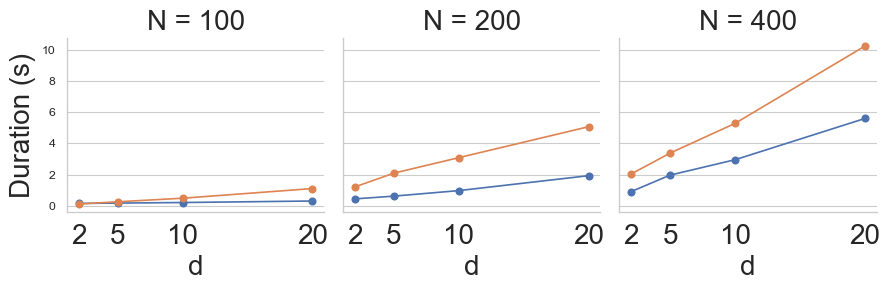

In [34]:
from plot_bench import *
forest_df = make_forest_df(df)
grid = plot_forest_df(forest_df)
plt.savefig("./plots/runtime_wasserstein.pdf")

## MSE CART vs Medoid

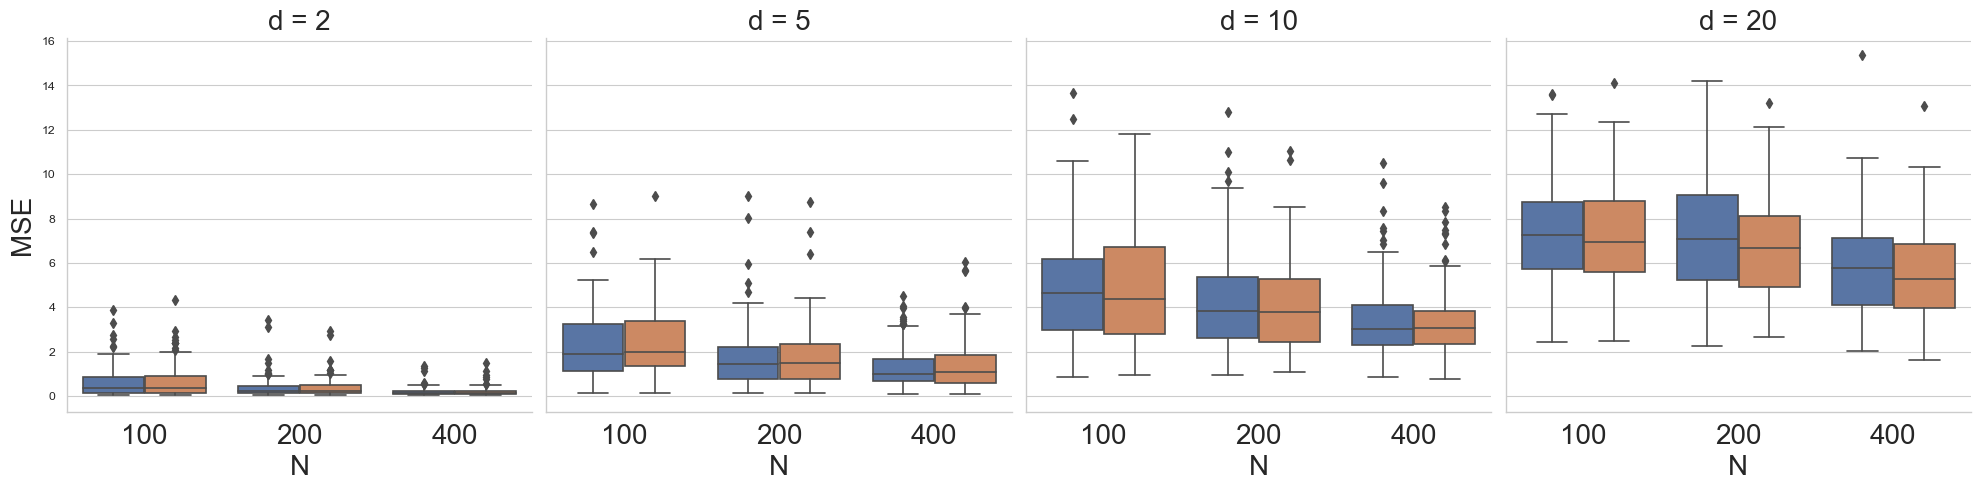

In [33]:
from plot_bench import *
plot_errors(df[df.N > 50])
plt.savefig("./plots/error_wasserstein.pdf")